<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/BI0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha':0.25, 's':80, 'linewidths':0}

In [2]:
#!wget https://raw.githubusercontent.com/scikit-learn-contrib/hdbscan/master/notebooks/clusterable_data.npy

In [3]:
#import base64
#
#clusterable_data_path = 'clusterable_data.npy'
#with open(clusterable_data_path, "rb") as binary_file:
#    binary_file_data = binary_file.read()
#    base64_encoded_data = base64.b64encode(binary_file_data)
#    base64_message = base64_encoded_data.decode('utf-8')
#
#    encodedMdl_bytes = base64_message
#    print(encodedMdl_bytes)

In [4]:
import base64

encodedMdl=r'k05VTVBZAQBGAHsnZGVzY3InOiAnPGY4JywgJ2ZvcnRyYW5fb3JkZXInOiBGYWxzZSwgJ3NoYXBlJzogKDIzMDksIDIpLCB9ICAgICAgIAq8PYS96hy/vylDFDUeSM2/RCyVyahHzL8vzN1mIynQv6j/T8OcHcA/wsXoqi170b/j4nFiiw/Fv6kQRBN+csy/lFdr+zwlx7/bYQ+qfQTLvzSkvE4TWaC/bUSnkF9w0L+4PfeRzfqavyDZ0MNhQtG/LrDlztpFs7+hPF8KoMHOv8ZXYN2tAMK/52mCROtnyL9MVyEWnJytv+FNyU89yM2/KPAU1Xurmb9BWxkgqafRv7mr/8R3Sru/g5+PIljay78A8JwZ/naIP3B+wdZ+tdG//O8lkaH2r7+DKjopt3fQv3yYhXAuHLC/Ex2fou1YzL/j4HVNFYTHv3Bf2rRBadC//mDXt8R+s79LUFEDt43Pv4hCnfq5f6A/4OQagh0u0r9PMB/BfNa6v7iChZ3eSM2/RC95xMlPyL+Fi//bDAnQv7q+ZvXPorS/4hS9Bgk8z78YM8s0EQbTvxoGVrZP6NK/FAsMvEw6qr/VgTrGzLnPv0Bn1mAyXGK/FiQ9Z4QT0b+QO2UknXyvPwN9cWSarNK/lLErCul5yr+MBEs/nAPQvz5PtTQbX7O/Cm0PtR3dy78I/xfccHG5P6y5FjgZVtK/4K68CvZ+mL93aso3F2XQv1i7oDpCXp+/87cb248Oz78UfyJiJ0e3v8LsvRuIyMy/AEt+cA5YXj+ndX5LFnDSv4WV8WqUl8C/6vt6pJqOyr9w5d0cuZGlv13eLBANtM2/Do5r48qbub+6KHXP62fNv6YHBYLKY7O/C0vfFSCOzb8WBLTOgo7Gv/7xGRL1As2/fhqRh8vyyr8oxRmuLKvPv6DP5AVH/7C/QV3XGsLSzb/MzqlGI+Glv+PIDPQSkM6/pPMniR1stL/1IU7ZfZ/Jv++cqMTOxMe/URWfTAJVzL8K+x6bmEnPv5CikCzUMNC//pFHrwwqsb8oqrk4m4fMvy4HvtKMYci/KMv/UG1czb+gIlDq8hC9v7vEdzmjM8u/AJkAaPtmhz+2Q2alaJbSv8TZQu6x39G/u1z7ou/C0b8EKuOZbPHCv3O8o4C4MM6/bPlhx4JIvb8yxcfFdTDMv/aDSoRaZ8m/y8lEO69Tz7/idIHy6bu3v3d/y85Bycy/ktjNbyotwr++TWP0sMbJvyQCiODoNsu/gWbqnK2Nzb+gUm/B7ul9v5i9I1uthNG/ELZjZvUGr7/mRMQzJi3Ov8zoAUEDz6K/iOOm3thW0b/s8pSo9PLIv4nOm/8kO9C/wHHAq4D5qr+LQJWhjM7Qv37QqXp6RsK/248PUtimyr+8/lqwoPywvyaGUmt1es6/+u5WR18jwr8J2b75UdjKv5aV6lDlG8y/r5C0c4wY0b+f57VoezvAv20PpN6m8su/VHb+81H8wb9vhxpKmSvLvwCytPwKcq6/byHTLscQ0L/OA0r52KnCv+ZWBI25GM2/9PpuCI+Xyb+l0br8P+PPv2rGM1i/YLG/1sV68Dc6zr/MX3eXftKyv1iGvTiqP82/Ff0dVh2Zwr/2o61wVi7Iv2ASqLEaVZ4/EeSjDEWN0b9k7500DtvMvzQu4q5vdM+/YK/vP5uJpD95IgQuyZfRv/OduyJ2Xs6/BxhtdL1l0L9Lt2t79wfIv5o9orWR78q/sNXOx69rlT8L4iazFUbTv+Dl5uRzO6W/nBXCXcFez7+qqgpdgf7DvyI2VxLujsq/qAqFxAN3nL8P5r50Dq3NvzgZ3qxNi8S/VaWz9hLSy79/RnJfAznAv+CiBVzFdcq/hG2C02yDp7+LFbYIghfOv/DaSq+ISYY/hVNvPfNW0b++zG6H65ixvwbqc1iG5NC/BSmyiVZzyL9tV8onVsTMvyYogMbLPMS/IDgj70xIzL8DEx5M3IbIvwHoF6LFD9G/qma1rf7IxL8eYOQVPyrNv/zSfxevm66/I9gbpbPJzr/UgQjXEee3vzAdTemg2My/nL1gai1yrL/Esnw0qHXQv+hONP0KoKW/An5dhVHd0b8ka9Tuvkejv5apyD7J3dG/o75pdMw2ub/kL3k4997Kv/S0rbfB7rq/fTrgM93Gzb9sN5SNnxbCvwZRkwrT3ce/3K/7PWzVqr/UptzVPOjNv+BUJT3MEpW/gErUxzuY0b/ggn73lyOhvzlzMVRSZdG/C6lBBlkYzr/yFfUxD3vQvwAThZ6u/au/NcHTSIloz7+QX1oH8GCIPzwykVG1x9K/qs5dVDRlwr/BUKOasyXJv4tZ8T8HxMq/IUQVD5+Q0L8gE62UumTEv//UOs96lM2/aC2wCbWdoL9+9wf/P4/Qv+9K1aPzw8a/cYoh7PZlyL9kcyDCJL2yv0HHO24S8My/4LPeyKBrrb8i9v3V7a/Pv56N37gcBbK/UO9icaz2zL9K5Fc+ElHIvzwmEkrdgdC/eodzzKZ6wL8iLc3NuD3KvxFi17CXsr+/FS5oCDr6y7//PWYrH0HJvzA9OkIs3sq/HhJk80SZwL+Qm5LdAu3Kv+j2NHzRU6G/5L3x5v1U0L9Fxgu5JsrQv1haOrxfp9G/lzQJawm9yr+eIDSPKqTRv7/dRCwJpcW/oxEY54uTy7+gHEu6YKWaP7rXUup4WdO/RszjNxYWyr9DeIE0GhfLv8CP07dZ5mM/A1UOOVCJ0r/YsJ7J+Mm6P5GpcGQA0tG/cQ8MgJFVub/CIbEXKwHLv3J3kF/XMtG/BSFNJIZC0b9UsHIBgPjUv+djlGgFaNW/IOQLBLQew78FP7azliXKv84MaxHePMu/YZatPWLTz79wJufiqp6ZP2cXE88ZVtO/AAnkhnmZkb95xhZgZNfRvwjMTgznZZK/k5Gs+3xj0L/gG1CcoFt3vyEBnUIMqtK/4Mw6TmVZvb8qa0werlrJv0Ae9bhgBbG/buQGRGdrzb9wZ6ElsQyuv9SxMq0Qm86/fgfZNSd6wL8pnTWT0wnHvxVeGpb8sr+/D3hHoWaCyr/shZluH2urv7G1BcjaHtC/KIUx7THltb/ph6yp9r/Kv5CK3inFK7y/7hb13Vk1zr9y2HEeTRCyvxK64yyYOM2/BKyDkGTCsL/fkMby6HLPv2DPQ+D3kYs/MagNRPqt0L9xqt0r2Em/v/bzDvdujsy/oEyLmnTVzb/Gqc7XoEzQv+xzD1WpSc+/7XYP3Z3Y0L/E+9xNi2e1v04uxehcAcu/+DPyfzszu79ZDFXACyzMv5EEl9J7sMa//zt1l+Xryr8kiTykFBS6v+g8dwxHKs6/1BVI3YQBsr8DJyw4JTDQv4YwXMtHJNO/RKdFXvY+1L9g7mZvgqKwP/R4ln1vsdO/GswNgUXGxL+6CXy7tKPLvzpHK8QX+9K/QXwUTwyk0b8qzVzRSDrTv2nq5ogmVNS/Wfyo8C/Wub88pYaVp2DHv9oTA/dwObW/++H3STJDzL8yLAunWTnDv/L55XFM48q/N3+OtnuDzr/LVK4Gn9HRv/CMPjtD1ZW/n7LpTkIy0r/YXE0lFgOYP85J+LSlodG/GCmBmVoCor8OXPFwO7rPv/rpKtIYz9C/PG8+D0fr0b8wCVJqwgnDv5Vt6rkxEM2/dPh+N1c7qr9XIzoTiWHLv+g1DLZWXaa/mNDFkEOW0L8VukB0ksXDv2JDyqqpl82/bI/D/0abqr9uInCnwp/Ov5CLIeENSZG/KG2GC2z+0L/kdaPB7o+qv7ydbLkIU86/n/YJQO8N0r8uMbPp7ovRvySpLVflOL+/EOFbRRDhzL/yt1mSCenAv8g81T4ehsu/lBvJhlvctb+Rh0tjRnzNvzDXVdupQp8/TMxt2nIp0r9YcEgapO+rP43n/sEIRNO/8oOcZLVAur8x/m+elYXOv4LDShVqoL6/xtKvrrctyL8qXtM4Eiuyv6bG9sMVps2/TPMrjJP0zb8+ySxTttjRv2aAkhZN78G/87TrSMTPx797o00yk2a6v1Dly6s/N82/WUwUhCIGwL9Vgu5j8tTJv6C5L0vF8qk/O26U5qTq0r+1Gg8y6JLDv0bzgtPvbcu/svAGP4DPwr9sh5VB9TzLv/CqfaZ9w6Q/Hnn7i06h1L/XSWq4r3rOv4fusbyGOdC/srG9timVw7+dCgIBW6nNv9YiB1RQ6MK/kEFzKXQUy7/w7maVQX+2vwZ9BlPfMcy/TqGvBmuwub/aqZLgE0TOv13B3WHnn8S/dH4WkzKFzb/KbCP2swbJv1KZS7e/IMm/AIZtYhVjcD+LI66gZV3Rv+glL6Rg9LC/hj2jj6gwzr80xvb3evizv1nqGmOtAM2/y1LuwrctwL+Fp6H/IW3JvzTZkBR1dsS/QcfYjm7FzL/4h+oQsSSav+wp9C7dwdC/y0OlMrF5xr9OxmKJ+1zNv6wBed5Vosm/jFyQybfWzL8Abefb/pJgvx+fqU2zJ9O/wOeC6xLDh78aDuDJvcPRv5iDYfvNnrC/5K9iLYMbzr+Q27Mx5FSDv+W4nYaNfNO/Pn+ksUxtyb9lpWaLts3Qv0SQggzrC6m/YZ3Wofuvzr8IBNqby0aXv5xoI3m5ls+/uFk4S+ODob8qD68NlY3Rv+Wj9T3Jxsi/U8sUWQINzr9w2DpWYFe8v4jEM5/VaMq/R7PmqBRmyb+3ks+KfRvNv5yZr7AA1cW/6u4OJCsWzb9wmhSNr1zOv+WL0Mc6FtC/DFbQzC5PrL8GayGOQrTPv9zYAIJTJMa/Yrg6+962zb9u02Fo4uTEvxlnKTSc1dC/eN2jWhvD0b+/NDtDcNfRv3ZdQ8GRBsW/CguO9Gtazb+ISRSi99y7P88g3gaYdtC/bgATRnmeu7+t2dy3Tq3Qv1BVJAk2wKe/iJMcXuPwzr+nS3QLuVC6v0Y2/2Y7Ksy/QD4C51vqjb+R3HqjH7rPv3zFe3RlkMW/yuZZ3wmLzL8iSIv7ooXLv0VsXKCw3s+/nNFwWrWbs78Ziame1S3NvwC1IobUvU2/C/yh0GgY0b/+hbnP10vBv17yhomQD8+/UB8ppRnSwL8zxAafnoTNv4lAfJ5base/EqcCuT6czL9kjQG7WYGzvw70tF9MKc6/QSZ+jlSVwL8Fr9zxUIDLv2XvldrpDci/guG4xZPLzr+Xfp+ZLSfGv5Je3PKWNMy/zxQ5CaeRvL9tBHTDnSHOv0JnbBo7aNS/Y8jamOl50r9ssD7LqNO2v9Hyfx1Ipsq/L7MfjRo60r+zVXuqAx7UvzTJ8j3blcm/WkBsNPR5zL/g4yQajWWoP7zd9nzE99O/OAAC3PL+rT+Ubc0LbcnRv80tL9yxncq/XbiADRvH0L+oakRlOU/Cv7pqQ4jd7si/8pUMc+UUx7/kXWW3AGrKv3LLqJsFM7C/TLIbnicyz782zZkDjTnHvzOEie61Xs2/gJUn4Q3Whb9Q4gKUU7zRv4DPcag+/F+/QuWstpBy0r8ALPZcHfYzP2uHgftAoc+/4MSzFQKLfb8Y15wGDo3Rv3AMaW5yAqW/GAF90rux0L8wdXz2DhqTv0XZe6vEMNG/AHAH2HYSGT+zNbf0ZRTSvwBGc4oWik4/yljUreWm07+AYcevSi1zv3BBnnp+5NC/4IMh7akKfj+VIV3gZvbRvwAM7+jDCmK/moLYjXTm0L+gfAvLLKR3v2c6fCpJONC/oJfhxcIJer+6AncA5X3RvzhRO+RO+5O/18PX0Cdx0b/4QC4RNJOfv+p97jd8lcu/mElo9aR3mb8exmpobjbRv1BeUapxzYO/lhgBGxYq0b+g0acI/1V4P2X8r/ioNNG/gOh0Qcbpab8xyrQej8nRv6Bfungy1IO/xM+XS4rT0r8Adb+fOr+Gv8ZRYTfZvNG/gF77VHQ8aD9NY7r99fvSv6gdUZmhfpW//NB7/UbI0b94r7rcq5ecv7Ydy4/1ldG/AM2B4qxXgj98qXK5vDHRv4Aazecg9Wy/g6L8TMTA0b9A2krvGzlpP5AvYw7RutC/AE+L1w7xYz8IjJlJ2qrSv3AlXxYE0oe/NsD6cSyn0r+AfuJGLtGTv4RROqsJudG/QNY5xCr0jb+F9lSB6yvNvwCrjqQc346/dETGKhi00L9ISQy4vcSSv264MgwAKdG/EIKZd0XPg7/S6ntNTkLSv/AhmlV/u4a/k/LWeUyP0L+41qJ2rUGQv6TFQMeAG9K/IF55utlTdL826LKi6ZnQv9AWe5I884U/0bKPKdNL0r/gMZqagJCMv5KGUIHeANK/QM621OAZZ79N9tw9tuPTv8A1x9q7AY2/FJ4M/98h0b8Q5XcRRASWv//3JoI0ptC/gMx95vGreL87udDyYTXSvzDY2topZoG/hyOJZLfk0L+I7o8K1UiSP2AwU3sEBdS/9MK9hbXmoL/hUcUgsr/Nv2hslXCQi5C/birc8Frr0r9A1eXvmqKbv4aIYK1NrdC/UPcok7W+gr873StZkwTRv+C59maYunm/lUq3DgA10b98phdZwsSyP6t//dgVh9G/HClZ6D+Ytj+JW7oPWuzRvxBjIkZHD6w/1L//Bi+X0r+YURnT53eiPza4Qu3Wi9O/+HmSKG/Qvj/LZY6zFvvQv0BoOSufcKc/YDa4wDnf0b/M5DTdt2iyP+WMO0PMd9G/yCBXPrQFqz+ogHjF3LfRv+CEqVD0Urk/t3YwYoc00L+I460hL6+7PzY4fsPhCtG/pDYMaRrRtz/rym/WuNPPv8SKiCSo0bA/tLmBiLYi079Qib2FMDbDPxCkNHCp882/MFhPtimzuT/4aYKUc8jSv3jJvJTJXbI/hMdDXOo80r92z7frGkfBP0e68pa3OM6/bHb4Z+ciwD9UhsnRTETRv0C/M0fJcKg/mFQJqyuJ0b8AwTgPNPawPyMyOISBytK/eB5O2A5IuD9u+guyy1DSvzAHgz6wNag/0GhcRYgr0b+0OpX6gt2wP0aWTin1JNO/yCdCiloCtz9Fn8mSzCHSv/TXSNdKirA/uW+1ElDn0L/oL5O2lOamP1tn+8W8LNK/BKWxbdQuuj+ql6EAVjLSv2ChBW1Em6Y/+KUwq1XJ0r/oUmXt0Xe5P+DK32gs9NG/uJtb8K/KpT/Y5wrw+rnRvyCYRpQqTLY/c4eLJQXl0b8g1APd9nK6P6BlGgw2s9G/ELzvzNETwD/9KSQtikTRvzTVXRwjisA/bAkpcsdl0L/6pNjiWyjEPyuIAZZByMy/kFaYPqK1rz8rdjAxYO/Rv5D6ZKekULc/cnqr6xPy0r9YrsZPIpKwPzSYuav4WtK/ANeLbyyFsz+k2NI1BHLRvzDXmSMNJbE/AUIayQa90b8uTjSLj0/AP77MUTS/gNC/1Gr1p7fGuD9km86ZvyPQv+xsnz4i2r0/vEIDonYh0r+EhegeltuwP1/jXcJMjdG/5HxK1pa7tT+qjw4olvzQv2a7/cV1ZMM/jgJVQrWi0L80n7jOS6m2P434gTFh5tC/uFshzweMrD+fDeIDot7Rv6jsuwqDtbQ/LadoH4og0r+E+dHpH1y7P0hs2TxO69C/ylrEpckdwD86S7dMWavOv1CJYhOSrbs/sUE/l9RK0r/gQq5Jf0+tP1W/pCu6wtG/UGn8UF1guz/PLrShGLfPv0QnTGU0L7w/npaKhp+4z7+YyFfbhOy0P1t30uCP6tK/sFiRjkmNtT+Cukd2f8TSv3Tn13hUurk//LTfyXRoz7+MtC+kxZ21P0F/mLbbsdG/mHMmH3HDqz/RhEgdj+LTvyw4KxV987c/UKhbaYGr0L/IegOfRmKxP0q8f2qZnNG/fjNFP81Awz8CUBonSKjPv1zk/UlGmrk/VUE8UJOS0b+kOb5A5FHAPyEVNzy++c6/5A0k5U2Guj9maAvkQnfQv9Ae0T5XN6Y/UnFWVZBt0r/ISY3ku8y5P+iWskEyDdC/OKZZjeUKrD8Kokt4JL3Qv9BMU982ca4/T80WU1tm0798NkyojpO5P8Ud2uJtZdG/bKw4OmX9uj+Jw+XZbNHRvwzzxVqb37A/nY1/Q0eN0r8AFc9bPrvAPwTPknUtC8+/AG5kz/sZrD8eKZAO8GDSvwgSBQjiJL4/gtofqjSy0b/EHVFfY4G7P1PwiUQ1D9C/fHdmjXoqvT8lOCuGJ9bSvwCeidKUdrM/LIw5Lu8l07/UMl1WRsq4P7eGMxx2ZdG/KBnGV9+usz+q0vhiMrLTv8CLbwAEV6g/DOrCuqTS0r8MRjfQnnjCPz0jsAZV686/Ora/XG2Mwj+QMJpjU2fPv2QF4CSrFrs/+QYV27Mn0b/MT8OsvaLAP7UXtSfYtc2/cPNp70+Lvj9lFZIXWvzQvxw7mZdsFrk/sDi6vgrJz79kfk6K77W0PyVzhP8J1dC/ONY2Y0h/rj8NDM9b90HSv8yoDrx6n7g/9sXAFOCS0b/gH2QSNqm1P6syh/y2W9G/TK2kPn+psT9ucNuVaS3Sv1T0+1xmN7E/P6Wa0h2M0r9wmVXa/5msPwaAKwV4KNG/AMvtbyXGtj/DLK9rgxnTvzAwagWCx7k/6NyKak/B0r+odvqk09SvP9MYnYftmNG/WEaZJt7nwj/H0SaWwKDQvxhA6hn4A7c/vHvAyJdC0L/UAMYeCI63P01z/F5fm9G/TDEmGqMTzj+Eh3oaArq1PyogTs5MfMw/gOTeF9NGvD9cr1KiJ4DNP9j+reUbfag/Jt2qRaSlzT8g60IhSWSgP5B4GLWSzMw/eOhyc6ukxj+g/86EoL7NP9BY09k5lcA/WrVHBTcRzT/AzX5qI2Z7v34AR0nruM0/1KL9xebEsL9EPH3XKpjMP0TWRB1xRLY/gnHIhgjNyz/w0eMA9eWYv4KTGkK04s0/GKNNZRCTwD/uH4jN/vvLPzgULSlq6rO/HvXO9bSzzT8oNmOBzbOoP9qwQBKlZc4/QHp1GV73pz+SC9WaZw3NP5CwBmM8oZw/aL5Gf+LAzj/c4McnoTXBP/BuVnPvWs4/lkXm2ymfxT8eBTFXhM7MP9Df7Lhm44y/AsEKs8AczT9Y/e9XhaaZvwCXgrZZAc0/hOgWklLWuj+iujCWKQDPP04yPso3wNA/Sva11ZAdzj+2mZr7fPnFvxLN0Vmcf80/WCuiud4xuT9AdycoOt/NP4AXxHWDn78/TipuBzBzzD9YK5039duav4KHjiufXNA/sNnYtMmuyD/Or0/QuY3OP5RN4/gDrre/oi+X2M8vzD8oaMfQfK+uP6hrENI+b84/Qs+4b9W0xz80qva26mjNP+73fPYDPsw/2m7BKTwMzj84bU5BlHmuP7Ah7LIgn80/YO6Z+HrSwj8+G1StBjPOP+pVRuI9i9I/8gxBDOpGzD+ICJNTWlrNP/xsN+ed8cs/gO9KjtDvcz/inc6QooPPPyInU9J9Msc/ICaTeJJuzj+AmqTjb0Zmv3p13hF988w/QFomHa19rj9mffIIWuXNP4D9llPvvok/IovRbKY2zD8A8c92ZvFivwxL1oY+Bs8/bOvpxgf7xz9sZ+T+zS3OP+5s8bgzF8A/uuB4+L7jzj9QVrDCu4qcP1p2LDmB/s4/iAWEafoWsT8mSZeA7jTMP5IuLLb6Q9U/xCiCfsKYzT9wpPDeNPizP1zQoa4C4s0/mIP9puukmL8aVohRC97PP/63MLc0VcM/JPgOybekzD848ISbtEKzPzge8uASS88/gIk/BubktD82pRizAsHOPxol9cT/lsQ/KjwnNxTYzj9SCL+0cYrQv1KQfxaFfcw/ti9j/TFi0D/ObSCxNqLMP8CCfPWBCrg/Clwz09D4zT8w8TP3CqaUP0BKaQaG28w/0JNqZQ1zk78sxGALkI/OP5gcAI/R/sU//popmm3iyz8GFCyl26/Gv2KvRMioW8s/+JfKQ10ikr9knyyZ2QnOPxwc4d9DhLY/iGysv+PezT9CjnywKe7LP6Q2dyBV0M4/cOyXEp1ctT8AebkCzAjOP+SIs1+fg84/7hisep+Vzj9sR8syCQTGP5b7Msz/hMw/2kXaj+/8ub+OHq3rtWjOP4ys71Lk4NM/Wvful+lGzD8L8jGlsm/Iv0ijk3ZFhM8/zPzVukD/wz8gHKq9arnNPxwcryF4u8Q/1j8A2bjrzj+QutB86U6RP6rcAuCJjsw/xskTcXSqxD/8OUY7JOTPPzScRY+Vgc8/MtTGde5hzT/ibUwKp2bDP/qxLVQnMM4/OMwEUT7owz+qs7s2ILHOP2rn3jAy8sM/yv8P3c0ozj/oayARtYmtP+jMydMCrsw/vKcBFWCutz8eZXf3ikvOP4AaKO3GW2U/NvvkA1QJzz+0XDZPF7/GP1LIWIy2780/wMNM/RSgtD9YNHQ+1FzMP3bmVhKgNdI/7vi7q7JHzT/AowVLJZ6jP1Dl+9M/dc8/AFEd8AdGa7+yjDKTq8jMPyAbJ82mb8I/1pOOJSKWzT+GKyZy9b/BP3DIdWkbUc4/QPIO2apCw78O8qZ3GA7NP0hXd0rFwrY/GmBvGB/bzT/IHkL6GAeTv/SaNu6v0s0/VHA7axZju7/IBcNisJ3NPwhXkUuEG7E/nsbJkzipzT9wIazmq3ClPw6GDEph1s8/vP0ORVfrwj921r8kVaPNPzAK3kaumZ8/sKC0OE60zD9AqlkN6QOwPwbc9BW7Mc4/aMNMBrtGwj8G6DdHKtvNPzRHycHDsb8/+gYHYZo0zD9ARPd6RbfLP/aWvCgtc80/UB9GYTUbzj+6eqVibW3NPxRuVfqFa62/Dh43VeY3zD8UIqzeWze4P+pYR7CVR80/igvLVfBoyj+gw6nW5XHNP3jsj4PL+7M/KpBnCJu1zD9KLJH1ArPKP05Ee6vJgcw/EECOx9Udg7+6rZp66dbOP6AHdcWdCqG/XAqpYYfXzD+I04/nKvG4PzxUCJ00YM0/ZE2p4ycRtj+8vUY9GfDMP4Ty0FM7wbM/2PGpQjsyzz9wYkUYrM+lPzEVUu9+LdA/gKDM4lirg78CnVQ7PnLNP/yhUgUFScY/spQ9X2drzj+APGGd5P9vPyofkVvwaM4/wACNyxUuar++QOrp0sTMP7Tb1QKGQsM/Qk5VgKqtzj+OuvN03p+9v2oaByuNzs4/tocyPuYezD+ioqZPK93NP+hAolXEgMA/njYPnW3EzT8Qs45zLc6Nv4TneuIOkc4/EGGmaQh7kD/OKs8kLv3OPySAIJPfHa6/urE7ymgbzT+SqbT8aenBv+ivTqgJjc4/4IHOrL0z1T9Susv0WpLMP4iR1g0cbcE/fsa+RILrzj/aIa3EB/LNP0ScBfEzWM4/UKHL+1BAxr+M5XL5/0HMP/CAY6e70YW/ugsmprLGzD/YAIMAmN+uP05ITaiDTc0/8iMi+QE4yT/SHyEO4x7OP5zT+AXQ074/unqH6fS7zT8IUBILMyiXv0LZf04nCM4/LFrmeiIEsT8W+lcfO2XNP2CYPOPJjb8/bornzKCBzT9yYwIeCqzBP7opHTtuIM8/WvYTBwim0D8wpwJ+JQTOP/L5KxEwKsk/OCvkwTlQzz+sGPCr3ri0P36qx2AZXM0/QByzsQkakD/MEMKlbRXNP6juvXf4hLw/1qWmBmEmzz961btwPNDEPwQVldDT2c4/GN/QfGAJuj9kh8KfxPTNPwRYNs1P98A/zhxvjPk8zz9oT6p/Avq6P+BbQyysfs4/kEbuUbmitD9kK8JYm9rNP+xsO18ktbg/PE7UARPDzT8kDB1jY3O+PwrR+4MpU84/XHJIdLvgvD/41Muf3rDOPw79hRklUby/tBlCFET+zD/4KTRanSjOPzasEH03ns0/PqQF9MZ7zz/WTTN2giHOP6h8qJRwXqU/GrQbxVE9zT/A6QcB03G8P7aSYQfjUM4/TCbh3RlHsz80s++izirNPyjMT28hLb8/kEDlIbgAzz/QKMMywtqyP26JejY//s0/vDgB1G1Swz9imrLizV7OP+SbecnCiL4/HI/Uzsmrzj8okVJln1mgP/h8wYl9CM4/TgicHtmMxT94nLUfhiLOPxT6b/yDJMc/khrMgtnEzj+kSR++DGq2P8B0bpHdqs0/4Ls+HAxspz80C2rlXT7OP0xZqMtSG9Q/6P/Kb/JWzD+UqFhhJmmyP94hOgPKvcw/BDsskv7Tpr+G8nKcVcnNP0huDs/e6r8/DHCL7QxwzT/QGj5crWiwPx6i6MblRMw/KPVvHSgdrD+wjblbAhTNPwBRO1/K32u/hHdmX6YRzj+YHyTNyj22P+SD/y7IyM4/cNOHvDx/kD9IIjm5U53MP0DFgzB7B60/Vtl77Fz6zj8ip2yjqurCP5TvwYm1Usw/gE/uyCXowT808PVrE3HPP/wE2CZworI/mmUMk1Tczj8y8L4TRvzNP54EuFuR4s4/wEYWI+8eoD8gExbk1k7OP8y1rl/3WbM/wC8o8Lv6zT/uQn7iu2HEP0nA5QzbCNA/ZnMhJugGxj8wkjdSaNHNP9SepsHAYcQ/PPrVMSsQzj9KiWPsu6nIP4CvWGU6/80/zE1jF6DHsT/UAuLB873OPwxn0hvdOL4/cP3YPKPgzT8MTsUHDxu2Pyt366NZM9A/wDQwSwmCtz8+OhTmROTNP6rKI9HF37K/IGhbeI/ozT88A8vAojuzP3hPpbkjis0/qCbAyhbHpD+k1qu4hE/OPzY0HjMEOdA/dvRej2HuzD+Arnpkh5arP9qefULRXs0/kjAgwwqlwT/UpWKEdCjNPwCuEvRpt44/HL/ICuW1zT8MCWK9FY7TPxpO9SWRZM8/WCsdw9KUqj8EK++mqnPNP+4n/CtgONA/1TYbsC6A0D9UHvbNTJjJP3xvgugy188/AJ9URsUcqb8ciQcBR4LNPwAgerjhIR8/wM3Rfv7NzD8oW9It+nmkP6xdw81lPs8/Aq1n1YR7xz9mv98kfbrXP/zXl92Uq8g/jHW37L8CzT9q9Dz0gBLIv6CC4NKf3dw/5E/MKp7X1D8QIopbvx3aP4bki3Xbe84/vqTNOoLu2D/s2/MHrPjPP+IrNkLBot8/PLHz4x+61z/mqWINwnjWP3gfhg2hV8k/RqUolIIn3T+EivbWr5fSP1zITltq1dg/GNxYG2D9yj+EX17ycAPWP5BIT6sMGcM/jIP++4oj3D9ioEHQrDPRP5QnwnJzNuA/REYSzWKD1z+2cUI7BzncPwKKSjP87tM/gOnHhSou3D/uhwpSs+3SP9qQh/ORoNs/dDeSZJA30z9I7DTuNJbZP/iq/GQ3Qc8/9NNWQaxg2T/6oT5vwJbQP1A0wxIR7dQ/rBcO7dvivD9S2C2Q4j3aP2xBFDmfl84/wvov0kc70D/y+83MmLG1v/YbBzXxwd4/Dmkz+18P2D+c9tV1UoPeP96dOifZ7NY/sl662AHg1z94iRK2/OrDP7RxFrSe1Nk/TtY0YHdtzD/8losJlTjTP8ClWW2oPLA/JPM43Shp2j9AgKu8AzHQPyTaiwq0gtg/uEcRRSBizD/8SiTYqMfaP9i+6+IxxdI/UC2njdXp1z8KR1pIipfJP0wkd9qoiNk/CM0By0HDzT+cVE4M2QjaP6jIU/ASRtE/5LePMSD+2D+0vKAOFr3JP6h1PuEY0Ns/EORxOy3Z0T/UJoSKQkHYP6gCjZqDxsk/OuOBvhUc3T9KzIApqZXTP+wIHtlmm9o/bnCexoGl0T9MOUCUZ43SP9gpBK8zW6s/qskcOgUf2T8oUV9N+5vQPySqZ515X9w/4rq6Hs4B0T8OgIVSkyHeP5J3QXchStQ/RG8AkZKG2z9sdw5yNwXSP3p1hNJy49c/oDqM0xCT0D+grhnMt2/XP7bz9mCDlMs/wsGjAdGA1D/q7H6N6E7FPzo1akH049Y/OjZpvp6Uxz9yESFZR4TZP1hWFWAkwM8/MAO6HQnb2z+MOy3510TQP4hR/ulTTtk/2FRP2HBIzj9OJ0AucJTWPyKFsSmEhME/BJFaRTPQ1j9K5vMIWRzFPzqHDB6zEtg/4IhteYT1yz8UFtQjT4PVP16FEDAR0MM/jKkx2jcR0j/AMI/QuciNP8C7DzT0Ctc/JIYA+KcDyj/MORdYITLWPya/mcX83sM/OtXL3HkZ2D/aqVMULdTIP0IWpnIEddo/4DV1cS1V0D86ln9gOxXXPxCfzJoONMc/eKkyYt9c2z/cCjv26qrTPwixJqrBntc/9J8tFflfxT9MXvDWm3naPzQPlM1tZ9A/1ljdF1H22T8GGQgq3lvQP2auT+CTQNs/qjUUCPrf0j8a5oJwQPfYPwACxN3iBss/cEhEWFUZ0j8w9H0lN0+hP/p+kHT+89s/zq8HUOn80j8A6RZ88pvVP8iXdXYMU74/jMdQSjSZ1D8SbmVAH5jBP6qAp+9O990/EhI7oUtl1T9SZkWB6JXWP+ptxcLWccc/4m4fjFfq2z9kZn35qufSP+5y1it6r9c/hh7cfxXSyT+WPxfGbaDSP1B/58zPaKk/OAydiJ2U2z+QdpJKoIfQP3AWNdyeu9g/eP+K/NdHzT8MsziwXLTZPyJCO4t0sdA/kjvUh8aN2T8CWYUB1iDRP0IYR/8tkts/VsA3O07H0z+G6fL4++DaP7oCDVjEANI/WuSEhWvQ2D/Yh+RJo9TMP3ZgZM/Ezdk/MA+VupJ70D8gxd+C01zYP1hEfqEuEs0/gDO08aeX1j/wIwadlSbGPwbqAnb3vdQ/jC2HMX/2uz+uXOEO0j3RPzi6mDpkgZC/ppb8xMYL1j9yRFBdCqTDP+aGTbhgPdg/UtrmMDy3yz943/ngFVDXP0LrJfI6B8U/2iIDmCI1zz+JF3TGz5nCv366adbOVd4/Ym96ZEmQ1T+YlyUlbP/WP7wPg/96mco/UKpYhUWB3T8qghnLj1rWP4zyD5K41Nw/PDrfhF831T9yV0Niaj3TPwDg6f8tIao/tBEgV9CY2T9+1R48HoTQP8x4FYNnYN0/DPQDEFHU1D9sSt5BpQ3WP5iJKCf9p8E/JltEeNXq1z+qnIq31j/JP77mIgxnuNo/sF0+Tdm9zz9QNpwWwCzdP6wq9xJCHtY/DjREWjGQ2j9WMn5c72LQPxSSFGOj3tU/VLlLKPQEwT+oRstzLbDSP9gUjFA9aK8/hDZLQlYG3D9KCBZNisTRP7jGMPytz9w/3gdOPGfS1T+StWt/kk3UPz62h3cCk8A/jD8PCFFu1j9uclLr2/LIP7idvd/DAdk/0sIOhJ6NyT+6bjWCeDHTPxAyEo1YerQ/qOVnTm530z9EJ5+iI4G0Py7JW7QgRdc/OoKNFJ4mxz/qXaYEjUvWP4Ti2KPo08U/jI67GqBM2T8Cq/x+ROHOP9zdQrWezds/tm/iZa3v0j8e5YeSoVjTPxTsz/Ngebg/8Ey9zOPW1T90NR6v6ijEP35rfg6Ch9M/EAnD1DgHwD/Q+GOLXYbZP8yPEIEkhtA/0JTiIeBm1z8y8qZ+BWrJP2ZBiTBosdY/dCTkT/4Vxj9aul6Z0UrdP+LJix+1bNY/FKpGCl4e1D/q8LqxhHjAPwwvJUh3/dU/FGTgn9XcxD+qWP+OcyLSP4AMGtPfO2G/jN4B8DJs2D/6tj/WnD/LP9zkpO9MVts/IBv+drn5zj9q6OK49EXZP4h4NUayk8w/esvYITjD2D/cNaYfdhDRP4KyE3Qzbtk/ak4kdat90D8E919AyjDWP4inGowV/8I/pGEjWhZv1T/GsxRuNOHAP7pGgT9wTN0/Dka6YfvH1T8bq3+dpAbgP+ob4xM3J9U/OtmmI7FD1D8IKmsC1te7P/4enxWpqdo/6vEELpoN0T/s36zhb8/VP6IVMZDC2sE/PoKwaQo03D+gjAPXZcfRP/IldZ8gods/JvaTWvP/0T/YTcoTOtTbP3S0zMClNdQ/zjqW9Pze0z8YM78Yxd60P2gqZ7Jn8Nw/xmQYtJYL0j8kaT7cJKXVPz4cZVdbQME/glnjvogx2j+kLxRUp/bPPwrCCaAvF9s/imCwc4qp0z+Gel+mWJHcP4Q4eZLGw9M/2PRuXusT0z+4XXRHKg6oP+Jr4qD6P90/porv0ABr1T8Al/rMBCbZPzI0xK7w6Mw/wjdbE+TP0j/gdSfTHS6yP8YgGEGHVdc/4D1ZVEiiyD9M1ds59ibePzC12WRfQNY/JqhuC8rM2T/gPiVWbznQP5z15rBYrdc/wLuiXqneyz/cY+ASuBDaP34jIzL0DNE/tMBtgqwI2D/GNes2QNvHP3BZzbkR49s/bK42Zngm1T8oAunK2W/bP7BUGmpK+9E/3A3Ozs0b2z/CbS4ZuvfRP1TroLfAitc/3EQK6t68yz9W8qoDgErUPzZd+ZVTQsA/rBkQDUG71j82Od36HufJPyrxQ0cAOtw/6qDLSG2i0D+i1wzQLDPdP/pU53D1Y9Y/mjLmww7b2j+iVRDRRiHRP8Y+4Wx0D98/3iH4cguM1j8y8R0v10bfP0SXD/ZhMNc/QCAnk+EY1D9U14S3F0CxP7Seov0jA9g/4LmaQIuTyj9kJgkNoqPeP+zCBUNwcdc/spUReRSI2D8yzOyNju3KP9qPNAMfg88/VrtWUCHYvb/mSPueyfLdPxrzlFVDctY/0DWGPmPY1z/K1C0z3k7MP7z9Wfx479M/RPEaQ7ZEvj+GaM06EAHcP7ZRjQ9hBtE/mDCIyUD82D+GgzA9dJLLP9Y7SiqMW9w/frBt9P+W0T/Qc/LYItnYP3TLMxcCAs0/qCXM/Mkb1z98dnjdIxTFP+YzO1YXHto/XOkoUNFN0T/E36KiVbnaP3I01IiDiNA/tnkxTq0F2z+2T11Dkd7QP8rO1zvAlNk/Vgcwb3QA0D8ctIv3CqrUPzJq/2ZsLMQ/LLSBcoHl2T88HiWAabrQP+gxWzfW6do/zsjI4iLA0T9YcSbNnUjbP/Kp5gsBGtI/9nZrCFe42z+Q2netkDfRP2RTHXLJ2to/pLQaw9350T8WkEHCm43SPyDsoPgZ/JY/3nGFQY7y1T+QVPMoCo/GP4oy5d1bL9M/IF5p17ntrz8SxpxKeKjXP6oIIEcZPco/mo8Ync2o2D/wTpEJqbzOP4iravA3m88/6pbxP8pFub88AJrrfc7aP5y9BmqR1tA/huf6GSxD1z9S5dZoW3zEPz6ggpQv8dw/xifD4er21j+SR7YC7tXUP95CHoCEycQ/dpvFYnYn3T+AOqb7DxXTP8CBrafvh6c/GHQWf63gpb9c27K5uoS1P0jKzwM+brG/gM5C1KxtfT/jSTwG+g7Av/aLomxwpsU/d8U2hJZ/wL+gsiSzFJerP4qRHDHUC7e/kHbaXtjwkT+rQ7Ne9L7Hv1BkraNcjbg/lL6COQY+pb84ytUVdUe2Pz60fFf987C/MJ5puFCsjT+sOome3S7Ev17K0lDrDME/XpTkeeRhvr9I3GddUjS/PxBwHMVspLu/9D01FxRhuD+8jQ7hmtWjv9ggjhPgzKU/gMY39Vylqb98hWaYGLO4P7jsJX9BV6u/ULJYMhFblT+ueQsfpU7AvzAycmto240/sNJd6KjGv79Q/CIzfNiiP9jZ7HCmTra/KJhzezT1sD88dG+JhmWwvwAE2LbiroM/2QQJNE1dzL9wswxXuPSdP1j/mq4ftMO/MNZuDDbPgj8IUH+LPjW2v27jsNGgvME/mugBnEUHtb9IMJBLX3OhP/qHTio04sm/hn4eaDdNxz8aS0h5m5y6vzRofXMR6Ls/+FOtzW6Twb/Y/GzbAyCxP4Q8eWGb2MC/7JNvp2T9uz8C9O/skx69v2gtpbwyncc/5H97e2vqqb+gSe9zqfufP4TP1cefdqC/QEneQucMoj+u6Sl/ETO9vxCBYVJd9b4/EEdpS/Jnvb9AeBiH2ACeP9Yr2vH5M7e/KJED+mMtoz9kiqWXPyC7v+CcCifpnrk/3Meh+6qexL/IEZEoKBO0P/j82G5TQsa/7AIqdz/Zsj/AmFNTTtuPv/iTutQjS68/6HXhmer7vb94ooTfR7eTP8xmAXBHT6C/wE2/84icmj9CDX17dke/v3CNq8QmQqQ/bnb4UqyXvL/waDxPdLmrP6YopJgj67S/EObO1312kT9I8keGiJKuv8jgXnr7aqA/RDa02qQvtL9ge/+pw2aGP4p1akPi1b2/pDqSfhnruT97JKzMgNvBv5ylWPpMwbE/4JnXLqKMnb/0kwQvmTvCP4C78HhCkZ4/YPA+MhFioT/a+btNif2/v7Q2MtQcgMg/9EAknSYEpb/G38WlWljHP3Aozv3rYLS/mBYMbO+upD+EiR0g2qWrv6iA3r6165c/EuaUjZTBu79wO+652HarP7gZJhYik7i/gJLY2Zy6dj8xUDd6phfDvybkveQZpsA/UAq456GEtb/4VprmBcaWP4CyYKrf9KW/fPoDOg0xxz/ARKcMZRCyv6ACd+fospk/7M62PURQq7/Q0358IRSdP1sCTLmNX8K/gPPozSVovj92Bfph7i25v1w90pDUE8A/LH1MYCNwur+sJ0QRLOm9P/hQTu3CfKI/AAgRo0WDqj9wBQvnT720vzCHNrQsv6E//XU+1Ue/wb/mbVTn823LPwAtnTySR6+/xAg9dukSuz+lzHb0JVXAvzh3Iub/PJo/mqLKwL/5u7/Q3mr1KiKbPxbeMdZ3qMC/6A3+sKqvsD8SqLefA8u4v9hX4uFaPao/P9yKlVb9yL+QsugWZh2UP7Ajg8mWpr6/ABBHZBYosz8gZuA6Toqcv6gTWDhrwq4/onBWZE2Lur+ITcxe0tiVP0bNDndFQ7e/YHYYlXHnhT/ijvLBU6K2v4zfFVKlYLY/GD/xCjNuub9MQa+6vQK1P8TdR2niIKG/mAwnUCSqqD8cx3sHAIm8v3xEegLibtk/AqQHRnbHt7+4au/mRKiRP9kYeU8xQMG/MHySSKQWnD+RF5B2T2jMv2RTVLCsocQ/DCq1DIGWq78wzLubsfSGPwyrBRfVkqS/GEidvpVssj8w8s2QHNapv8D/00oyWqk/+DmNyXkwqb+Ec1TW9WazP5YOrS6d3c2/9MTdxVc7xD/IOi08XBalv+RXXLYaMLI/YPnZ4W1Hrr/Aw4l5chOfP/7yMDP5b7S/EDZCM3YhrT+27keiXbzEv0AEbI25NrU/+F3hxM+KkL8wbDFwtJqsP9z7zVLk1cO/xo0xOErQzT9w+oELuFOKv4yJxoV/E7M/IM1PP9IOor9wnC10WtKkP5brAEv2Z7a/WPlt+5oioz8cywrV4h2qv6SnqHW6y9Y/GvpmpZC7vL9QaBPiGMuwPxaokH3pILS/CK7ACVWCuz+AAHmvTMxwv/gxACK1J74/0+fy2z57wr+8B1jAc/S1P8Lyt0q5O7u/APZoPiyDnT+AFRlbbUFyP2ADenldf5o/zJC5WXd/yL884WBGkA25P25bbO5+McW/4HOqGKD3nj/ozGtMWqeSv+AecLl1Gpo/mDM+TZ5Vor+Q5jUWRR+RP/yN0+OWSLe/0IckjyF3hT9gYwye2ASyvyr2FkRyLcY/Js0FxWNDsr8oNtizQ++2P2BztTFVYrq/8PnrZ5K0mj9IX+I/QsWmv5jDAKrEo6Q/XugN//RDv78Y6RFKqZqpPxAE6Vb1z7m/gMCDLw65sD8KxezI8Je7v7QrFS4Z5rg/2Ae1G/81uL9QUcUaY/u4Pw7WksBhosC/NCWDWlvisT94tBLRXb6zv0xi4Br61sE/SK74161txb8YvqLci06tP5icbfGpibG/EL0kj1rpvD/2Gld4aNGwv5BKZztWZbY/4mFXen8ztL/YAEpRq5u2P1woyLytp8C/+NXRo4QXqj9sMNLfGBesv+Bhl/S6k5I/+F1g4zFltr9IAeyLAweuPyZcbfbW1cK/qPVbc/u8kD+EojM31QPEv/ZhA6RNQ8M//NZx1ZWzor/QDtSDMfOtP/yIejZ3jq6/ePbtIIBIrD9c2qZk7tqlv/h3Gtawbac/I0fLQL9rwr+KgfZRNBPIP249Uw9n2ce/gHX+r8iCqz9asOb4JWW4v9h0Lpsnb5k/Itf3+NUHv78ExToHm/i6P0AYioQbiHg/INWczgZRkT9QL98ZbjK9v2BrbKC4Vag/uiq3RAM2xL+oSz7CsbymP663H+xbwcK/ap3QYGrrxT/2151PC8nDv/gmONEFBK4/s8lgGBMnwr9wXSebTCaIP5Z/9vu4abC/nKEXE8hhuT92QLgX9S+7v6yq8ABwWLE/VsAjJ+z1vL9QPtrqFhmyP3LHeWdjgsO/cBpmgx9+oz9mGwE/NeK/vziKr9u4s5Q/rCa6QYibtb+8n9eQjtPNP5LHxo2CFsG/aNX0ZwDekz+QWrz0ZtmQvwjH2/+EwL8/wK8UUE5Af7/sDyAIFxK3P3RudAXMwry/iHHlzJtQvD/g6d/5op61vzDFcVj1oas/qvsvgvmmw7/gJHfFtE+hPxAJFRDwqbi/IKiPQRVroz9IFKIhSMqpP6iA2BHHdrU/ECeekvFNk78opORWcsmXP4o1ty8UK7a/6ARPQYhBpD8al4MznlLGv0gYD+8e8sA/JhQivRNltb8YoslKaZiUP8j8VDiuacW/EDpzYhsLoT+y6NRVTsPFv8CymB2BC50/phBoHu4qwb/QuJdOTreaP9auRyVRNrK/lAlHIYDLvT/oak/Kbq6kv4irbxD/TpE/zFhdAywctr8Y1d8wj/XMPyAJO7GOGYU/pL9yCKOMsD/+XrvdjV+5v8ApRz3wtJk/gpsnHMhStr9QlVEXUlWiP0jDI080vMS/8GlvhiD9tT9sV03U94q9v6hL1F1ThK8/qDI0MS4lwb+0+ySyKcy5PxjTecIH5bK/mC5w84PElT8/vlmhrTPKv/z5UejBaLE/7lmAh//9wL80BeKyHgCxPz4A/qk2l7C/IJ9uodUFpT9IP5PhKE2evwhW3XTphq4/DNyQ8h7lwL/4MM9XlFCzP7YgwQK+l8O/KN+oK4UJoD8Q38aoyeHBv+zRS8Pju7Q/eD7b+oYvwb+ohHHurjDDPyUaW4kL38K/MHlfb+m2lT+0UgbLWmnAvxxQDW3g+cw/HhymTZWavb/Mu/xgT06yP/iVJxb3QaG/QA3j6ioLpj/K5y21J9m3v9ABodCHkK8/iZDOG3tEw7+w7GAVUybGP4yPxm/CHKu/8JDo47Kdkz9eZfsKV3K/v7TK33EVXbE/olEbB5Taur8w+cKcnV6yPyZehI1jDrG/8IABnMItnD9adegdB/m1v3y0VQLEcrQ/44ooUaCfwL8orakdVjqtP4efmGaEH8C/EBp77NW0nz/s2rgNDBqqv/g/R+r8p7I/fFlQgJYzsr9A5Joo1w3BP7Qm3tVye6m/krcfYG40wT/0Ocmh5l/GvwuTVR5JQNA/OpbMLOp60L8MR83R+ie+P6xPxuZIDaG/YFB8aW6IqD8qoE2RMrS6vwBr3E3kfK8/JqjBXKOut79AKnQM5zyuPwynfHUq2bG/yCpqN9exlj8C8NcywKO+v6gmqeuDk6U/wEiLlukidD88Ts/dXmS3PwiS+wo1V8C/uCBS2f2axD9yvGwolm6zv7D2HUFH8ZY/tOcVvMuXob9AlPgYrQulP5ZXY6tDQbW/hEGUcO6Ysj9A3nic48/CvxqtuM5wrdE/jLB+jEaRvr8KWdwwdPXIP8GS/AaK7cG/yGSOXvCytT8qWm3MoN69v8iaNBmEB6M/x826XijXwb9I4+E2Hii1PwjkqqJMObm/jutXJ0g2wj+gUmwAHgDHv2hSlqEo5Kc/kJnWzXPtuL+wFZoteYiuPwJkdZrIrLW/KOQ9/lImsT/AWlhPvBydvxAdkhc8Xq4/CIchONwzrL/IM3a1XZamPwYVXUoclMi/bkMGq7Mt0z8kG9GnLiO4v4A3RbIQE5A/yJWHDmtds79cCvnlQH25PwbyOfrVQbO/nODE34citT8DRRby6hjAv3jpiS3n47M/XmZJvCQMtb90casAW8u4P76qOL6Mz8S/SBU3N392rT9AjtwDGPvAv5qE24loH8A/5hPIhMRbu78Qm52oY+KpPx4cCHKs9Ma/FKHYvZJjtj/+G6V0FKTJv/iaRPaRPaw/rL26Mv2kpr84yffCPyygPxgkhIMx+rW/QBwNq65rsT+OWeoZV37Ev+w74eFq4rE/gEBFDvaqtr9QJp47KwmhPypw+y+Xlcm/aKw8FiXItT/Gi+oTJ8+0vxQLL6VQ3cQ/9mKLwhzWwr9cGUBx14a6P7zOILBbe7G/1JXH8smEsz9eP/nhYBu0v4yW3OdDfsg/JFf8qb3ctb+cj9yw/2O5P/hOEDfxhaC/+GQ4mCnErj9WYYt0au65vxDFl8Rkwqg/dBkT1XsIyL80Etuj0znCP4S9OSIqxby/FBT0QsQYtj/oRu+C/GGpv8iS7ra9Wao/oJA+31nvp79gD9PenrebPwK7e+BUXbS/OK1vfynmpz+I6XetY1yqv+h+kace77A/Fk1rSmRosL8KcLA7z/TNPyAukKIzFJK/MMBVTF2/pT9uffb/Btu5vyBoWwD+2b0/VK5qrq6xsL9g5oGaMBCmP0AOgRiwraS/8AHXX1nBsD9IoRKTrTm2v5gmrCYOYag/2ipaXVSIwr9kESX49265P0FIfBFiicK/NMiOo2YztD+0hUWqBVS7v0BCXfr7e54/aGsEy+mHo78EdT+G6wq+P9x9wQ8SC7+/rIExCnu1sj8KAwUgO3K5v3AYGCLIEKE/GHFNx1Mrqb9AKgBHhMKoP/zyCBkQPra/WN4xNKNGqD/gGCP/McGJv6BPf5oClKQ/3IQoEOCHz78AXkaQRJKtP+TKdGpDXcC/WDD1ysrKqT+Iosc8S9K9v3gDZ4gQQb0/pPJzfM9Vxr94FE3jK8S6P8DPurrDK7u/YB/uTJtBlD/CZ1MzAJG/vyh1jN3iVaI/3vzxz+1rt78YPlWpKGHIP8Sugrkga8K/fDfddTSIuj/igNIfXvPAvzj/HqUOt6Q//rMkzfu1wb/QOPYdyFWsP4JQlDXGMLa/ODNMeLhzsj/43yx3CPaXv8i6qzafEaA/AAR8Et8sNz8o2KMHBMujP/YuUbFQzLO/mMQ3wvCftD+Ali4iN/t3P8FQ6NnBKdA/VO8aooNPsL+Albz0qXKnPx6pCCYJgbC/SEY4vTLFrj9QyZEDcuWuv2hJPKMtMrE/7HpEoGMkyL8k+OduAkW/P+Db/bBOoom/UEmhjyRqrz9UsetCPjXAv3hOtHeXoaw/Kl23jBRYxL/AVTbMt0atP/y7s7itTbq/xM5rKNuHwz/GpJFriImyvwi/JPW22KU/EF/4jUXQv78oRXFqw+ygPwYA82BK/LO/cD3zE6l6kD9kfW4GPM7FvwSrR/Q2prQ/Hu4wpE1Atr/4U5ZoLQ2qPwCIjfciPjm/+P8Q9JPGrj/3v6XTuoHFv2ihhPidFaU/npqDaMCtub+QmY/idgazP+aUsyHEjcO/pOKfEFkmvD8UN8qXl5mjv2yKDRAK0LE/APCoHNy7Jz+64PHZ2rjCP1jZngh/ap6/EI/Hm8cVsj+0YekHTVO/v5RW4qimW7o/ntBc+JF5v78gkInzN4iUPw9JWVhgg8C/4GqWm3z5rz/WegM3sY6/v+D7NLBZf6Q/rqTweyfCwL98UChgnbOwP2SyALUQcbu/HDRuthCmuj+YUQpsIOe0v0DOfT/9rKo/7IuK7Liivb9AfSbEO+2pP77A3DjXZMm/yKhn//Gwmz9a0NFgesG2vyCm6QUw17w/uE6b2gOKlL9okplYVga1P+yMan/i28W/DLdci/6WvT/3iayfZBzBvw7Uq7y568k/ymGBkRrow784OyVYt72bP2Nm9BwePsa/kF+vXmyWnD/UtTP1tpmyv2QaG9vVr7U/7IjOFqkBtr8A683HTAqsP8DMFP5X6rO/VJAIr7h8tD/E1LDYGY20v4hv4F3vhq8/UI3H22L0sT94l9zhnVqhPwyvlmifvae/+GlA9fFHlj8+xN7ZVgW2v9C1oFFHNaw/cFYK/nHuvL9YV0OXstCoP8JBCqYLIbW/0JPiq2VYoD8IkXO02nzHv2D7Q2lnwJM/VJOm4oGnt79+6Cukky/CP75RKxwpLsC/pM51a6veuD/COmhoJRW2v7B733q/Xac/UIVtr0mFob94MSn7P4y3PxYPNwv4jry/QPpWghlgsT8YGPWfss2mv9Cys/RV8Z8/sCMWAmofmb+8owi73h/APxDfUhzGVqa/CPcjXnSStD9wLzWZUzSMv7A3dlOaarE/zFVQJiiNxL/KT5PLZiTLPybwGk0tBL+/SDZIMzbLwj9gSAn5Txyfv4Ab6ioyaqU/NgQ5jctFsr+IzmGreNamP1bpM1msiL6/bMmO+XJRzT+0p30pS0q7P5At2Te9A6o/g7VpGjcWwL9kUJsCHu65P0JbxC9ZD8m/TJXc1w91sj8YJHmV7lG+v+hwNz1PTqw/4D3W+JxUur/gAh9A7cevP4J8qgYVJca/CLiEWvkcuT/QEOx0/L3Av6hwlnmDZro/th+s8r4vtb9ghDsRFl13PzyX1Dhyq8W/GKL3S6GGoz+20dJ6kWHNv5Cli/wwhp0/Zs0M/deguL9AiWPYW0CyP2xrlslmR7y/cLs/RtSjjT8CrHZIHLG6v+hE0qkS960/aoriE2qHxL/oDcYYbSOWP+ARvI/C6sa/pKpnXmmcuD/sGjz5RLOwvxDWrVxmz6c/zvlHxS5+tb8wzNNgIba9PyRHHX1HjKO/fJN25vshsD/qJo73buLEv/JVEDjzFtI/HckncT8Cxr9eygKKoCHKPwhAdAJHK5S/YI55F+6MoT+G+cPyQsu9vyhqd642gb8/AK/EcM4Xs7/4HjQn4xSnPxCPfXMkobK/QDzzoNB9oz/AWWNmrs/CvwwRE09us7s/4snMlS6jwL8A5oWLW72dPzCX0F71Q7u/2KSIT1eblz+AxSmAtpHDvxQ0kJDYMLs/UEaBm3P/v7+wfUS5cpaCP0YZoKE9XsC/4CXDo4xUoz8H9TNMKLzBvzQwzVObG8I/6HY8S1aerL8IJw42dN+qP3BG5aMnnpa/YGReaiyquj/kNanRzwmjv2hh0HppfLU/QJpt3nWDer/wpmGXwRGuP/Dldq49E5Y/LFAx4YFCsD9masbtsfi3v4By33I1u6Y/ACiNY2oTOD8A4vrZbmCEPzydf6dj3sS/oLH8UTf2pD8MnDLKsn3EvwBATfj70pc/mnLHgqYqt7+wwfBEKSmiP0DXvxP1Aaw/NA4kGQ6PwT8QdqmV2X+Av7jtc5r3O5g/BNk7BccWqL8EBnLtI367P64HrdO/ZLC/nDC2G43Gyj9kOG7UyMasvyD0ics07ro/rAQMOGjvxL/Q/+V97fSdP/bpB/5Pxba/vNIQKvvFsD/WqWQXZZ/Fv0xopBRwEsE/bBhbgbvpr78Abd1wNCWVPy4Lsgz+ScO/NH7bFcEetT/HSrTkaazDv+ALX+3i6ZY/AHgwH7SgTj9Iqex2vmW1PwBpA0ulHIM/NFY9KR5AtT+ureoslRu0v7Cf3wumhKo/HIXXA047sr94udpMYEe0P4CHz0uad7a/kuC5Qx4RzT9E95EpkFGov2ilocqGbLE/0I5glyh5rr90tFMgtkS1P3DaglIUpMG/IPR4gjrYvT++mMF5A6u3v7BvXLHuLqg/suX85fkevb+I5bgqbOqmP64n7HAwy8+/4AfXB1bqrj9+V4cqsZiwv8h8Cuphm5U/ZKA9MADWqb/8T7IEsiXWv3TeLXCcbLs/jORlJrZhyb9Y0SoClMvFP4G2y1Yaa9S/eMFiMReroT+QBvkThMiVv3hQYuOp/uM/UD3wX0E12r8AmUwI7uSlvwZ/IaPlY8a/ghOcHI+VzD85SLlS7q3Kv8Q6D0yEUso/D4TgDfeNyr+o5sCdcZyRvwR2gV6rPtK/kADK6IU+wT/7mQbfL/LHvyyq0J7p1tQ/FdTxj83qvb+ISAbFfJrFP4vdOOWF4dG/1F43r7iJxL9CZd3/jX7Iv+BWALoRHs0/Bys2EVDk0r9SMuPJI4jEP9Jtv6ygdNi/wFdLuDHSr78RnJhlEffAvxL9NPNkstQ/JLHC0hjUp7/+e9YQ1zTXP7Ll9TOJ17K/BBk6TUg2xT/5++LPPKHPv3ChuxAGHdA/TYSiG8Etyr+2H5KZGrzOPz1aeJTWLs+/ZE98B9PIwz+6fJCFBybYv+x83aA2V6y/cZAytAKpzb8arncUUo/LPz238u2XQsy/NKgqHuD/wr/qPzJEujbNv27Ipp/4YtE/69NGRUfHxr9iiE8UN2LQP0JM/8zqf9G/NJNNWdAauj/69cG6pYfYv6D18EWJEJw/xFgg4GW/xb9IgwT2k+TMP+jGMs5AnM+/7IqMvldbxz+pQoJ0UEDMv8D45KX2ZtQ/5Akqttvp1b+IcBmL52awP6tw6acFnMm/XqqiFU580j9yzdB8/vHGv7hTIZExp88/3PC5YHmlw7/u9lMxQTPSP7VRo4r4cNq/qA05eLejsT9gY+zfxlGuv9zJdACtbtI/KnREOHPFwb+8pcxAEJLTP/k79hVsgc6/5MWZO6dmyz8PkeZLPjnVv37yxGpBn8C/UERNTczexb+G8+HBprrSP+2ANVIQOdG/WNGbHJoPvz9LCl+W6jjSv4CkwPWYzWS/MBEE8T1qur+8p2NQ8eHhPz1wLfzmasq/ALO7OW0jyj8qa/McPxzQv9ATyIOocc4/EV1Eu0Gi07+yAW0drtfBP0QZZajE5s2/cPiZ/XxexT/T1bkri4nIv5TKopTIHt0/+N7SinA8kb90UUTPu7DRP0E/36kWMsC/VMRKjnlF0z/+aswlFtjWvySAjGYQvsM/bQT0d+Nyy7/8yQSuVWrAPwFeST/D9NW/FlJebFqNwT8ELDm4rwnTv9IV1S4VT8A/+/Iye3uP0r8KrzmWGpzEP/i21+OUpMS/iLW8cFlE4z8szYCU8wjWv6wPWEpqRbK/4S8o5iM607/kdbhzCVKyP+QPA6Wd78u/tlTCtcptzT+R0erMOKjAv1ptxMd3hNA/zHaLpQH+rr/KktSz91rRPyAwk3bSl7O/ZlLD08aE3T92NyfFaHjUv3wHNPhnOMI/YmipW+I4vb9wsKbHxqvLPyrhD2hDvLu/Sj41iEGC1j8yKrSJko/Hv+iLF5hJvMc/fRdbqyRI1L9IGxUY+CfKP4ZcUZRi89a/yKiGSLqNtD94ylNNEWvIvz5ODm702uE/tLkVk6thuL9iizSnvDLVPxwbFXq6wtS/7OC1Mp2Quj9gl5cwxNimvwpGOiZ07Nk/HvmmHAVN2L/EdfYL2XDAP/IML0JLUtW/nonLBcckwj++SSCbanfFvx7aRBPUVNI/2qpDR5Ql1L+IJNNax5i2PzZ/p1V1isK/UAm6w/BU0T+uWSErTsDSvyxjRa8O28s/XLZ0U7a20r9ABF+9uKyZP9d4zrT44dm/xaVSR0ZMxb/tJ6upRxHGv1TIVVYAdNI/IbLKObHkub8+Z5+ipw/YP+Dp4qT4wJi/bt5Wwtli3D/AYjF6F4yzv8JwLlp6ytc/F8XD7mbc0L90p9qMNF/QP2PpsTrfwMu/aAghlJY1r7/a4kxo7PW0vzzbu0gyWdQ/s6SuuwKj0b9SqDOOhNTMP5alxZevbsm/UEDh7ag01z8YuLn8QYDRv2TM+RnxwMo/OX4hVnmd1L/QjEQPWUyjP6njsvhW38G/qFBw6sqH0D8YA7i32jDOvxZSbB42u8c/qCwocNC/xr+AQD4Kp33NP9h5jwUZbMy/ig41UtlFwT//7VAYAG3ZvzCfk7+gP7Y/VqNIdZ4OxL8UcNnutjXEP2b06wgqEMy/cJHSUWcpwz8WJ/+darnUv6DLDIq8+LW/Og4S/OO+0b/mt5rPHj/LP3EGpq6+N9G/AP2dYXx9iT+c9yTNDe24v/6fl35QqdY/Mi9M0DupwL8Atg19ZGTTP+Vo+MdND8u/kqtqybIi1j+4lW0qSxrVvzjd9w46Ta2/Q6gXi+gD0b9CRycc9CfCP1qNwxCRZsC/bCtvqMyP1z/17qxaryLMvxRpI9zjFLo/XqVQP+kD0L821Qitf+fEP0HwHOeYlMy/TDaKzVst2D+nBUuv0inAvwKeoQTVLto/qZGP6k6zzb8I7RuFTk3BP4GjgDRuWMi/xO1MmHrQzT9o4mlH+Q3AvzSFtw0pA9I/AWufha39wL+40ALQGzjTPzvXui5VsMe/KCP/092ozT+/b9dbhfbEv4bVS8m+acA/RzCICVI/1L+I0RcsyGDHP78lHNJtuNC/bOG4jpXxvT+o4UF4o+G6v/BP7qpXKNc/2kgKozzEy7/29kvjBHjTPy3A5EGRPsW/zgCQc0Fa1T/WfvMECATHvwxxOI+lOsM/KXUNQkWy0r8UQRmxnjLAP48DIkG7INO/7MjIlcu7vz8N2bMd7JXVvzav0wYV1Ma/oYfQ+pPPyb9crLtD7CfYP9HM7ZuL8b2/JnFegrx73z+YYUAPQynOv0qbxI30DMY/rNhx7Su5pr9u+EyBKhXaP5ErHzoKUsi/mH5Zjgr4vT8u8hdp8XnKv/JbQfo4N8k/a35xm2Xjvr/62TCLAuDUP5xPWe4tfsO/8LX0CLE/0T8a1mbBlgvKv+ghVNY8TNc/kxOhAcIf0L9sWQk/eNjUPyR1fUpNYsy/IGPUE09muj+JcEifHJvWv5zOu0+zYsU/mivQJMSw0r/Qy6q/Tg67P0Rnso4YAKG/uJ6i2JeJ4D9UDN9671W2v6T8zbMp49M/qsn9Jv1S0r/me/VpfjS8v5ReNZ723Mu/GJs6RcHFwj8DovVFyrjBv5AFARMcK9A/vmPPaqKKu7+6VW33BLbUP/QRJEbpcNq/ULtbbsQLqT9qsrWpP4PXv3BZOUMHjqQ/VH7pdZWfu7+aAtnHwPrVP740NGN8vdS/cp6MV/OOt7+R7dJ3wCPTv9xPzARcnss/zAd6lXp1wb9Ae8pQeVfWPyEFxMT4xsK/iIlhv14zzj8Rzatw1A7Ev9ZBN3wyVNA/vTtMC1upvr+Ys7NNnBXUP6H772jNmMq/dPIPnt5ntT8G/VNbmr+zv9yYlHOPh90/9mX6XkN61L8MHvAkFXLPP7C3CNR0raW/qhDbDAKo1z89ACJwVQXJv2iMfUs/J8M//GqHp14Y1b/iYQv/m1TOP8KItf0ksda/AB5vdn8cfj8cXxU3x7qlv2DmYcZEPNU/tJ6lOVFwyb8oDSpc/JrFP0kvrq71d8W/ONI/aIFR2T/UhDJVzE/Svz6XAZM71cA/nDZ/+xu/0L/oc5iPGk2kP8xLtB3Z9My/RI/WL8Am0D8cCrcrE77DvxakeHa5JdM/zNq61LCp0b/85OGrryy/P4y57Cv6GMC/CDH29lhj2D9iTZZ+HC+3v2x2NMTjxNM/SBwoagjQzr+GdOlJkkLPPw+CMU7eisi/MFvxpkpuzT/Pk2wvkazCvwLE06mAUtM/XR46dUN7wr++Ee2bOBPeP5Iz91YdDcC/fE2J3u/F1D/34vVNmPO5vx48qqdyUd8/QEiDA5WZvb/u41y0QcrQP+A8uVkav8m/AnxnNIDVyD8OZt5zQErPv4xdiMZYmss/raC/EXJww7+aJxx1cyzTP5s/s2JHitu/WzxiB87gy7/ZaJZivTvYvyKEacCsmMI/+wXlpzzy0b94D3UA+oy9P1pfwMyRVMy/5vANY1vzyj+oLVJmfxrQv0xhZoAb874/6q3uhDzNuL9Uv4MXdm7aP+gVbw/RMdS/kFx20soNvD/cxF0o4KnSv1CyZJHTmJk/2qzvUoYN2b+QyrtHbmipP9K5UMUuULm/ptipZE1e0T8eZ3N8mm7EvxziphaEytU/Tad17yKxub8Hha8FhUXgPwjCuVkoTce/yOeKqgtGzD8Y4O7BhAXEvyoHroKmZd0/ZpIjmWYmvr+w1Jax48/WP0ZkjHPjksC/CnmNCNMK0j9QcEnx7MXHv5y/qXe9gds/VuTNYncw0L8ITdfODIvEP5CEPxPxUc+/4KWc8oN8zz+955l06MLNvwyPZO3GTMU/STyrgtTe1L/0eMevVRnJP0GrzegjOse/vnXLZcNy0D+KkiD4n7G2v3inja0RV9Q/MAlkWCXDs7/MImu6S0XZPziZfpItOs2/UNARXH4+xT9omIONUjDTvzSkoClk47M/Nq5DK6Jd1L+UWpwfHyuyP8HPhosMa9G/bBHwStLP0D8YpADw4pKqv76k16g1ydM/MiTuVaAytr8WZaoF/ZLXPxPsdtkNpci/BGr1X0bHzj8IuwIirsjFvz5GRY7eLtI/1EyFqFBUqb/INbJKX4TTP+AFHJe2wsW/5sP5gmB40j9uZmYjnBPGv+AVvHU299A/0fk33obkzb8ysmLU3FfOPw0FBuK3vNC/dmKa6ZzTwz980R1dyC7GvyZYx1tnq8w/OPi0+VRY0r9iCwySwr/AP8gW616/KsG/qHcFHxQS0T/BF/K7Gvq7vzL8XQO7RdY/Iruw6hCWxL/OdRFXDYPWPxhLu42L3da/NM8+or3Bxz9AelmFhMXQv9SfsK6QKLs/GplnBHes1L+MXTE+RyXHPxI+ai5onMi/QB8fk3+fuz/bMhmGZvW9vwgEJTdK5eA/aPlQ+uPO1L8+1TCbTrPHP7iO0VXJBr+/njS0bjDP0T8O0T17LXuzv3PU1+gqE+M/frVmIU130b8OrGEdHbHHPwK/SJahANS/ql5dcYAnyT8Wqf1x0X6wvwCNmxoMjdU/DqZwN5CL0L9Qe5oICzXDP/bqjlE+zdO/poCRUbpfsL+k+Y8NsfuwvwwzTjTtRuI/nILrDM8Ezb+Ug9e6ixbJP2bXvKoDhdG/FLVsJvcYwT9RWKQUkpTGv0abnUhratw/ZLmRH83zyb9w2De2tP3FPzYHQUinYdW/AOM2HN0roj/GBZ+p1SHDv3XZNxoR8OM/vihZwDprzr/o9dGsUOjJPw0mwJKcitS/slEarGphzz97B0hNaVzTv3Ax0rV2oKU//1KrP79Ju782cIlROy/PP6wBJEKShMu/qEY5voCczT/ktfAXfKfYv/izvWFrCb0/oj+49Fylw78sKljLi/DSP4WRLBF36b+/nNzG48ch3D+lqth8fLvVv9QeIBqdvLo/UEeRpTYIw7/KzijUWcjhP8p77+xIKdK/tKny5B7xuD9iPYWwV5nMv9zZalnzOMU/BNJ2PzKy0r8AJmG2kwZvP2yHKzed+sO/3lieXo5s2T8QUMYnPsLGv7h9b6hIJsc/m1EHETzOz79kM+UAMjexPwjTx4mCWNm/qEviUdySvz/xQU0EVzTEv7DBy9tjLN0/aXKHyNfrzb/6qUeAMnLIP4RSoHgbf7+/qJs6z2bH1D8OxSzmTqLAv+yQzbEcMdY/A6LijO7w0L9yaxyB1K/AP+q+y+487cq/0kCuflM8xD9c8uAABuTBv5Ag7l9G29M/S60PClPhxL/YSgbplVvVP2YBt2FGIcC/GDeLZ3yC3D9gYz11jwRwP1h1RXXIXdc/8sev1DSA0L+y/M39cerEPwToiIJ1nay/7jRnOww14T8n7QsZEZLRv7oH4gEMRL2/gdIe8i7KwL+0RBS2+urUP5h9ioRqaNG/Um5e9/CJxT8DfuQ/M6bYv6X5gVgAbcy/fpOKxHml0788zmWdN7fFPxL7TNcAyMK/HpE5I7Ry2j8f4Z2LT1zPv1TinfBWz88/pAKUgnpTrb+0VAm/XdbfP9S/9G4Q6Ma/1kX+0E8I1j/6LOa+MSHGv8i3pT7ylsY/3InbsD4vvr/SWnEb2H3aP8zBCnefqrK/mDl/B4Fx4D80CDTWK1HPvxgOS5rBULs/dF44AFzRzr8EOaHsxgfJP+S0vb/coNG/kMF5LqsyrT+0MJktknLTv2QUJ8u+Squ/5VueqQiD0L+iSb6fukPQPwql+ygi0NO/IGinkpbVjb+VF2l6g9O5v+hnndqK6do/8lNCEdwDw7+ey4CXev/RPxXHMBRxWMy/CEfDOJ1R0D/+2n42tATBv2a5NHFom9c/dEG9usYi1b9AnokM9gx5P0yFrU2Ml9S/OMVXocRruD93HSd29Ha7v6xpzmDq/94/buNj9aYE1L+ArTCkFcWSP3hagLZmO9W/knquH99sxj/CwX6Qlze+vwJKRZpbZNo/joTJ72Wrsb9CbYexCnPVP+HpU5ffgde/ZjR/pin4xj8LFH+Pgt7Qv+zw1SMoQ9Y/oBt37qlMxr8Ujpah0H3MPyx08bBkC6S/Lga9Kayt0T+olPjMKRfFv9LsBxTtnc8/VDxq6PKoxL/gHaQM3LG9P8hEF1Ubx8C/3Oa9bodv2D+kcBnnyCq0v5YKOQK1P9k/UHVj7XJewr9Ahn44P8rXPxLAbFkjP8O/EuGhB9+Ryj8Xh7dyPSfJvyRwsrc0+M4/2rB7GhmT378AQxh7bZx/P5sMzSoj/sW/DA1BCSqv2j+NKZvkYIrLvww/GHRE+sg/TYy2t7OIzr+sLqN5+Ty/P//GsLgEd8S/VDq+KRd32D9kfj+/U2O3v3QAi70yp9Y/lfGphLmpzL+sFRhJyUHQP/c6AuTDhMK/wAVHBMlgzz+6yO5rslnRv4B908xeGZA/YjfdN+F527+I/ajyCvGyP6SzEVoUnbG/rnUeb4ZG1z/i4Q9ubEa4v6bR/aNgfdg/3586r0Kqy7863mDATITZP91Fboj95sa/YGCMnAmFqj9OVH6Thn/Tv9ReW2MauMU/jtLw3wFV07+KmkkLtRXIP+msQ9zdDdG/yJydIfGh0j9MVV8vn73Sv1SBuOETPb4/sApYp55BrL9uv0P9tgzbP1AAolYiANW/AAZ/jNzXfT89WNnQXzjRv/SFfzV8prw/mLKhsoWNyL8EFfGizOjZPzkY7JxDpcW/7AZMDOso1z+9WOcqm/3YvzRImFon76i/nlLVvPZGyr8seIbHXYHKPyFf1RClK9W/fJRSk5s8tz9ARBTqoBnRvyT0K72HDM8/XDAOCDnlyb+gWVsP1oXMP2JRx9+QdNq/NllOnulbtL+ibLEQlRDFv8ajRszgpdA/tujn0NQa0b9My4mj6XOwP/jlag5y89G/bomfwyvLxT8QwmXu1PvVv4C+/ikyALo/1jtaIymJ0b8s4jA9tOHFP6L/pQF7ZMK/Gtj/9tu43D9WY3o9LOjLvzYfdWDlF8k/E0dF5yJ0xr8GneVmuqXRPy2Ba324HNO/8soOlr9vxD8UHR8wagLav7QHclTjHKW/4wlRRGBA1b+KfFQP7orQP57wzeUOkba/NFfQfRDC1j9oYgZxpKvCv1zjJU2+lds/vGzknPDoxb8gKmcYIMTVPyDU9oG/rp6/Dc61S/1L5T8Nt3/MsX7TvxgNAgO04Lk/8IstvZrUz7+iocVmVrnQP+0/IIm0X9G/CNNrWrTryz/5qnhjDwzTv7BDBrT7H7E/vQj2S9q52b/4QGMzO6KiPzfOvN7ThcW/pNuhVLpg1j8UKckkHEfRvy614ei2B8w/9w54kGom1r86UkrgUSPDP9psiJmay8q/IqT1iVcxzj8aRxq1hKy6v2bP0JMZD+I/d9/eX4Wu0L98G5fe5dDLPzye9Ppu9MK/5Ptct9ZKyT+bUflXXAfXv8S0D3+8w70/QkOmzq5i0b8kc+gymtHPP2N0RF6l6s2/SLtzhqh/0D9aW2eg7rvHv1bs7mPCttA/y+W0HHofzb9e8u7Oy+fIP4QW4LDdCNe/EC/qq4wkkj+ViyIAz8XMv4i7dAlOiNA/IFKnXdxWqr9eebs30NnYP+bNebHUO8a/CMAVNSAM0T/yv/Q+HsvDv+hp0z8StMA/87w/yYaGyr+Qf3d0BxqqPwDfRKAy18C/wjxYs2nJ1T/x44Z6oKHVvyB5uCXzY8Q/Nd1wobaTyr/qUALeqYrNP/hqcTB9jde/YLTEQGQUpT+WSX1b1qjWv+B48Fxe9Z8/t0EBObDCzb/AtXJOUYPEPw5nJlC32c2/LD67UtRtsz/iyML7yVfAvwgwlJknKNY/hm8SpTift784qQ0tTOHUP+1c0UZhD9C/qnG7vjlywz/UPFz94s/EvxmRAa5dzuA/cGH5Wlqrxr9oa8fo/P3PP3OY4dZFs8C/BkuhcMrg2z8edAX7wg3Wv6CIJ4JJLKg/6sWXhAUD1b9Q4kRDLk+Hv6/1kqROucG/+I6Yx+C42D+wnQdp3ZWEP6bN79uwk9Q/suWOhZCPub9atRWIQvfOPwBDhiFQg62/Cr2eyV2d1j+60uq81NDRv3YBzhqtVdI/EGF/fr5ExL/4gqPAIPCZv/AHRriPV7a/YAdd0Vm7nb9H5eoLUgzNv5BEZdeYNa+/aP808Xtv0L+yVXc/hB6yv4Bp8Gk4cZm/YLdizrQ9mj9qZWV+DzmxvwAzbsAYdG4/bGBnesNi07+cEML7Sqq7v0PfMCyWB9W/GCDjRfJJwr8ot/UvZLPAv9wptZwfA6e/kEvhhO6L1L+IGD4COhTCv7RG2sgmkbG/QOFK+YPcdj+uoGH6OzbWvxD30Fs00sa/XurfmLhOzb+8QjO8Mp6tvzrWfu3x3c6/9PNCJ25yqb9tnUoCUIHQv3jUbe+eEbW/NKtsTZAjsr+QAfDocgeVP4hkJGQwd5m/gG6kuv8qpT/LBNoZAdTTv8wJUIJeFb6/9Df5kUJM1L/U4+BlbAW/v6X2AHcGyrm/SL8ZIp7ymb+Q5nkpg1SOP1BU2Fcmer4/81HbW+041b9xuYHlGs7Lv2zWd4Xng76/UAxTWxCZl7+KGRdOfvCzvwAMqUcvaE4/x1UQ0o6B1L93hdar5ujAv6CgsZYeNYe/4D0g0Zd7tj8dzsaFObvUv64Wb+3ResO/k9TA13mCx79OgCtt1lmyv7BN/yZYcYq/YBPQCI7xqz/AY5+7xCB7vzQMkBB0P7E/n+x46ykpy79ENTDBGOamv9DbudfWx6a/QGZR2z0Ejz/gDLV67l+BP3BOHGPuocA/aCgN1aMLkb9A/i0pMBatPwjp7cbPZtK/Lqx+mGHxvb9QSdORNd+Qv6CZ7S4gm7A/OkyAsxAg07/AANZ2VB62v7HYG40458i/jOqDidzFrr8br8/cdDfSv8qM5hXI+7S/1UnolUEM078wbZtABjG+v6DV6X4csYW/GOnC1xZFsD+YFIZYpfCzvwD3AjonN3s/dplNSE5t0b+II9sazYutvxpd9HOGe8u/IODvht7pm78wIAJDj5CLv0bHL368AsE/VChCPicOxb94D0X6Se+iv7hMKdepDtS//I/AbyEQvL/AZ0rhoruuv6B2x3EKwqc/QU1wBd3ww7/8YIlwjCKrv44Ds/kvd8i/MIlpMlqRib8UOSXJYmShv/g2G82iqKQ/IjGxhvuz1L880b8oCnnRvyCzeonp4Ii/XN7Q2YSHtD8IajnuRAK+v+iBSbqXCqS/gwkxH6Cr0b/UHvSWs0Ozv6Kf+TzXE9S/0M5kLGrTvr+AtElifx+Xv+DZ+LEboqc/BEs6Zqff1r/H0Ku/S0rQv/TGIHwyNdS/Kv53CWNswr9IycJWm03Dv9D2k/8tFpi/gDfkOQ8Tab+EwqSuQWmyP8Rhbgy1o8a/SH716cVfkb+AEVZUbqhiP/wQ/Rwc2bY/2HDL+xQDl79gFTx3ANmnP08iOPNbJda/6rcoVGz/x79QCNhO8rCHP9C+u4Ri+8I/iTaSaCCZ1r/K/2ZP/4jQv8yGVs7u4qe/SByM2Gmgpz/QgVBfwVWfvyDCmqjvapw/QLweo80j0r+2bEmH88ewv+ANSNWjl6G/IKQvI4IkhT8QI8jz3kiUPxxoT8v1Nb4/oDlgF4JSpL8gARETWBiPPxRdLux3EKO/wDidK4jTnT8gsXtdhC6kv7hcZ+acVKI/QQwOa6Ddy7/U/QRGANmmv3jstLx41L6/lJQwkPI3pL/A050LmN/Sv4ottbEEjLW/0KIFkvG2kr/A9qGkp+msPzP/3QJfIsW/0LrXaeMnn7/AVe1p82aJvwCyCFDmfbk/Daxxedj8zr+wKGWrjjuyvwWT2XY++tK/3Pr9sSQAs78oM0AEVfunvwDkL5UdYkg/kJ7r7tSgq78gUGweYCaBP9jovh+4DdW/4iTabd1uyb8KRc1hZe/AvwiC/71XtqK//klliKXe0796ibsSWhq7v94f47U4TNW/baskLEoYxr8sWKzffD3Iv5gSiLVPF6e/lXu4odG/zr8CZRsiOS2wv1Cx89c3rLC/mHXlqTtWpj8cNfNLCIzQvz50eHN6X7K/RpxEMgWcx79QFE+WTIavv5y3ouA8z6q/EHWeKJYflD/iDiQ0RMezvwCYLUsROk4/wCk240Z8k78IUAXTKpanP0A80BMs2G+/DELHY10wtD+xxJyAuBHVvzZSwprGCsK/08UsXsC7vL/8sYCCYCGnv8APWycDfoa/wOKYkUIMrD8qZ1atprPEv9g7kFdwAKS/oBMJAUXHj79waeiOC5eoPyXw3AQej9O/wB2aGsdYvr96i8HJ/O/Tvx75tZWBrLq/dYvSiNPZvL/443H8thChvypReUt4SMK/KO0zDbJgob/GEdFZ/uzDvyClaKEfHKi/HvYCYtBs0L+oE0LvV/mlv+rC9GtL0tK/FjzKnS9/sb84o7lB9miXv2C4sgps46A/qsqMs8bO0r8kJCTPEeO0vzJCcgsBJtO/GrAakzxItr+4+PcgLialvwAVR2kt4nU/bKEzAaC61L9iBoiH/oHFvwDtnSwulHI/9O4Vc0nLtT8cCqu3c7uxv0A6uRpu83M/hGs7ecu507++fF4uQaO6vwopwK2oINK/YEJ5gUIRsr+k2GWC7DbUvwQ1s70OG7+/VV5E69zp1b9quDAvrYzKv7BPv6MD8Is/Mp0Ybe4yxT+sj5GCyParv9Br4HZEQoG/gHKS9hUIgz+YXAdToOO4PxwTEinyDdW/8SvJtV6hy7/QbNNVNqfTv8jLouJFnL+/6lj+q55fyL88/u5pCtWvvxC7O9wFtIu/MEUwmASlqD8gAYlB/Ra2vwC62jShVV8/W67iiUsM1L+6/NATGk28v2z5ydJXScm/PDzTdNJWpL9A2vKYUeayvwAXGQSpCXi/pC7PDBLTq7+AYP/PJdp7P2C0aQm9NZA/uPR4BVGQvj/QTuK6fTKCv7CWNnJChq0/FNFpgIiyyL8gL2XIqxqKv7VKYD8v0dG/sidfEkpHtr8o+Oj1TQ+3v4D8Bz7Bt5O/TGHauayoob9gqXCDHdKnPwWqKIQpncG/gOT24x8IZ79QQt4HHpCwv8B3O/IvEoI/vzSh11+3wb9AnavH6CJzP7pmpRD6jsa/cMikABaol78cjcgcsH/AvxgiY8DIC5S/fHNSbRCVtb+g+ZgE1WFwv8kWUxOMkbq/ADWC7jKYUr9Ljt4kv7TUv0bxA3xV/8S/UDw5nqNXgb9EXyaI1ZOyPwAantYo5Ey/aFDToT7btj9xwW8Pm4XPv4SIFpaIKq2/1M1OEa2Rt78Qh8dt8p6Rv/6WXqNokMe/iFYVeYcUnr+oEF9/bgmzvzBDigUb/4S/wWnGvnvGyb9YXDZ2woKWv2BG9HBHN6W/0BDd4Hytlz9WARJXwZK3vwCcR3hLoXE/LUbRhiMG0b8475mYA2Gtv/Ab6W6k6Jm/qPKevs/Loj8I0ZxSxtWQv9ANYCMEQ6g/AuXTbeZdxb9QMiy2NJONv3zA00nl2c2/CN9B1k3Srr/QY14usAmEP/JfdU3+DMM/ypB4+2FgxL/Mxvo5Ftiuv7H41uLOGNW/AoiJG0QYwr8acAHyhzuzvwCw/QhhrEQ/WYDQBVWcyL98UbOld2qpv7rp4n2DDMm/RCE0j8b5sr/Q/Ip+hy7Tv0jTvjs+/rq/HMzGQ4+uw78gXyV7tH+Yv7kR8MVNKtK/fl40SY5dsb+yOauF1BnJv66q8yarPbG/EBUtzBj6qr8QwCOxmw6hP/xZLbiDP6q/IB/5xbJ/g78jolNi+hTLv1C9fBi1vZG/QCYwxqExgj8EvPesDMO4P9mhi26IKNG/PL1/3REwrL/QscB/znbHv8h8R1cP952/1KrMhZDuoL9QilF2T9mdP6DOcjKYi5+/2Do0TAmHsD8A8FPFedugv3B6XC+un5s/ABDmE2Exhb+QnNSBnlasP2Gev8ULZMi/mBDFBWhuo7+2Yeyip9S5v+Av3/KhlYA/6uf5T25cw79wu3XznYabv1puhTR75si/YGnl7APtgD+jupQXHAbVv9Q5iUCfyMK/yknfYU6Zxr+g+UG+zNuhv1LhQXcL286/wEfbxkXbsL9AcQ+TOZ98P2QFnyYPrLo/PsoSDYZuyr8Qb87nF42wv1Rh3RIcrqu/AHQp7LlUcz9x9WYLl8/Rv3J4CqRMKbe/gMmAhmnAbD94lhOrtU/BPzvjHEuDdc+/iFX0ZnUvob8AZTDXtQ9fv4AswuNysrc/YE8iB79fdr8Awh7EG7O4P/SK75PsnNO/vjrY5Taeur/wReAmqPvSv8wvFwhCvLi/Gpz47b7gzb+Wbh85VbSzvyCpJfkuJIy/dLNE21g0sD/SOj6yXQ3WvxHsgTXtWc+/3FiHIqti078QwAxdWJm/v9MQZK4TcdC/gJApC6DhdD+tWSVQyjfQv6D4CVo/eZU/oLMZRkq40b/wScpqwManv/K7khYWZdS/gUAotSOEx79XBxpDyHPQv2ACuYYpp3G/sSaLnVsi1L/Ta/Y3I0rEvwJkAgbpBtS/g5R/Bpxuwr9bnPWT2te/v6wgp8VPY6S/o4/xtvbgwr/UMsBXvAKsv/Hp131DFMS/4FicRdyecb/UG4VUIVPEv8BVy/CzBaK/3rRb0vMyub/U7fhiwiygv+Ijrgvfmbe/cGOTiJnJrL8pVXrjWr7Gv6Qcd6PXi6i/ZXTNrJbTyr9oDX7shlSgvyI6XRff3ce/mKHPlVSXnL9ugJJqVfjOv+iL2QssDbC/Bsv8gNIoxb9ApM2mAKirv/CqklgGwc2/qOK9oPQHpb+vXo182ubDv5jMSgiCI5i/egIKSuPzwL/Ix8+2iCipv24o/KigNcq/ZI2NPknNor9U2PNU9by2v/Db/ZIUdIq/HmaUu0v7z78Qhe3LUtCmv/xtw5VfO8S/KF6YM9Qfpr8a0fTt7IvKv8C+6bL3PK6/FVChLYMEyL9A7AH+nD6wv8xyL4YUCsK//NA+MWVSp79Rmxmage7Gv8xCnI/tC6a/bhzQeeiqyL+0RC/ZPuGiv+hbeLtau9C/2PgVB1Kykb86LcjW+cjAv7zJZRKua6G/XyFM+0pix78Aa16bB71avz4j7Qpwxse/3Adc0Dv6o7/WaVrNueLDv5zXXBHn36q/J4DyvQ5ozL84ErmGi3usvw1Ln2v00MG/uL5EZpLSo7+QJgunq8XSv3yM6uOH0KS/Mc2F7akTxb+spHPg766lv37vindJBci/wPmVlYoIrb+qA5NhD3q+vxCX6ZKf/aa/N+LQHIeG0b9Aa9jZ2++hv3B0RtFcCMy/VKlCcsEurL/4RNGxWPfRv/jqbWqZ4Ka/iuFr20yRwL9Yv4jOvcClv04mdK4Vv8u/SDhXlXfeoL8ITJq3GWycv8gDFhZ9OJS/oGtrGNqo1b9QlEMZYfSUv++C/IllJNC/yByW2qyurL9c9RtOHCbMv0D4MAeKk7C/xiV/GQmLyb8QYdBRX8acvy5eaA7F/bK/YGuJr6oKgb/Dt1GA6rLCv5DiFKx+IZy/xV1o9onEyb+cb/qu3+WovxKzehcu6ri/sB4c0r8Mpb9IunNIsrHCv7j3CAwu7pW/6hZqm3PMtr9AHsKe2wiDv0akQ8jU4ca/ZCqT65/6or9lGDaNDm3Mv3QrXk8FXqy/1jEslLjLwL9Q2RwmrkWdvyNut0ow/86/kHH1RqnMhb/MLz64JfW6v3yymhym06K/T7LysTHJyb/8Q6OUc2uqv6AaxC+2u62/AGgD08E+rr8QxjQ4zG3Mv+RiB2BcH6e/srsuGt59w78Magq6PqKnvzaLCLk1ssO/nOywm2eGo7/82IcJjGXIv9h266lkv5W/vYeFRVuMu79o3N1WbCaXv4AaX0/Ru8C/NFkKEv6iqL//ZEqUEzS+v9zsPlEBCKW/ixgu7c2Qxb8cgucBt5GpvxQPnhj3pcS/YK//+eZmcL+o30SxY/y3v5gowojgopq/MwvcIdHwz78MONv9+1Gtv/zkzxcU3La/uBhMQ6uSob+Qeju3YN3Av4BxanwEEZ6/SJ1KqyqUyr/kmZKfZraivyj6OYifRcW/TBOKLKcvqr9MYCCCQcHBv8g1VOgXTaO/TgalXdpmwr/IQS32mbOZvxjoMzQhYLG/SC5yccrbpL/gOAJNXEfRvwC1TE3h2Jq/O9BcRt7eyL8kVvV785Wjv3UM5Wmvb8a/OEgUX1ESrb9Lqp3WH//Qv0B06fycDY+/5r4IOyPoxL9Ahg20C5emvwgi2/RMrse/EHWGppPum79quRIBQgW2v6D6ELa7cKm/gFkkhgJIxb+g++jUTJ+dv81PjV3ossS/QF82y1lQqb9S1xf0RuHNv6SWpFMMeKC/KIPFmXn7wr/0jOC3nx2lvwyQyntybM6/YBcFvchHnb8iLlbEQgu5v6AHHNyWbaK/npoas+MTz7+IiPE9wpqnvzER2ZPpXrm/FNkE05KGpL+YeoDfCRPPvxAB5yZnT5S/ZPby7fqayb/IEcgiz1Kgv+2ZCWq0b8e/QEnPrJo3lL+EwHxLf1rNv5KTxgw9abG/Qjwaot3syb9ceO11CIWxvznq6UdSiMO/rLfL8E9cob+CXX0DLW3BvyBgfZaocXW/nguDVr+1vL8gLy9zNdKYvwQlBmEIAca/dGxj9Pi2oL+i+MEuWxnKv0TGF9+auau/mKZvE/WUyj/e2hG8SI7Wv7BRH9UjD8i/OGr+5wrtzz90Uyi858O0v1bhr7U6Eci/Xo05+S9I3T/wq0WimmXUP4LKnzyw+OA/7uFv9KQ2zr+GOxw2r3LgP6hHG5gBbMc/bDvmxEJP3r84WfiYs7LXvzBjiGeIbMQ/QNn8CVTUz79i1OUKPhvdv3Tl9ppSm9o/1qizYr9Exr/iUfc5YzLiPwWeXXfcxNi/8LLS6vHJsb/ccBLKzTHbP6BgVYHPyJ8/bF7gXP4R0r++1fTmRubWP8s6RC3VBNW/g6Y3CaQ90b8moR7r57baP6W9DiRS6tS/ylq559HuwL9GTsoJtO/Qv+DzkfFJAMK/SABmSV3+wT9qJoqozQjcPxrIwaUcosm/lMwLj4aEwz8AoCMNk2iXv7S3FZITY8Y/us8Fj/ZAxL+WEEEssDvLv0YLPtsUP9g/mIZh+6ecoL/8J9BWCITLPwA22xfI6GE/TaW9R/+H2b8mEiWtuBjIv6hRHZDxv7g/NIZqcubBxT+kjOoBq6fPv5ARRmnF+6c/OsphTKUS4z/o0KFcQhazv7zw2L+Kv8i/WFD4Chtn2b8oXJzL9kvfP0DDg2fGn84/MECXNTDqtT9uRJWcZ2bXP/Lbk4Zf2NU/nJzz3BiByL9uIUvLgJbbP4j5JuPe+bS/zgtlRG7T2b/cz+J8PNLCvxZYqZNmytQ/9gyVfMtr4j/4+ydeBKnSP8XMsud1dtG/gG2gWbEafT88+cur+IDWP0BSyTYjI3G/cmq9jT2sxr8aNEFgDJTMv0DOqeFdP4o/iJRl5zOduD/UhT0M4GvHP2JZxRALLdi/k6qI1vcM3b/oh2SKOkLZP8jYulBCw9Y/BknrhTl54T8wz/6cDnStPzjdGlymcNi/a6I3g8YJ2b+G7WzsDczgP2h6dOUKQLA/bk1G0/JK2z/EacNuh4naP6DYkHzXkKc/KIh1ZXk32D/u5xuam3nEv5ivte1+xdE/iB3kggqhpr8CSBczS2vgP/SmJHInn8m/FqUAw9Xt1b9MUT0TYBPgPzJqHEb0p90/BH8+CA/Xyz+zigcd+J/av1hQnEW6U7U/QAGtV4gvwL8QZ/cpeaXTP9xFD3hD98I/xNIVoRWj1j+8VSf+RvfMP+LIAnqbz9a/iEnqlWdv0z9scEjlzOPGP/5DA22Wf9M/Diirdf624D82wnMU73DDvxAGe6iboMk/erNAn/Ij4T/aiVd3rwrCv2TkOE6jBdo/wjct1qve4D/IvMoKlJzUPxK9Fiu06ts/zCTnfYkn3z/QOx1cl2K3v0whnmENpts/PCF6HNQwyz+A3PH15oWqPwC4K5m91UW/wpwh99g53r/k/CC7ffnKvyTUiA0ePrm/SDkqAsiN2j9MOFgoKru/vzAkWvBQpq8/6De2ZrcSyj8gdq8DkA/Ev6jeN0IiHL8/Jsxm/wWY0b+6oI+7otjXP5rPBcdgwNM/6GMBXJeVsz+gth8DuiutP+INFH5UocC/nECJ3yOvw7/AuOtFMeLgP3i5BxKmm8g/nF2fa/KstL9u6qnRqr7Bv64DM6UBhdI/UO1FZk8Wqj+g8/2vtuupPz5csXFm1NQ/qjDNCH3ewb/e3dE9wDvVvwAK1aq7s3U/g4cPb9Pq379o3UHsRIDRPyhdbyyTa9s/wE7TboMmo79Caj0KaUbXP4qCKqs+2+E/eM0QifoKsL84+g/+hny6vwagev4+fNg/pht2xD8X0D8CodFeVePVv8DOyUT1JcW/6Li1wkBV0r8cxKvpPuHYvyGvjOBF+d2/EP6mnlEYyj8ykFUIobjMv6IN0BX3VMC/KoCrG/kuzb9Waw+GtlziP6ye93v8qNk/aEeiWs/rzz+AWXHJuKrTv9Q0gOsGhMI/Jr+anFibwb8OrRR7ne/UP1j9JAGWD+A/hve8unbZ3z9YhLzvoPrLP2DMjI8Ws6g/4MebpGqGpz/W8vEix/jRP+ZKouMZ8t0/SA6sZxfZxz9IXAfCjFC9v87bkoZ+49I/zVrvRe/W17+4ZVFA9WHTvxSHPMm6p+A/LKaXchyP2L90VHIvKH3Vv/gnwS27duI/AMpWboGF4j8cxi2DHhzhP0iLZeZCydC/fg0AqRaT079aEoOU/rLVP5CA4jThGOM/aufIDwhY4D/UxxGVKVrNP9xMbGVXGd6/QDs62kDG3z8Mih7ctZ/Bv+rke4wwtsq/cC4UnHmkv7+yyN1SktjRP4BDaYxMFr+/WO48Em1F1T/Y3Z9BlUC0P2XhxtiRWte/2DkVCe7A1L8gIiLGER6/vzR5dYyNCdw/cCqemrpDsr+gO+rsIFnKv4A9bdYlM4Y/gBQVXjmjYL+y/xgP59LcvwHVLIcYWtG/uJ0fitllzD+MWQxEn0jVP+D8kOKoy8a/zARes82+wT/8pIy3XazJP1bpTQmsF9O/BMlJtaLl3L9gn5QyLSOsP0+2C3GCV9i/tqxURpT74j9kONW+cODiP2ggJ2w/esG/oIU80eaQwD+0fidhDzrAvyD4eH3w+7+/epFqaj6k17/iRIumHJDUP1gxTkz0D74/uImrult9ur+0Fl3ZL33Qv8BWV3zaFKk/h4nZkU0c37/IHocbHSPYP2DwZRvA5tW/97yQASHp27/EDROcwuXMv3B048PhgN0/0GYj3YMHqr9M+qGwmeTiPyiaLv7EstA/gEzqHr+UeD8ItevxETbJv8BCxAuc5bW/ABAgbrqxTz+BF+uhoVrSv4CSe0mfA6C/SvOrj+463D+cyuLtoifAP1gCBaMFUuE/gvEdlRM3wb9gFMY8FpG6P77jBgsHB9a/9OPeJMlzv78IUKikv5WyP+pJkw3u1tc/2k3Vym7lyr/k1HbZcWLQP8A7POBnNMw/AILFDAqb1T9SEYsH6LPIv2AAKPa39Nq/sKzBaMAWoj9oHsrl7XXSP+KLtV2IgdM/4JklZ5bDkT8uShuRbXbUPwCym6XtCeI/0QDgMOzL279gfd3McHPGP8y5yIDpiNu/Vvjj5O1ewL+Y+j5Wtarfv8Z0WqVXMOM/FFJa/xv2zL+SN7TrHkzgP2Aer74Bv5E/IsngaAEC0z/Cc+UAf8ndPwa8DBijuNM/uGQe9Kw22T/q78l8rYriP/7s+45FxNo//EbEeEa9t78OeprdwqfEv+j/a6RmX9y/WnQXb1Pu1D8oItVNffqpvwzO6d83K9I/EEy7Sx/84D+s9CUr6HPBPxAVH+rN27o/hGjWno4cwL++vbE8mmLRv9xLC3acCc2/QLCvskxloj88fsVZ90zWP8AkNQSsJ5a/TnJsaH5Oyr+K6E63THHiPw59FFT/E9W/NurIMlcc1z8ASQjdFXPTP3h3RcRdEbE/gBmGnzw7lb9AggvJUQieP3iaMMCbdMk/trMBBX/71j96cDuzPh/ZPybv3CSaCd2/yiU2VlhM3z+4F/by077PP+KTM4YNcdE/ZpzTPE/G2z80zrz9tWHUP0iYm2PYiqO/Liz6fwC/3D8aOowH3anWPz6HQQpZqca/QBtMugS/4D+AwrWbYryBP38gn/MGeta/4IJYPeWQzb9Gg4dA1hjaP0CKObO0j8C/yITgVeURsT84UgNvGmjNP7hwCqO9HrE/ZAL0N2kq4j/wx+qXMHjMPyJjfYw8y9M/nC5uFEgKwj/YfcPXhBHcPzpeFjGb1da/4KdZrV8Mwz/As3DxT9aKvyIaKZRVSNO/OD+2YmLAvz+gM3cGoa+tP0hqWpfSksg/2skc4H/m07/AUNWfMTqHP9I0jWuDW9q/TFIKk+SE1z/IxNqjxYzZvyHa1SxXOt2/ylCcxzhp2L+kYEmBZvDhP+jmzxaZqL4/QEotirQm0j8ELlOBvMjSP6REhwpJYNu/GD8XM2aD4D8mzysGFmreP5waf704Ncw/BptOepWw1L/0Mfpf5cDBP3gHJZEW0Ly/EBmcv7Fn0T+QE1wfb1WsP5aFfcfEK98/4MvxKTkPzD+AkrRWZfxyP+wwcio+QuA/Fv2hHUBcwb94JCyndd6lv5gH9/Z3vuI/FIsJh9UU0L8ocwVrqxjRP1JPyEw8Uds/nJqrfDAQ0r9Y8oE3ozbFPxa+3VQnWNw/gGCsnGOArj9QjV+9TJXZP1BJiC/WRLe/FN9ZmVXVzb9A32esqknRP7BgORMEEdI/ZJ4LPYKpur/TisgN4H3dvzgpWsG2HMq/EZw1q52e3b8aH1crHT7UPzg+I9EoZuA/BtKwvrFE3r8KJ5/gukHeP2XkV+YIMtC/yC1tltGo3z+URc27nNvTP4DxoIBjnMO/Pv7UZilC3D9MEWh8pfvQP8xNHAT4MOI/eocBUV/E4T/MO64s5w7cP+BxsQ7z5YC/ag9Q9lUT0D88AqF1ZnfVP3+PhTP1Odq/ZOZFXK7Uwz8Uy0LnJB2+v6BPdtiYytk/YI/f98130D9kM1czaxe3v8iSijs/r8E/5F5sooODzj+kP98v05DWv152ePXJLdq/dqzNH3Z81b90EWwkLaLIvxi6V6Npws+/Qly2vE0N1b+1QvnxAJffv1KnnzJeP9w/0FtT4q0iwr8pawMS3f7av7AlwUq1TqI/7qPitrUP2L9RFANkhAbcv87+thGzAd0/4CUeSmqU3T/ATC0oZzHZv1zoE7gJN9I/ajyOmnsb1j8ukNS1g3TOvwyOR+M9l90/IkLKlZqK2r/Ytc08ZG7KP6DhjEauzoG/gKKB+D7Eyz8waUXqCCi3PzpC1NIC0N8/itN/nKcK4j+myy0gU/XIv4jXksn2Xrw/AOOmmr7kqz9YdbdDrkWyPyhomnaYcdS/8Xnk+xXc1b+Ib2PRMczQvyAz48MPgsM/CidDaxWn2L+YEgLY6vezPx6/pOeZ2d6/wjnppSrg4D+wLjmCx0DSv2Ccews/6as/Bq8E/1T12b9kQ7ZCOkPPvz5HYFfoH9c/JItQk0xvyD+GS0GepQzgPzlBCXm9+tC/xrCo0hEB1D/g0s95NbCCv8COMhlnq88/pG49mQQQ179uj07Yg/fLv+wWYT/N8Ng/EPi8oEqJxz+MG3JCBj7iP9RnMdGZM8+/TuhVr+shwr8kXUVa5XniP+h/gisEMbA/ZF7T7eyl3j+EXktd7QbSv+ynmfsto8s/0BL9xMy717/oLIyjx464vwiTQxZMPdA/yBYrBBr02j++TX9p2U/bv4RgMkXC6dK/3KMbPKCa2r+G1YC7xNzNv+r/Ia8xB+E/ZBah5CvD4T92OSMVS3/Iv4TV9reXQN8/WA1Y0QSVsz9Qe8YtnT+fv5zmg3/8t7S/MEO+J8dQs7/i7obo7hbfv1zln6ytJba/RK90uYwltL8jej9GqSHRvwbJYwE15Ma/PC6iUt7dyb9gSqrTKNOmv6ifizzHVKa/+EHGnlFyvj8oZb3BMl3hP1JypHM5aOE/gkHdz/vA4D8or7sHEci0v1hmk24fHck/wCJIYZIMtb8UO+ILQnDAP+60f7yAuOE/wvnloiaS4T8AzYNBMxXLP7jH+aT1R7I/SBMEr+0krr/AltnO4s3XPz7RqAANlty/arOYdK721D/gHeFbZE7BP4gNpJlhcN+/WI5rp1yZ0D+GUp+wX47Lv3D1NPNzVcs/eLlVLHn94D+++lo3nG7gP1ToN5ghALG/RsE9ovPN2b/2V313cXzbPyCNLKGAGrK/JnCR83pc0T823yE0dezQPwKC524WF9Y/dMobiLn0vL9s13xGn4fNP3ziUT2AzuI/hN1RTfsC2T/cQxxsqb3CvxJY0zT1IOM/bkq3t5c0079Q7rUFRf/av/sM3tVcltq/mP1SrAUG2D96gV5Kz0zgP/IJgwPaxds/eF8wzFWgyj/8iUYuOMrUP0BDBWxLdp6/uJRLCn4fvT9i3G1QQ9vEv+jrdGaQjsS/pKaNrlI92r9kY+2scMHav1ZGEkJeN8q/IOIAyEB0lz94eHNt2U3SvzR5lk6+ieA/xjB3rRCPx7+01GQ7ntDOP6xXtAv51LK/MBSVnNfJ1z/A7yRI1nKGP//+PAqeFdS/5Hm52aCd1z98+B2ZwgTfP5bgf/W0BN0/trIjI1MM3L921gvEQDTYP2BoSHYaItu/essHyx93zb9E63NMm1LBP169Pk+WDuM/wNPnp5CEuz90Pyq7yr7bP17G2wuZP9e/bNDH+icy0j9SpTb6qGvRP9jT3gaynuI/7M7lcXsSzj8Cov85NLzTv3yaWgB9jNc/ZJHCZHqr1D/QNua746fBv8BGqjiV8M4/zvsB3v/f4j/WvR6qakXTPwaiH4NRP9A/UCZn6muJ3T+g2ahjqSa/P+gddNaF48C/4jhAHf0d3j/gK/KtY5/cP+B7OMh1wrU/ksu6WlD90j9sHdQR0ZDNP0QNCq5gq9M/hBdD8xWy3r/bx4a3xGDYvzQPVgxZWbi/hO1rL8E/3j/eeMgA0/fFv3zCignDLNk/cD/GqxuDzj9wXQmH/hi8PwuP2YPXFN+/oLVvTUmN4j8SpYuV4R3TP2onhZB6vNA/5sfqglJb3D+I3hTvohu7P8TJkvLO5c4/QAEXlrOogr/wL9iPClbGv8wFKcQui9c/8F2LCjcgnb9Yfgwq/IW7P6AkHz0qya6/EDSWYIvp3r+4GKJOnfLGP4B/dpQTWNu/rng/q62u0z8K35adVD3Gv4CeZSeNIsg/nMi0DUga4z86PoqrUxjHv2CiQJm04bs/WOa+eOi+t78gUea2DwLCP4beQ7SsKs+/MO6upzF12z/g2pfl15azP2ihDW9mbOI/DS7yVv330b+QlLliq5ffvxglCMkD0qW/7k4T4z+s1T+WBzOkemHEvxT0Y20BWNE/2Htz3ScS4j/wFWI0RRm9P9gNEBDoerY/nFRtyZ4rzz+oBTE7Dr/hPy/6GNjEht6/uFl5RAz00T+8FjGB4FzbP1jQ7F/uHdO/8t5ELUmdz79UErqyfD+9vyDtUKO/KNQ/wFB8ejrVwb9ete1LgozVP9HTqppSj9S/1lctKUYj2z9y36dxkLLSv6uT+CNg49i/LFX4KwRxz7+kVhw21xLav6DutSd6N50/MMQjmgmMqz9YhcPMqPDNP+QFrnPhvbm/WDZaNAvhtz/IsJXYEq/ZP8T27ZTwnMa/IMrGj/wj1b+g+/1rKK/NP2C9djRxFOM/8Pj3yLYSor8ErnoNq67cPyJ2oTaKHto/sDsOmdMj1D8Cdubmb9LdP/B5BppuEbq/aGXydDHB37+6e4Ap3abWP3w/gcmmNdI/gMynJydzf7+2kNf1conhPxJ8tJllGda/arhp8KSO2T/GTHuE5vXgP4ZC7LOR1dM/17dGL5iQ37/EA4LbH5PDP/D+YVmkSNc/dJMCE8QV2b8emdlJITTfP1q9CkqF7tE/NuSm2mW42z/4ohcyFKTTv+qZ1fMlq9k/QHcnHpKJoD/8/VDN5l/dP1wIYMFS7sQ/pP78GWt34D96kCK/LKPgP6BZ7TxGwbo/8o0r4rp20z/Cf9mk08nhP1hASc9VH98/NLxuDNx8xD+qJoqQejnSv5iqDgeJsMA/nQN7eRCQ1L9Erxy1FwTVv7DXbe1h3uE/xKItYpvv4j8QXsGSKhHJP6SKlT5P/te/eNR9S1W0or/4tGbRloyzv4C87/D6/Ls/xmDiQX6l2j9+DCsQerXfPxpIJ2uLyNS/4gnTLFLkwL8oFcNmczfUv5CJjSbRj68/aoylKSm24j8ATrOR/FKxP7ruQzMP4sq/ALXt8eJdiD9McGUyEPrZP8RhJmiHdcY/Uvd4nLQqwb9CIv6NGTrVP+rKs5kSS9m/2sXNPBSS3T+ExxHSOH7SPzqNe1wKpNQ/SFQZLfCwvr+aRDHL8kfTP0EEUZNMJNW/XtvzbjgC1b+oaGZNnk6+v9xb0fW9Cd6/kOti5+L7mr8YVe66CHfFP+ZXR5gH3Na/iDmWdR2Kpb/+5hPOB1vVv+ylKZh2csS/ICFSv8Kb079Cl7nY0FfQv5AVFCCl+NG/8VZQ6QNq3L8w8zN28Yy7PwJRvWK6VMS/+D0VNQYLx79E+aMSB9PZP7FLjsnbb9q/WpfVAV0y3j/QYSpxs5fhPwSCp/eZVtw/4IyFQA/Lqj8gDZ4ZSAC2P2Di9OaKW58/Yhq7S1Cr1j+cxVdaZoHYPwi6UgAK08c/GGfeGLnh1j/gxDF0j6afvzSIjiMTNtM/oRiXe6ZF3L/Kvl5IPb3RP6oPhwyVE90/YPHspGecsT8QYZFhArvHPxz1bjr8MN8/OGb0GZmEyD+mn22fMq3QP5bGeh5S1Ni/bN+pjqYRwD+KyRQGIk3WP5SISB6a1dI/GLtssWjouD+sHohgQoTHP/qH2RZnwto/LvhMVYgL1D9ws5swedDXP8zuI4bvGco/oLriMmCquj9gEki0YnCZPzaZkvDUlNi/zmxaCBK23z/2Z6FO0pDZP0za/qT7rMO/VAIFcpKh3b94n8vyxEiwv0DL+3hxRYw/RBh6ozQ50j+2a3gQ8FPTPwaTphPrE+A/KULz2gs4078sgiODHjnhP0BSl0792Mg/RFveWlk+tr8U19ekbcnKvw=='

encodedMdl_bytes = encodedMdl.encode('utf-8')
car_price_data_path_bk = 'clusterable_data.npy'
with open(car_price_data_path_bk, 'wb') as file_to_save:
    encodedMdl_data = base64.decodebytes(encodedMdl_bytes)
    file_to_save.write(encodedMdl_data)


In [5]:
data = np.load('clusterable_data.npy')

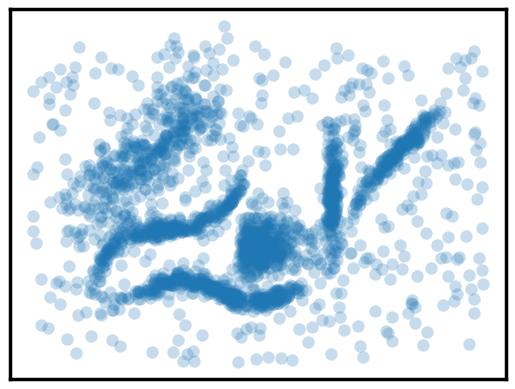

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(data.T[0], data.T[1], **plot_kwds)
ax.set_xticks([])
ax.set_yticks([]);

In [7]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


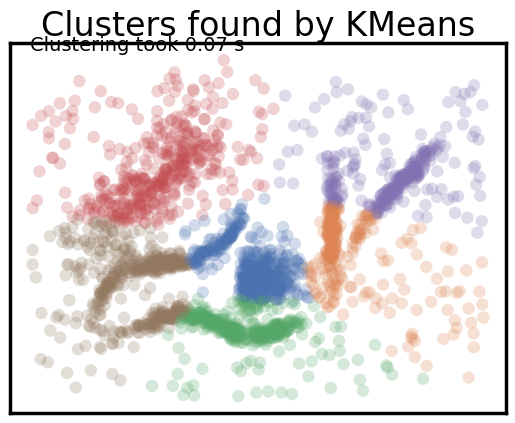

In [8]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

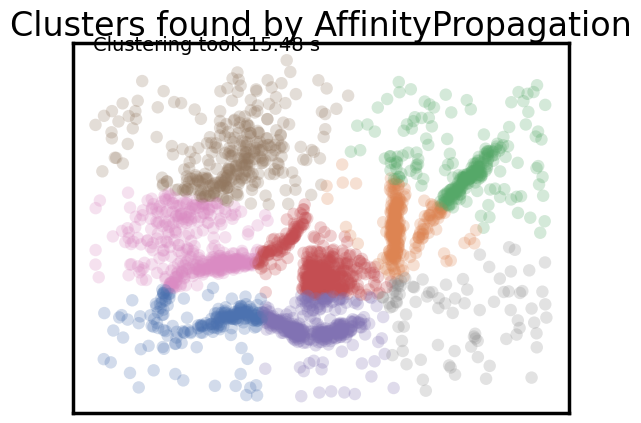

In [9]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

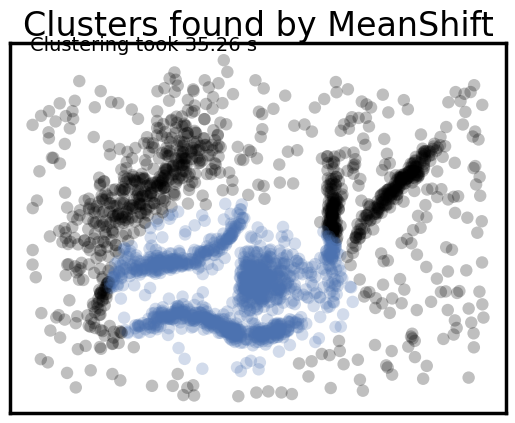

In [10]:
plot_clusters(data, cluster.MeanShift, (), {'cluster_all':False})

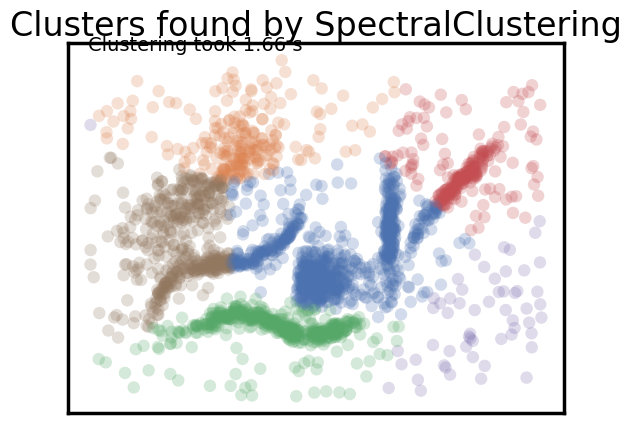

In [11]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

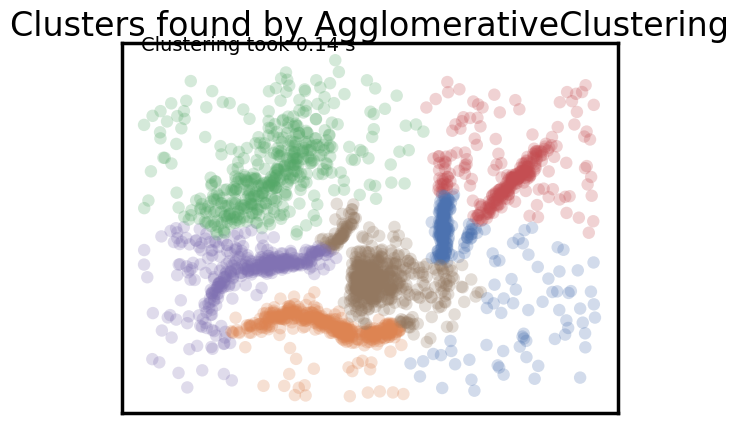

In [12]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

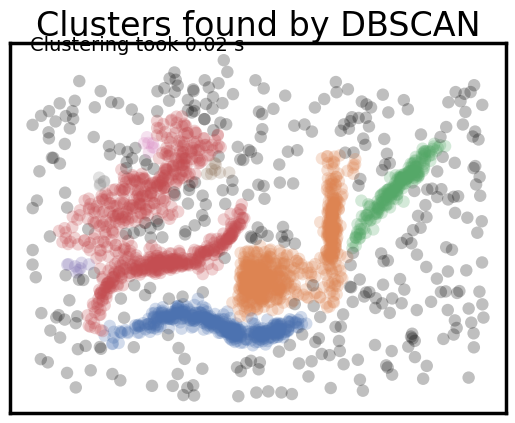

In [13]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

In [14]:
!pip install hdbscan
import hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


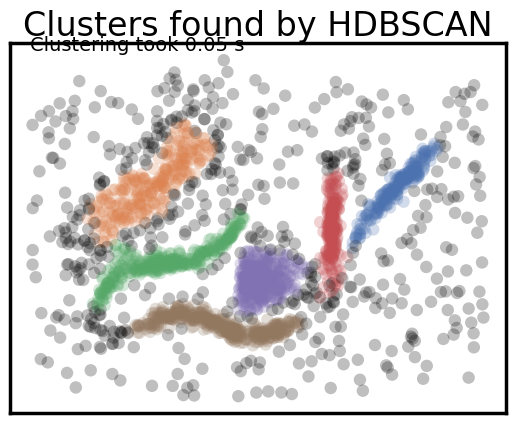

In [15]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

In [16]:
#!wget https://raw.githubusercontent.com/Yangzhehan/Cluster-analysis-of-automotive-products/main/car_price.csv

In [17]:
#import base64

#car_price_data_path = 'car_price.csv'
#with open(car_price_data_path, "rb") as binary_file:
#    binary_file_data = binary_file.read()
#    base64_encoded_data = base64.b64encode(binary_file_data)
#    base64_message = base64_encoded_data.decode('utf-8')
#
#    encodedMdl_bytes = base64_message
#    print(encodedMdl_bytes)

In [18]:
import base64

encodedMdl=r'Y2FyX0lELHN5bWJvbGluZyxDYXJOYW1lLGZ1ZWx0eXBlLGFzcGlyYXRpb24sZG9vcm51bWJlcixjYXJib2R5LGRyaXZld2hlZWwsZW5naW5lbG9jYXRpb24sd2hlZWxiYXNlLGNhcmxlbmd0aCxjYXJ3aWR0aCxjYXJoZWlnaHQsY3VyYndlaWdodCxlbmdpbmV0eXBlLGN5bGluZGVybnVtYmVyLGVuZ2luZXNpemUsZnVlbHN5c3RlbSxib3JlcmF0aW8sc3Ryb2tlLGNvbXByZXNzaW9ucmF0aW8saG9yc2Vwb3dlcixwZWFrcnBtLGNpdHltcGcsaGlnaHdheW1wZyxwcmljZQ0KMSwzLGFsZmEtcm9tZXJvIGdpdWxpYSxnYXMsc3RkLHR3byxjb252ZXJ0aWJsZSxyd2QsZnJvbnQsODguNiwxNjguOCw2NC4xLDQ4LjgsMjU0OCxkb2hjLGZvdXIsMTMwLG1wZmksMy40NywyLjY4LDksMTExLDUwMDAsMjEsMjcsMTM0OTUNCjIsMyxhbGZhLXJvbWVybyBzdGVsdmlvLGdhcyxzdGQsdHdvLGNvbnZlcnRpYmxlLHJ3ZCxmcm9udCw4OC42LDE2OC44LDY0LjEsNDguOCwyNTQ4LGRvaGMsZm91ciwxMzAsbXBmaSwzLjQ3LDIuNjgsOSwxMTEsNTAwMCwyMSwyNywxNjUwMA0KMywxLGFsZmEtcm9tZXJvIFF1YWRyaWZvZ2xpbyxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk0LjUsMTcxLjIsNjUuNSw1Mi40LDI4MjMsb2hjdixzaXgsMTUyLG1wZmksMi42OCwzLjQ3LDksMTU0LDUwMDAsMTksMjYsMTY1MDANCjQsMixhdWRpIDEwMCBscyxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk5LjgsMTc2LjYsNjYuMiw1NC4zLDIzMzcsb2hjLGZvdXIsMTA5LG1wZmksMy4xOSwzLjQsMTAsMTAyLDU1MDAsMjQsMzAsMTM5NTANCjUsMixhdWRpIDEwMGxzLGdhcyxzdGQsZm91cixzZWRhbiw0d2QsZnJvbnQsOTkuNCwxNzYuNiw2Ni40LDU0LjMsMjgyNCxvaGMsZml2ZSwxMzYsbXBmaSwzLjE5LDMuNCw4LDExNSw1NTAwLDE4LDIyLDE3NDUwDQo2LDIsYXVkaSBmb3gsZ2FzLHN0ZCx0d28sc2VkYW4sZndkLGZyb250LDk5LjgsMTc3LjMsNjYuMyw1My4xLDI1MDcsb2hjLGZpdmUsMTM2LG1wZmksMy4xOSwzLjQsOC41LDExMCw1NTAwLDE5LDI1LDE1MjUwDQo3LDEsYXVkaSAxMDBscyxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDEwNS44LDE5Mi43LDcxLjQsNTUuNywyODQ0LG9oYyxmaXZlLDEzNixtcGZpLDMuMTksMy40LDguNSwxMTAsNTUwMCwxOSwyNSwxNzcxMA0KOCwxLGF1ZGkgNTAwMCxnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDEwNS44LDE5Mi43LDcxLjQsNTUuNywyOTU0LG9oYyxmaXZlLDEzNixtcGZpLDMuMTksMy40LDguNSwxMTAsNTUwMCwxOSwyNSwxODkyMA0KOSwxLGF1ZGkgNDAwMCxnYXMsdHVyYm8sZm91cixzZWRhbixmd2QsZnJvbnQsMTA1LjgsMTkyLjcsNzEuNCw1NS45LDMwODYsb2hjLGZpdmUsMTMxLG1wZmksMy4xMywzLjQsOC4zLDE0MCw1NTAwLDE3LDIwLDIzODc1DQoxMCwwLGF1ZGkgNTAwMHMgKGRpZXNlbCksZ2FzLHR1cmJvLHR3byxoYXRjaGJhY2ssNHdkLGZyb250LDk5LjUsMTc4LjIsNjcuOSw1MiwzMDUzLG9oYyxmaXZlLDEzMSxtcGZpLDMuMTMsMy40LDcsMTYwLDU1MDAsMTYsMjIsMTc4NTkuMTY3DQoxMSwyLGJtdyAzMjBpLGdhcyxzdGQsdHdvLHNlZGFuLHJ3ZCxmcm9udCwxMDEuMiwxNzYuOCw2NC44LDU0LjMsMjM5NSxvaGMsZm91ciwxMDgsbXBmaSwzLjUsMi44LDguOCwxMDEsNTgwMCwyMywyOSwxNjQzMA0KMTIsMCxibXcgMzIwaSxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwMS4yLDE3Ni44LDY0LjgsNTQuMywyMzk1LG9oYyxmb3VyLDEwOCxtcGZpLDMuNSwyLjgsOC44LDEwMSw1ODAwLDIzLDI5LDE2OTI1DQoxMywwLGJtdyB4MSxnYXMsc3RkLHR3byxzZWRhbixyd2QsZnJvbnQsMTAxLjIsMTc2LjgsNjQuOCw1NC4zLDI3MTAsb2hjLHNpeCwxNjQsbXBmaSwzLjMxLDMuMTksOSwxMjEsNDI1MCwyMSwyOCwyMDk3MA0KMTQsMCxibXcgeDMsZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMDEuMiwxNzYuOCw2NC44LDU0LjMsMjc2NSxvaGMsc2l4LDE2NCxtcGZpLDMuMzEsMy4xOSw5LDEyMSw0MjUwLDIxLDI4LDIxMTA1DQoxNSwxLGJtdyB6NCxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwMy41LDE4OSw2Ni45LDU1LjcsMzA1NSxvaGMsc2l4LDE2NCxtcGZpLDMuMzEsMy4xOSw5LDEyMSw0MjUwLDIwLDI1LDI0NTY1DQoxNiwwLGJtdyB4NCxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwMy41LDE4OSw2Ni45LDU1LjcsMzIzMCxvaGMsc2l4LDIwOSxtcGZpLDMuNjIsMy4zOSw4LDE4Miw1NDAwLDE2LDIyLDMwNzYwDQoxNywwLGJtdyB4NSxnYXMsc3RkLHR3byxzZWRhbixyd2QsZnJvbnQsMTAzLjUsMTkzLjgsNjcuOSw1My43LDMzODAsb2hjLHNpeCwyMDksbXBmaSwzLjYyLDMuMzksOCwxODIsNTQwMCwxNiwyMiw0MTMxNQ0KMTgsMCxibXcgeDMsZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMTAsMTk3LDcwLjksNTYuMywzNTA1LG9oYyxzaXgsMjA5LG1wZmksMy42MiwzLjM5LDgsMTgyLDU0MDAsMTUsMjAsMzY4ODANCjE5LDIsY2hldnJvbGV0IGltcGFsYSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDg4LjQsMTQxLjEsNjAuMyw1My4yLDE0ODgsbCx0aHJlZSw2MSwyYmJsLDIuOTEsMy4wMyw5LjUsNDgsNTEwMCw0Nyw1Myw1MTUxDQoyMCwxLGNoZXZyb2xldCBtb250ZSBjYXJsbyxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDk0LjUsMTU1LjksNjMuNiw1MiwxODc0LG9oYyxmb3VyLDkwLDJiYmwsMy4wMywzLjExLDkuNiw3MCw1NDAwLDM4LDQzLDYyOTUNCjIxLDAsY2hldnJvbGV0IHZlZ2EgMjMwMCxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk0LjUsMTU4LjgsNjMuNiw1MiwxOTA5LG9oYyxmb3VyLDkwLDJiYmwsMy4wMywzLjExLDkuNiw3MCw1NDAwLDM4LDQzLDY1NzUNCjIyLDEsZG9kZ2UgcmFtcGFnZSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjMuOCw1MC44LDE4NzYsb2hjLGZvdXIsOTAsMmJibCwyLjk3LDMuMjMsOS40MSw2OCw1NTAwLDM3LDQxLDU1NzINCjIzLDEsZG9kZ2UgY2hhbGxlbmdlciBzZSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjMuOCw1MC44LDE4NzYsb2hjLGZvdXIsOTAsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzEsMzgsNjM3Nw0KMjQsMSxkb2RnZSBkMjAwLGdhcyx0dXJibyx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5My43LDE1Ny4zLDYzLjgsNTAuOCwyMTI4LG9oYyxmb3VyLDk4LG1wZmksMy4wMywzLjM5LDcuNiwxMDIsNTUwMCwyNCwzMCw3OTU3DQoyNSwxLGRvZGdlIG1vbmFjbyAoc3cpLGdhcyxzdGQsZm91cixoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjMuOCw1MC42LDE5Njcsb2hjLGZvdXIsOTAsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzEsMzgsNjIyOQ0KMjYsMSxkb2RnZSBjb2x0IGhhcmR0b3AsZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5My43LDE1Ny4zLDYzLjgsNTAuNiwxOTg5LG9oYyxmb3VyLDkwLDJiYmwsMi45NywzLjIzLDkuNCw2OCw1NTAwLDMxLDM4LDY2OTINCjI3LDEsZG9kZ2UgY29sdCAoc3cpLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTMuNywxNTcuMyw2My44LDUwLjYsMTk4OSxvaGMsZm91ciw5MCwyYmJsLDIuOTcsMy4yMyw5LjQsNjgsNTUwMCwzMSwzOCw3NjA5DQoyOCwxLGRvZGdlIGNvcm9uZXQgY3VzdG9tLGdhcyx0dXJibyx0d28sc2VkYW4sZndkLGZyb250LDkzLjcsMTU3LjMsNjMuOCw1MC42LDIxOTEsb2hjLGZvdXIsOTgsbXBmaSwzLjAzLDMuMzksNy42LDEwMiw1NTAwLDI0LDMwLDg1NTgNCjI5LC0xLGRvZGdlIGRhcnQgY3VzdG9tLGdhcyxzdGQsZm91cix3YWdvbixmd2QsZnJvbnQsMTAzLjMsMTc0LjYsNjQuNiw1OS44LDI1MzUsb2hjLGZvdXIsMTIyLDJiYmwsMy4zNCwzLjQ2LDguNSw4OCw1MDAwLDI0LDMwLDg5MjENCjMwLDMsZG9kZ2UgY29yb25ldCBjdXN0b20gKHN3KSxnYXMsdHVyYm8sdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTUuOSwxNzMuMiw2Ni4zLDUwLjIsMjgxMSxvaGMsZm91ciwxNTYsbWZpLDMuNiwzLjksNywxNDUsNTAwMCwxOSwyNCwxMjk2NA0KMzEsMixob25kYSBjaXZpYyxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDg2LjYsMTQ0LjYsNjMuOSw1MC44LDE3MTMsb2hjLGZvdXIsOTIsMWJibCwyLjkxLDMuNDEsOS42LDU4LDQ4MDAsNDksNTQsNjQ3OQ0KMzIsMixob25kYSBjaXZpYyBjdmNjLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsODYuNiwxNDQuNiw2My45LDUwLjgsMTgxOSxvaGMsZm91ciw5MiwxYmJsLDIuOTEsMy40MSw5LjIsNzYsNjAwMCwzMSwzOCw2ODU1DQozMywxLGhvbmRhIGNpdmljLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTMuNywxNTAsNjQsNTIuNiwxODM3LG9oYyxmb3VyLDc5LDFiYmwsMi45MSwzLjA3LDEwLjEsNjAsNTUwMCwzOCw0Miw1Mzk5DQozNCwxLGhvbmRhIGFjY29yZCBjdmNjLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTMuNywxNTAsNjQsNTIuNiwxOTQwLG9oYyxmb3VyLDkyLDFiYmwsMi45MSwzLjQxLDkuMiw3Niw2MDAwLDMwLDM0LDY1MjkNCjM1LDEsaG9uZGEgY2l2aWMgY3ZjYyxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTUwLDY0LDUyLjYsMTk1NixvaGMsZm91ciw5MiwxYmJsLDIuOTEsMy40MSw5LjIsNzYsNjAwMCwzMCwzNCw3MTI5DQozNiwwLGhvbmRhIGFjY29yZCBseCxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk2LjUsMTYzLjQsNjQsNTQuNSwyMDEwLG9oYyxmb3VyLDkyLDFiYmwsMi45MSwzLjQxLDkuMiw3Niw2MDAwLDMwLDM0LDcyOTUNCjM3LDAsaG9uZGEgY2l2aWMgMTUwMCBnbCxnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDk2LjUsMTU3LjEsNjMuOSw1OC4zLDIwMjQsb2hjLGZvdXIsOTIsMWJibCwyLjkyLDMuNDEsOS4yLDc2LDYwMDAsMzAsMzQsNzI5NQ0KMzgsMCxob25kYSBhY2NvcmQsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5Ni41LDE2Ny41LDY1LjIsNTMuMywyMjM2LG9oYyxmb3VyLDExMCwxYmJsLDMuMTUsMy41OCw5LDg2LDU4MDAsMjcsMzMsNzg5NQ0KMzksMCxob25kYSBjaXZpYyAxMzAwLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTYuNSwxNjcuNSw2NS4yLDUzLjMsMjI4OSxvaGMsZm91ciwxMTAsMWJibCwzLjE1LDMuNTgsOSw4Niw1ODAwLDI3LDMzLDkwOTUNCjQwLDAsaG9uZGEgcHJlbHVkZSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk2LjUsMTc1LjQsNjUuMiw1NC4xLDIzMDQsb2hjLGZvdXIsMTEwLDFiYmwsMy4xNSwzLjU4LDksODYsNTgwMCwyNywzMyw4ODQ1DQo0MSwwLGhvbmRhIGFjY29yZCxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk2LjUsMTc1LjQsNjIuNSw1NC4xLDIzNzIsb2hjLGZvdXIsMTEwLDFiYmwsMy4xNSwzLjU4LDksODYsNTgwMCwyNywzMywxMDI5NQ0KNDIsMCxob25kYSBjaXZpYyxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk2LjUsMTc1LjQsNjUuMiw1NC4xLDI0NjUsb2hjLGZvdXIsMTEwLG1wZmksMy4xNSwzLjU4LDksMTAxLDU4MDAsMjQsMjgsMTI5NDUNCjQzLDEsaG9uZGEgY2l2aWMgKGF1dG8pLGdhcyxzdGQsdHdvLHNlZGFuLGZ3ZCxmcm9udCw5Ni41LDE2OS4xLDY2LDUxLDIyOTMsb2hjLGZvdXIsMTEwLDJiYmwsMy4xNSwzLjU4LDkuMSwxMDAsNTUwMCwyNSwzMSwxMDM0NQ0KNDQsMCxpc3V6dSBNVS1YLGdhcyxzdGQsZm91cixzZWRhbixyd2QsZnJvbnQsOTQuMywxNzAuNyw2MS44LDUzLjUsMjMzNyxvaGMsZm91ciwxMTEsMmJibCwzLjMxLDMuMjMsOC41LDc4LDQ4MDAsMjQsMjksNjc4NQ0KNDUsMSxpc3V6dSBELU1heCAsZ2FzLHN0ZCx0d28sc2VkYW4sZndkLGZyb250LDk0LjUsMTU1LjksNjMuNiw1MiwxODc0LG9oYyxmb3VyLDkwLDJiYmwsMy4wMywzLjExLDkuNiw3MCw1NDAwLDM4LDQzLDg5MTYuNQ0KNDYsMCxpc3V6dSBELU1heCBWLUNyb3NzLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTQuNSwxNTUuOSw2My42LDUyLDE5MDksb2hjLGZvdXIsOTAsMmJibCwzLjAzLDMuMTEsOS42LDcwLDU0MDAsMzgsNDMsODkxNi41DQo0NywyLGlzdXp1IEQtTWF4ICxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk2LDE3Mi42LDY1LjIsNTEuNCwyNzM0LG9oYyxmb3VyLDExOSxzcGZpLDMuNDMsMy4yMyw5LjIsOTAsNTAwMCwyNCwyOSwxMTA0OA0KNDgsMCxqYWd1YXIgeGosZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMTMsMTk5LjYsNjkuNiw1Mi44LDQwNjYsZG9oYyxzaXgsMjU4LG1wZmksMy42Myw0LjE3LDguMSwxNzYsNDc1MCwxNSwxOSwzMjI1MA0KNDksMCxqYWd1YXIgeGYsZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMTMsMTk5LjYsNjkuNiw1Mi44LDQwNjYsZG9oYyxzaXgsMjU4LG1wZmksMy42Myw0LjE3LDguMSwxNzYsNDc1MCwxNSwxOSwzNTU1MA0KNTAsMCxqYWd1YXIgeGssZ2FzLHN0ZCx0d28sc2VkYW4scndkLGZyb250LDEwMiwxOTEuNyw3MC42LDQ3LjgsMzk1MCxvaGN2LHR3ZWx2ZSwzMjYsbXBmaSwzLjU0LDIuNzYsMTEuNSwyNjIsNTAwMCwxMywxNywzNjAwMA0KNTEsMSxtYXhkYSByeDMsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5My4xLDE1OS4xLDY0LjIsNTQuMSwxODkwLG9oYyxmb3VyLDkxLDJiYmwsMy4wMywzLjE1LDksNjgsNTAwMCwzMCwzMSw1MTk1DQo1MiwxLG1heGRhIGdsYyBkZWx1eGUsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5My4xLDE1OS4xLDY0LjIsNTQuMSwxOTAwLG9oYyxmb3VyLDkxLDJiYmwsMy4wMywzLjE1LDksNjgsNTAwMCwzMSwzOCw2MDk1DQo1MywxLG1hemRhIHJ4MiBjb3VwZSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjEsMTU5LjEsNjQuMiw1NC4xLDE5MDUsb2hjLGZvdXIsOTEsMmJibCwzLjAzLDMuMTUsOSw2OCw1MDAwLDMxLDM4LDY3OTUNCjU0LDEsbWF6ZGEgcngtNCxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDkzLjEsMTY2LjgsNjQuMiw1NC4xLDE5NDUsb2hjLGZvdXIsOTEsMmJibCwzLjAzLDMuMTUsOSw2OCw1MDAwLDMxLDM4LDY2OTUNCjU1LDEsbWF6ZGEgZ2xjIGRlbHV4ZSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDkzLjEsMTY2LjgsNjQuMiw1NC4xLDE5NTAsb2hjLGZvdXIsOTEsMmJibCwzLjA4LDMuMTUsOSw2OCw1MDAwLDMxLDM4LDczOTUNCjU2LDMsbWF6ZGEgNjI2LGdhcyxzdGQsdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsOTUuMywxNjksNjUuNyw0OS42LDIzODAscm90b3IsdHdvLDcwLDRiYmwsMy4zMywzLjI1NSw5LjQsMTAxLDYwMDAsMTcsMjMsMTA5NDUNCjU3LDMsbWF6ZGEgZ2xjLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsOTUuMywxNjksNjUuNyw0OS42LDIzODAscm90b3IsdHdvLDcwLDRiYmwsMy4zMywzLjI1NSw5LjQsMTAxLDYwMDAsMTcsMjMsMTE4NDUNCjU4LDMsbWF6ZGEgcngtNyBncyxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk1LjMsMTY5LDY1LjcsNDkuNiwyMzg1LHJvdG9yLHR3byw3MCw0YmJsLDMuMzMsMy4yNTUsOS40LDEwMSw2MDAwLDE3LDIzLDEzNjQ1DQo1OSwzLG1hemRhIGdsYyA0LGdhcyxzdGQsdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsOTUuMywxNjksNjUuNyw0OS42LDI1MDAscm90b3IsdHdvLDgwLG1wZmksMy4zMywzLjI1NSw5LjQsMTM1LDYwMDAsMTYsMjMsMTU2NDUNCjYwLDEsbWF6ZGEgNjI2LGdhcyxzdGQsdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTguOCwxNzcuOCw2Ni41LDUzLjcsMjM4NSxvaGMsZm91ciwxMjIsMmJibCwzLjM5LDMuMzksOC42LDg0LDQ4MDAsMjYsMzIsODg0NQ0KNjEsMCxtYXpkYSBnbGMgY3VzdG9tIGwsZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5OC44LDE3Ny44LDY2LjUsNTUuNSwyNDEwLG9oYyxmb3VyLDEyMiwyYmJsLDMuMzksMy4zOSw4LjYsODQsNDgwMCwyNiwzMiw4NDk1DQo2MiwxLG1hemRhIGdsYyBjdXN0b20sZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5OC44LDE3Ny44LDY2LjUsNTMuNywyMzg1LG9oYyxmb3VyLDEyMiwyYmJsLDMuMzksMy4zOSw4LjYsODQsNDgwMCwyNiwzMiwxMDU5NQ0KNjMsMCxtYXpkYSByeC00LGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTguOCwxNzcuOCw2Ni41LDU1LjUsMjQxMCxvaGMsZm91ciwxMjIsMmJibCwzLjM5LDMuMzksOC42LDg0LDQ4MDAsMjYsMzIsMTAyNDUNCjY0LDAsbWF6ZGEgZ2xjIGRlbHV4ZSxkaWVzZWwsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk4LjgsMTc3LjgsNjYuNSw1NS41LDI0NDMsb2hjLGZvdXIsMTIyLGlkaSwzLjM5LDMuMzksMjIuNyw2NCw0NjUwLDM2LDQyLDEwNzk1DQo2NSwwLG1hemRhIDYyNixnYXMsc3RkLGZvdXIsaGF0Y2hiYWNrLGZ3ZCxmcm9udCw5OC44LDE3Ny44LDY2LjUsNTUuNSwyNDI1LG9oYyxmb3VyLDEyMiwyYmJsLDMuMzksMy4zOSw4LjYsODQsNDgwMCwyNiwzMiwxMTI0NQ0KNjYsMCxtYXpkYSBnbGMsZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMDQuOSwxNzUsNjYuMSw1NC40LDI2NzAsb2hjLGZvdXIsMTQwLG1wZmksMy43NiwzLjE2LDgsMTIwLDUwMDAsMTksMjcsMTgyODANCjY3LDAsbWF6ZGEgcngtNyBncyxkaWVzZWwsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwNC45LDE3NSw2Ni4xLDU0LjQsMjcwMCxvaGMsZm91ciwxMzQsaWRpLDMuNDMsMy42NCwyMiw3Miw0MjAwLDMxLDM5LDE4MzQ0DQo2OCwtMSxidWljayBlbGVjdHJhIDIyNSBjdXN0b20sZGllc2VsLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDExMCwxOTAuOSw3MC4zLDU2LjUsMzUxNSxvaGMsZml2ZSwxODMsaWRpLDMuNTgsMy42NCwyMS41LDEyMyw0MzUwLDIyLDI1LDI1NTUyDQo2OSwtMSxidWljayBjZW50dXJ5IGx1eHVzIChzdyksZGllc2VsLHR1cmJvLGZvdXIsd2Fnb24scndkLGZyb250LDExMCwxOTAuOSw3MC4zLDU4LjcsMzc1MCxvaGMsZml2ZSwxODMsaWRpLDMuNTgsMy42NCwyMS41LDEyMyw0MzUwLDIyLDI1LDI4MjQ4DQo3MCwwLGJ1aWNrIGNlbnR1cnksZGllc2VsLHR1cmJvLHR3byxoYXJkdG9wLHJ3ZCxmcm9udCwxMDYuNywxODcuNSw3MC4zLDU0LjksMzQ5NSxvaGMsZml2ZSwxODMsaWRpLDMuNTgsMy42NCwyMS41LDEyMyw0MzUwLDIyLDI1LDI4MTc2DQo3MSwtMSxidWljayBza3loYXdrLGRpZXNlbCx0dXJibyxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMTUuNiwyMDIuNiw3MS43LDU2LjMsMzc3MCxvaGMsZml2ZSwxODMsaWRpLDMuNTgsMy42NCwyMS41LDEyMyw0MzUwLDIyLDI1LDMxNjAwDQo3MiwtMSxidWljayBvcGVsIGlzdXp1IGRlbHV4ZSxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDExNS42LDIwMi42LDcxLjcsNTYuNSwzNzQwLG9oY3YsZWlnaHQsMjM0LG1wZmksMy40NiwzLjEsOC4zLDE1NSw0NzUwLDE2LDE4LDM0MTg0DQo3MywzLGJ1aWNrIHNreWxhcmssZ2FzLHN0ZCx0d28sY29udmVydGlibGUscndkLGZyb250LDk2LjYsMTgwLjMsNzAuNSw1MC44LDM2ODUsb2hjdixlaWdodCwyMzQsbXBmaSwzLjQ2LDMuMSw4LjMsMTU1LDQ3NTAsMTYsMTgsMzUwNTYNCjc0LDAsYnVpY2sgY2VudHVyeSBzcGVjaWFsLGdhcyxzdGQsZm91cixzZWRhbixyd2QsZnJvbnQsMTIwLjksMjA4LjEsNzEuNyw1Ni43LDM5MDAsb2hjdixlaWdodCwzMDgsbXBmaSwzLjgsMy4zNSw4LDE4NCw0NTAwLDE0LDE2LDQwOTYwDQo3NSwxLGJ1aWNrIHJlZ2FsIHNwb3J0IGNvdXBlICh0dXJibyksZ2FzLHN0ZCx0d28saGFyZHRvcCxyd2QsZnJvbnQsMTEyLDE5OS4yLDcyLDU1LjQsMzcxNSxvaGN2LGVpZ2h0LDMwNCxtcGZpLDMuOCwzLjM1LDgsMTg0LDQ1MDAsMTQsMTYsNDU0MDANCjc2LDEsbWVyY3VyeSBjb3VnYXIsZ2FzLHR1cmJvLHR3byxoYXRjaGJhY2sscndkLGZyb250LDEwMi43LDE3OC40LDY4LDU0LjgsMjkxMCxvaGMsZm91ciwxNDAsbXBmaSwzLjc4LDMuMTIsOCwxNzUsNTAwMCwxOSwyNCwxNjUwMw0KNzcsMixtaXRzdWJpc2hpIG1pcmFnZSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjQuNCw1MC44LDE5MTgsb2hjLGZvdXIsOTIsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzcsNDEsNTM4OQ0KNzgsMixtaXRzdWJpc2hpIGxhbmNlcixnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjQuNCw1MC44LDE5NDQsb2hjLGZvdXIsOTIsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzEsMzgsNjE4OQ0KNzksMixtaXRzdWJpc2hpIG91dGxhbmRlcixnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjQuNCw1MC44LDIwMDQsb2hjLGZvdXIsOTIsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzEsMzgsNjY2OQ0KODAsMSxtaXRzdWJpc2hpIGc0LGdhcyx0dXJibyx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5MywxNTcuMyw2My44LDUwLjgsMjE0NSxvaGMsZm91ciw5OCxzcGRpLDMuMDMsMy4zOSw3LjYsMTAyLDU1MDAsMjQsMzAsNzY4OQ0KODEsMyxtaXRzdWJpc2hpIG1pcmFnZSBnNCxnYXMsdHVyYm8sdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTYuMywxNzMsNjUuNCw0OS40LDIzNzAsb2hjLGZvdXIsMTEwLHNwZGksMy4xNywzLjQ2LDcuNSwxMTYsNTUwMCwyMywzMCw5OTU5DQo4MiwzLG1pdHN1YmlzaGkgZzQsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5Ni4zLDE3Myw2NS40LDQ5LjQsMjMyOCxvaGMsZm91ciwxMjIsMmJibCwzLjM1LDMuNDYsOC41LDg4LDUwMDAsMjUsMzIsODQ5OQ0KODMsMyxtaXRzdWJpc2hpIG91dGxhbmRlcixnYXMsdHVyYm8sdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTUuOSwxNzMuMiw2Ni4zLDUwLjIsMjgzMyxvaGMsZm91ciwxNTYsc3BkaSwzLjU4LDMuODYsNywxNDUsNTAwMCwxOSwyNCwxMjYyOQ0KODQsMyxtaXRzdWJpc2hpIGc0LGdhcyx0dXJibyx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5NS45LDE3My4yLDY2LjMsNTAuMiwyOTIxLG9oYyxmb3VyLDE1NixzcGRpLDMuNTksMy44Niw3LDE0NSw1MDAwLDE5LDI0LDE0ODY5DQo4NSwzLG1pdHN1YmlzaGkgbWlyYWdlIGc0LGdhcyx0dXJibyx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5NS45LDE3My4yLDY2LjMsNTAuMiwyOTI2LG9oYyxmb3VyLDE1NixzcGRpLDMuNTksMy44Niw3LDE0NSw1MDAwLDE5LDI0LDE0NDg5DQo4NiwxLG1pdHN1YmlzaGkgbW9udGVybyxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk2LjMsMTcyLjQsNjUuNCw1MS42LDIzNjUsb2hjLGZvdXIsMTIyLDJiYmwsMy4zNSwzLjQ2LDguNSw4OCw1MDAwLDI1LDMyLDY5ODkNCjg3LDEsbWl0c3ViaXNoaSBwYWplcm8sZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5Ni4zLDE3Mi40LDY1LjQsNTEuNiwyNDA1LG9oYyxmb3VyLDEyMiwyYmJsLDMuMzUsMy40Niw4LjUsODgsNTAwMCwyNSwzMiw4MTg5DQo4OCwxLG1pdHN1YmlzaGkgb3V0bGFuZGVyLGdhcyx0dXJibyxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5Ni4zLDE3Mi40LDY1LjQsNTEuNiwyNDAzLG9oYyxmb3VyLDExMCxzcGRpLDMuMTcsMy40Niw3LjUsMTE2LDU1MDAsMjMsMzAsOTI3OQ0KODksLTEsbWl0c3ViaXNoaSBtaXJhZ2UgZzQsZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5Ni4zLDE3Mi40LDY1LjQsNTEuNiwyNDAzLG9oYyxmb3VyLDExMCxzcGRpLDMuMTcsMy40Niw3LjUsMTE2LDU1MDAsMjMsMzAsOTI3OQ0KOTAsMSxOaXNzYW4gdmVyc2EsZ2FzLHN0ZCx0d28sc2VkYW4sZndkLGZyb250LDk0LjUsMTY1LjMsNjMuOCw1NC41LDE4ODksb2hjLGZvdXIsOTcsMmJibCwzLjE1LDMuMjksOS40LDY5LDUyMDAsMzEsMzcsNTQ5OQ0KOTEsMSxuaXNzYW4gZ3QtcixkaWVzZWwsc3RkLHR3byxzZWRhbixmd2QsZnJvbnQsOTQuNSwxNjUuMyw2My44LDU0LjUsMjAxNyxvaGMsZm91ciwxMDMsaWRpLDIuOTksMy40NywyMS45LDU1LDQ4MDAsNDUsNTAsNzA5OQ0KOTIsMSxuaXNzYW4gcm9ndWUsZ2FzLHN0ZCx0d28sc2VkYW4sZndkLGZyb250LDk0LjUsMTY1LjMsNjMuOCw1NC41LDE5MTgsb2hjLGZvdXIsOTcsMmJibCwzLjE1LDMuMjksOS40LDY5LDUyMDAsMzEsMzcsNjY0OQ0KOTMsMSxuaXNzYW4gbGF0aW8sZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5NC41LDE2NS4zLDYzLjgsNTQuNSwxOTM4LG9oYyxmb3VyLDk3LDJiYmwsMy4xNSwzLjI5LDkuNCw2OSw1MjAwLDMxLDM3LDY4NDkNCjk0LDEsbmlzc2FuIHRpdGFuLGdhcyxzdGQsZm91cix3YWdvbixmd2QsZnJvbnQsOTQuNSwxNzAuMiw2My44LDUzLjUsMjAyNCxvaGMsZm91ciw5NywyYmJsLDMuMTUsMy4yOSw5LjQsNjksNTIwMCwzMSwzNyw3MzQ5DQo5NSwxLG5pc3NhbiBsZWFmLGdhcyxzdGQsdHdvLHNlZGFuLGZ3ZCxmcm9udCw5NC41LDE2NS4zLDYzLjgsNTQuNSwxOTUxLG9oYyxmb3VyLDk3LDJiYmwsMy4xNSwzLjI5LDkuNCw2OSw1MjAwLDMxLDM3LDcyOTkNCjk2LDEsbmlzc2FuIGp1a2UsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5NC41LDE2NS42LDYzLjgsNTMuMywyMDI4LG9oYyxmb3VyLDk3LDJiYmwsMy4xNSwzLjI5LDkuNCw2OSw1MjAwLDMxLDM3LDc3OTkNCjk3LDEsbmlzc2FuIGxhdGlvLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTQuNSwxNjUuMyw2My44LDU0LjUsMTk3MSxvaGMsZm91ciw5NywyYmJsLDMuMTUsMy4yOSw5LjQsNjksNTIwMCwzMSwzNyw3NDk5DQo5OCwxLG5pc3NhbiBub3RlLGdhcyxzdGQsZm91cix3YWdvbixmd2QsZnJvbnQsOTQuNSwxNzAuMiw2My44LDUzLjUsMjAzNyxvaGMsZm91ciw5NywyYmJsLDMuMTUsMy4yOSw5LjQsNjksNTIwMCwzMSwzNyw3OTk5DQo5OSwyLG5pc3NhbiBjbGlwcGVyLGdhcyxzdGQsdHdvLGhhcmR0b3AsZndkLGZyb250LDk1LjEsMTYyLjQsNjMuOCw1My4zLDIwMDgsb2hjLGZvdXIsOTcsMmJibCwzLjE1LDMuMjksOS40LDY5LDUyMDAsMzEsMzcsODI0OQ0KMTAwLDAsbmlzc2FuIHJvZ3VlLGdhcyxzdGQsZm91cixoYXRjaGJhY2ssZndkLGZyb250LDk3LjIsMTczLjQsNjUuMiw1NC43LDIzMjQsb2hjLGZvdXIsMTIwLDJiYmwsMy4zMywzLjQ3LDguNSw5Nyw1MjAwLDI3LDM0LDg5NDkNCjEwMSwwLG5pc3NhbiBudjIwMCxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk3LjIsMTczLjQsNjUuMiw1NC43LDIzMDIsb2hjLGZvdXIsMTIwLDJiYmwsMy4zMywzLjQ3LDguNSw5Nyw1MjAwLDI3LDM0LDk1NDkNCjEwMiwwLG5pc3NhbiBkYXl6LGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsMTAwLjQsMTgxLjcsNjYuNSw1NS4xLDMwOTUsb2hjdixzaXgsMTgxLG1wZmksMy40MywzLjI3LDksMTUyLDUyMDAsMTcsMjIsMTM0OTkNCjEwMywwLG5pc3NhbiBmdWdhLGdhcyxzdGQsZm91cix3YWdvbixmd2QsZnJvbnQsMTAwLjQsMTg0LjYsNjYuNSw1Ni4xLDMyOTYsb2hjdixzaXgsMTgxLG1wZmksMy40MywzLjI3LDksMTUyLDUyMDAsMTcsMjIsMTQzOTkNCjEwNCwwLG5pc3NhbiBvdHRpLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsMTAwLjQsMTg0LjYsNjYuNSw1NS4xLDMwNjAsb2hjdixzaXgsMTgxLG1wZmksMy40MywzLjI3LDksMTUyLDUyMDAsMTksMjUsMTM0OTkNCjEwNSwzLG5pc3NhbiB0ZWFuYSxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDkxLjMsMTcwLjcsNjcuOSw0OS43LDMwNzEsb2hjdixzaXgsMTgxLG1wZmksMy40MywzLjI3LDksMTYwLDUyMDAsMTksMjUsMTcxOTkNCjEwNiwzLG5pc3NhbiBraWNrcyxnYXMsdHVyYm8sdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsOTEuMywxNzAuNyw2Ny45LDQ5LjcsMzEzOSxvaGN2LHNpeCwxODEsbXBmaSwzLjQzLDMuMjcsNy44LDIwMCw1MjAwLDE3LDIzLDE5Njk5DQoxMDcsMSxuaXNzYW4gY2xpcHBlcixnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk5LjIsMTc4LjUsNjcuOSw0OS43LDMxMzksb2hjdixzaXgsMTgxLG1wZmksMy40MywzLjI3LDksMTYwLDUyMDAsMTksMjUsMTgzOTkNCjEwOCwwLHBldWdlb3QgNTA0LGdhcyxzdGQsZm91cixzZWRhbixyd2QsZnJvbnQsMTA3LjksMTg2LjcsNjguNCw1Ni43LDMwMjAsbCxmb3VyLDEyMCxtcGZpLDMuNDYsMy4xOSw4LjQsOTcsNTAwMCwxOSwyNCwxMTkwMA0KMTA5LDAscGV1Z2VvdCAzMDQsZGllc2VsLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDEwNy45LDE4Ni43LDY4LjQsNTYuNywzMTk3LGwsZm91ciwxNTIsaWRpLDMuNywzLjUyLDIxLDk1LDQxNTAsMjgsMzMsMTMyMDANCjExMCwwLHBldWdlb3QgNTA0IChzdyksZ2FzLHN0ZCxmb3VyLHdhZ29uLHJ3ZCxmcm9udCwxMTQuMiwxOTguOSw2OC40LDU4LjcsMzIzMCxsLGZvdXIsMTIwLG1wZmksMy40NiwzLjE5LDguNCw5Nyw1MDAwLDE5LDI0LDEyNDQwDQoxMTEsMCxwZXVnZW90IDUwNCxkaWVzZWwsdHVyYm8sZm91cix3YWdvbixyd2QsZnJvbnQsMTE0LjIsMTk4LjksNjguNCw1OC43LDM0MzAsbCxmb3VyLDE1MixpZGksMy43LDMuNTIsMjEsOTUsNDE1MCwyNSwyNSwxMzg2MA0KMTEyLDAscGV1Z2VvdCA1MDQsZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMDcuOSwxODYuNyw2OC40LDU2LjcsMzA3NSxsLGZvdXIsMTIwLG1wZmksMy40NiwyLjE5LDguNCw5NSw1MDAwLDE5LDI0LDE1NTgwDQoxMTMsMCxwZXVnZW90IDYwNHNsLGRpZXNlbCx0dXJibyxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMDcuOSwxODYuNyw2OC40LDU2LjcsMzI1MixsLGZvdXIsMTUyLGlkaSwzLjcsMy41MiwyMSw5NSw0MTUwLDI4LDMzLDE2OTAwDQoxMTQsMCxwZXVnZW90IDUwNCxnYXMsc3RkLGZvdXIsd2Fnb24scndkLGZyb250LDExNC4yLDE5OC45LDY4LjQsNTYuNywzMjg1LGwsZm91ciwxMjAsbXBmaSwzLjQ2LDIuMTksOC40LDk1LDUwMDAsMTksMjQsMTY2OTUNCjExNSwwLHBldWdlb3QgNTA1cyB0dXJibyBkaWVzZWwsZGllc2VsLHR1cmJvLGZvdXIsd2Fnb24scndkLGZyb250LDExNC4yLDE5OC45LDY4LjQsNTguNywzNDg1LGwsZm91ciwxNTIsaWRpLDMuNywzLjUyLDIxLDk1LDQxNTAsMjUsMjUsMTcwNzUNCjExNiwwLHBldWdlb3QgNTA0LGdhcyxzdGQsZm91cixzZWRhbixyd2QsZnJvbnQsMTA3LjksMTg2LjcsNjguNCw1Ni43LDMwNzUsbCxmb3VyLDEyMCxtcGZpLDMuNDYsMy4xOSw4LjQsOTcsNTAwMCwxOSwyNCwxNjYzMA0KMTE3LDAscGV1Z2VvdCA1MDQsZGllc2VsLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDEwNy45LDE4Ni43LDY4LjQsNTYuNywzMjUyLGwsZm91ciwxNTIsaWRpLDMuNywzLjUyLDIxLDk1LDQxNTAsMjgsMzMsMTc5NTANCjExOCwwLHBldWdlb3QgNjA0c2wsZ2FzLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDEwOCwxODYuNyw2OC4zLDU2LDMxMzAsbCxmb3VyLDEzNCxtcGZpLDMuNjEsMy4yMSw3LDE0Miw1NjAwLDE4LDI0LDE4MTUwDQoxMTksMSxwbHltb3V0aCBmdXJ5IGlpaSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjMuOCw1MC44LDE5MTgsb2hjLGZvdXIsOTAsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzcsNDEsNTU3Mg0KMTIwLDEscGx5bW91dGggY3JpY2tldCxnYXMsdHVyYm8sdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTMuNywxNTcuMyw2My44LDUwLjgsMjEyOCxvaGMsZm91ciw5OCxzcGRpLDMuMDMsMy4zOSw3LjYsMTAyLDU1MDAsMjQsMzAsNzk1Nw0KMTIxLDEscGx5bW91dGggZnVyeSBpaWksZ2FzLHN0ZCxmb3VyLGhhdGNoYmFjayxmd2QsZnJvbnQsOTMuNywxNTcuMyw2My44LDUwLjYsMTk2NyxvaGMsZm91ciw5MCwyYmJsLDIuOTcsMy4yMyw5LjQsNjgsNTUwMCwzMSwzOCw2MjI5DQoxMjIsMSxwbHltb3V0aCBzYXRlbGxpdGUgY3VzdG9tIChzdyksZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5My43LDE2Ny4zLDYzLjgsNTAuOCwxOTg5LG9oYyxmb3VyLDkwLDJiYmwsMi45NywzLjIzLDkuNCw2OCw1NTAwLDMxLDM4LDY2OTINCjEyMywxLHBseW1vdXRoIGZ1cnkgZ3JhbiBzZWRhbixnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDkzLjcsMTY3LjMsNjMuOCw1MC44LDIxOTEsb2hjLGZvdXIsOTgsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzEsMzgsNzYwOQ0KMTI0LC0xLHBseW1vdXRoIHZhbGlhbnQsZ2FzLHN0ZCxmb3VyLHdhZ29uLGZ3ZCxmcm9udCwxMDMuMywxNzQuNiw2NC42LDU5LjgsMjUzNSxvaGMsZm91ciwxMjIsMmJibCwzLjM1LDMuNDYsOC41LDg4LDUwMDAsMjQsMzAsODkyMQ0KMTI1LDMscGx5bW91dGggZHVzdGVyLGdhcyx0dXJibyx0d28saGF0Y2hiYWNrLHJ3ZCxmcm9udCw5NS45LDE3My4yLDY2LjMsNTAuMiwyODE4LG9oYyxmb3VyLDE1NixzcGRpLDMuNTksMy44Niw3LDE0NSw1MDAwLDE5LDI0LDEyNzY0DQoxMjYsMyxwb3JzY2hlIG1hY2FuLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsOTQuNSwxNjguOSw2OC4zLDUwLjIsMjc3OCxvaGMsZm91ciwxNTEsbXBmaSwzLjk0LDMuMTEsOS41LDE0Myw1NTAwLDE5LDI3LDIyMDE4DQoxMjcsMyxwb3Jjc2hjZSBwYW5hbWVyYSxnYXMsc3RkLHR3byxoYXJkdG9wLHJ3ZCxyZWFyLDg5LjUsMTY4LjksNjUsNTEuNiwyNzU2LG9oY2Ysc2l4LDE5NCxtcGZpLDMuNzQsMi45LDkuNSwyMDcsNTkwMCwxNywyNSwzMjUyOA0KMTI4LDMscG9yc2NoZSBjYXllbm5lLGdhcyxzdGQsdHdvLGhhcmR0b3AscndkLHJlYXIsODkuNSwxNjguOSw2NSw1MS42LDI3NTYsb2hjZixzaXgsMTk0LG1wZmksMy43NCwyLjksOS41LDIwNyw1OTAwLDE3LDI1LDM0MDI4DQoxMjksMyxwb3JzY2hlIGJveHRlcixnYXMsc3RkLHR3byxjb252ZXJ0aWJsZSxyd2QscmVhciw4OS41LDE2OC45LDY1LDUxLjYsMjgwMCxvaGNmLHNpeCwxOTQsbXBmaSwzLjc0LDIuOSw5LjUsMjA3LDU5MDAsMTcsMjUsMzcwMjgNCjEzMCwxLHBvcnNjaGUgY2F5ZW5uZSxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk4LjQsMTc1LjcsNzIuMyw1MC41LDMzNjYsZG9oY3YsZWlnaHQsMjAzLG1wZmksMy45NCwzLjExLDEwLDI4OCw1NzUwLDE3LDI4LDMxNDAwLjUNCjEzMSwwLHJlbmF1bHQgMTJ0bCxnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDk2LjEsMTgxLjUsNjYuNSw1NS4yLDI1Nzksb2hjLGZvdXIsMTMyLG1wZmksMy40NiwzLjksOC43LDkwLDUxMDAsMjMsMzEsOTI5NQ0KMTMyLDIscmVuYXVsdCA1IGd0bCxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDk2LjEsMTc2LjgsNjYuNiw1MC41LDI0NjAsb2hjLGZvdXIsMTMyLG1wZmksMy40NiwzLjksOC43LDkwLDUxMDAsMjMsMzEsOTg5NQ0KMTMzLDMsc2FhYiA5OWUsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5OS4xLDE4Ni42LDY2LjUsNTYuMSwyNjU4LG9oYyxmb3VyLDEyMSxtcGZpLDMuNTQsMy4wNyw5LjMxLDExMCw1MjUwLDIxLDI4LDExODUwDQoxMzQsMixzYWFiIDk5bGUsZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5OS4xLDE4Ni42LDY2LjUsNTYuMSwyNjk1LG9oYyxmb3VyLDEyMSxtcGZpLDMuNTQsMy4wNyw5LjMsMTEwLDUyNTAsMjEsMjgsMTIxNzANCjEzNSwzLHNhYWIgOTlsZSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDk5LjEsMTg2LjYsNjYuNSw1Ni4xLDI3MDcsb2hjLGZvdXIsMTIxLG1wZmksMi41NCwyLjA3LDkuMywxMTAsNTI1MCwyMSwyOCwxNTA0MA0KMTM2LDIsc2FhYiA5OWdsZSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk5LjEsMTg2LjYsNjYuNSw1Ni4xLDI3NTgsb2hjLGZvdXIsMTIxLG1wZmksMy41NCwzLjA3LDkuMywxMTAsNTI1MCwyMSwyOCwxNTUxMA0KMTM3LDMsc2FhYiA5OWdsZSxnYXMsdHVyYm8sdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTkuMSwxODYuNiw2Ni41LDU2LjEsMjgwOCxkb2hjLGZvdXIsMTIxLG1wZmksMy41NCwzLjA3LDksMTYwLDU1MDAsMTksMjYsMTgxNTANCjEzOCwyLHNhYWIgOTllLGdhcyx0dXJibyxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5OS4xLDE4Ni42LDY2LjUsNTYuMSwyODQ3LGRvaGMsZm91ciwxMjEsbXBmaSwzLjU0LDMuMDcsOSwxNjAsNTUwMCwxOSwyNiwxODYyMA0KMTM5LDIsc3ViYXJ1LGdhcyxzdGQsdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTMuNywxNTYuOSw2My40LDUzLjcsMjA1MCxvaGNmLGZvdXIsOTcsMmJibCwzLjYyLDIuMzYsOSw2OSw0OTAwLDMxLDM2LDUxMTgNCjE0MCwyLHN1YmFydSBkbCxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjksNjMuNiw1My43LDIxMjAsb2hjZixmb3VyLDEwOCwyYmJsLDMuNjIsMi42NCw4LjcsNzMsNDQwMCwyNiwzMSw3MDUzDQoxNDEsMixzdWJhcnUgZGwsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLDR3ZCxmcm9udCw5My4zLDE1Ny4zLDYzLjgsNTUuNywyMjQwLG9oY2YsZm91ciwxMDgsMmJibCwzLjYyLDIuNjQsOC43LDczLDQ0MDAsMjYsMzEsNzYwMw0KMTQyLDAsc3ViYXJ1LGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTcuMiwxNzIsNjUuNCw1Mi41LDIxNDUsb2hjZixmb3VyLDEwOCwyYmJsLDMuNjIsMi42NCw5LjUsODIsNDgwMCwzMiwzNyw3MTI2DQoxNDMsMCxzdWJhcnUgYnJ6LGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTcuMiwxNzIsNjUuNCw1Mi41LDIxOTAsb2hjZixmb3VyLDEwOCwyYmJsLDMuNjIsMi42NCw5LjUsODIsNDQwMCwyOCwzMyw3Nzc1DQoxNDQsMCxzdWJhcnUgYmFqYSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk3LjIsMTcyLDY1LjQsNTIuNSwyMzQwLG9oY2YsZm91ciwxMDgsbXBmaSwzLjYyLDIuNjQsOSw5NCw1MjAwLDI2LDMyLDk5NjANCjE0NSwwLHN1YmFydSByMSxnYXMsc3RkLGZvdXIsc2VkYW4sNHdkLGZyb250LDk3LDE3Miw2NS40LDU0LjMsMjM4NSxvaGNmLGZvdXIsMTA4LDJiYmwsMy42MiwyLjY0LDksODIsNDgwMCwyNCwyNSw5MjMzDQoxNDYsMCxzdWJhcnUgcjIsZ2FzLHR1cmJvLGZvdXIsc2VkYW4sNHdkLGZyb250LDk3LDE3Miw2NS40LDU0LjMsMjUxMCxvaGNmLGZvdXIsMTA4LG1wZmksMy42MiwyLjY0LDcuNywxMTEsNDgwMCwyNCwyOSwxMTI1OQ0KMTQ3LDAsc3ViYXJ1IHRyZXppYSxnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDk3LDE3My41LDY1LjQsNTMsMjI5MCxvaGNmLGZvdXIsMTA4LDJiYmwsMy42MiwyLjY0LDksODIsNDgwMCwyOCwzMiw3NDYzDQoxNDgsMCxzdWJhcnUgdHJpYmVjYSxnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDk3LDE3My41LDY1LjQsNTMsMjQ1NSxvaGNmLGZvdXIsMTA4LG1wZmksMy42MiwyLjY0LDksOTQsNTIwMCwyNSwzMSwxMDE5OA0KMTQ5LDAsc3ViYXJ1IGRsLGdhcyxzdGQsZm91cix3YWdvbiw0d2QsZnJvbnQsOTYuOSwxNzMuNiw2NS40LDU0LjksMjQyMCxvaGNmLGZvdXIsMTA4LDJiYmwsMy42MiwyLjY0LDksODIsNDgwMCwyMywyOSw4MDEzDQoxNTAsMCxzdWJhcnUgZGwsZ2FzLHR1cmJvLGZvdXIsd2Fnb24sNHdkLGZyb250LDk2LjksMTczLjYsNjUuNCw1NC45LDI2NTAsb2hjZixmb3VyLDEwOCxtcGZpLDMuNjIsMi42NCw3LjcsMTExLDQ4MDAsMjMsMjMsMTE2OTQNCjE1MSwxLHRveW90YSBjb3JvbmEgbWFyayBpaSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDk1LjcsMTU4LjcsNjMuNiw1NC41LDE5ODUsb2hjLGZvdXIsOTIsMmJibCwzLjA1LDMuMDMsOSw2Miw0ODAwLDM1LDM5LDUzNDgNCjE1MiwxLHRveW90YSBjb3JvbmEsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5NS43LDE1OC43LDYzLjYsNTQuNSwyMDQwLG9oYyxmb3VyLDkyLDJiYmwsMy4wNSwzLjAzLDksNjIsNDgwMCwzMSwzOCw2MzM4DQoxNTMsMSx0b3lvdGEgY29yb2xsYSAxMjAwLGdhcyxzdGQsZm91cixoYXRjaGJhY2ssZndkLGZyb250LDk1LjcsMTU4LjcsNjMuNiw1NC41LDIwMTUsb2hjLGZvdXIsOTIsMmJibCwzLjA1LDMuMDMsOSw2Miw0ODAwLDMxLDM4LDY0ODgNCjE1NCwwLHRveW90YSBjb3JvbmEgaGFyZHRvcCxnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDk1LjcsMTY5LjcsNjMuNiw1OS4xLDIyODAsb2hjLGZvdXIsOTIsMmJibCwzLjA1LDMuMDMsOSw2Miw0ODAwLDMxLDM3LDY5MTgNCjE1NSwwLHRveW90YSBjb3JvbGxhIDE2MDAgKHN3KSxnYXMsc3RkLGZvdXIsd2Fnb24sNHdkLGZyb250LDk1LjcsMTY5LjcsNjMuNiw1OS4xLDIyOTAsb2hjLGZvdXIsOTIsMmJibCwzLjA1LDMuMDMsOSw2Miw0ODAwLDI3LDMyLDc4OTgNCjE1NiwwLHRveW90YSBjYXJpbmEsZ2FzLHN0ZCxmb3VyLHdhZ29uLDR3ZCxmcm9udCw5NS43LDE2OS43LDYzLjYsNTkuMSwzMTEwLG9oYyxmb3VyLDkyLDJiYmwsMy4wNSwzLjAzLDksNjIsNDgwMCwyNywzMiw4Nzc4DQoxNTcsMCx0b3lvdGEgbWFyayBpaSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk1LjcsMTY2LjMsNjQuNCw1MywyMDgxLG9oYyxmb3VyLDk4LDJiYmwsMy4xOSwzLjAzLDksNzAsNDgwMCwzMCwzNyw2OTM4DQoxNTgsMCx0b3lvdGEgY29yb2xsYSAxMjAwLGdhcyxzdGQsZm91cixoYXRjaGJhY2ssZndkLGZyb250LDk1LjcsMTY2LjMsNjQuNCw1Mi44LDIxMDksb2hjLGZvdXIsOTgsMmJibCwzLjE5LDMuMDMsOSw3MCw0ODAwLDMwLDM3LDcxOTgNCjE1OSwwLHRveW90YSBjb3JvbmEsZGllc2VsLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5NS43LDE2Ni4zLDY0LjQsNTMsMjI3NSxvaGMsZm91ciwxMTAsaWRpLDMuMjcsMy4zNSwyMi41LDU2LDQ1MDAsMzQsMzYsNzg5OA0KMTYwLDAsdG95b3RhIGNvcm9sbGEsZGllc2VsLHN0ZCxmb3VyLGhhdGNoYmFjayxmd2QsZnJvbnQsOTUuNywxNjYuMyw2NC40LDUyLjgsMjI3NSxvaGMsZm91ciwxMTAsaWRpLDMuMjcsMy4zNSwyMi41LDU2LDQ1MDAsMzgsNDcsNzc4OA0KMTYxLDAsdG95b3RhIGNvcm9uYSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk1LjcsMTY2LjMsNjQuNCw1MywyMDk0LG9oYyxmb3VyLDk4LDJiYmwsMy4xOSwzLjAzLDksNzAsNDgwMCwzOCw0Nyw3NzM4DQoxNjIsMCx0b3lvdGEgY29yb2xsYSxnYXMsc3RkLGZvdXIsaGF0Y2hiYWNrLGZ3ZCxmcm9udCw5NS43LDE2Ni4zLDY0LjQsNTIuOCwyMTIyLG9oYyxmb3VyLDk4LDJiYmwsMy4xOSwzLjAzLDksNzAsNDgwMCwyOCwzNCw4MzU4DQoxNjMsMCx0b3lvdGEgbWFyayBpaSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk1LjcsMTY2LjMsNjQuNCw1Mi44LDIxNDAsb2hjLGZvdXIsOTgsMmJibCwzLjE5LDMuMDMsOSw3MCw0ODAwLDI4LDM0LDkyNTgNCjE2NCwxLHRveW90YSBjb3JvbGxhIGxpZnRiYWNrLGdhcyxzdGQsdHdvLHNlZGFuLHJ3ZCxmcm9udCw5NC41LDE2OC43LDY0LDUyLjYsMjE2OSxvaGMsZm91ciw5OCwyYmJsLDMuMTksMy4wMyw5LDcwLDQ4MDAsMjksMzQsODA1OA0KMTY1LDEsdG95b3RhIGNvcm9uYSxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk0LjUsMTY4LjcsNjQsNTIuNiwyMjA0LG9oYyxmb3VyLDk4LDJiYmwsMy4xOSwzLjAzLDksNzAsNDgwMCwyOSwzNCw4MjM4DQoxNjYsMSx0b3lvdGEgY2VsaWNhIGd0IGxpZnRiYWNrLGdhcyxzdGQsdHdvLHNlZGFuLHJ3ZCxmcm9udCw5NC41LDE2OC43LDY0LDUyLjYsMjI2NSxkb2hjLGZvdXIsOTgsbXBmaSwzLjI0LDMuMDgsOS40LDExMiw2NjAwLDI2LDI5LDkyOTgNCjE2NywxLHRveW90YSBjb3JvbGxhIHRlcmNlbCxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk0LjUsMTY4LjcsNjQsNTIuNiwyMzAwLGRvaGMsZm91ciw5OCxtcGZpLDMuMjQsMy4wOCw5LjQsMTEyLDY2MDAsMjYsMjksOTUzOA0KMTY4LDIsdG95b3RhIGNvcm9uYSBsaWZ0YmFjayxnYXMsc3RkLHR3byxoYXJkdG9wLHJ3ZCxmcm9udCw5OC40LDE3Ni4yLDY1LjYsNTIsMjU0MCxvaGMsZm91ciwxNDYsbXBmaSwzLjYyLDMuNSw5LjMsMTE2LDQ4MDAsMjQsMzAsODQ0OQ0KMTY5LDIsdG95b3RhIGNvcm9sbGEsZ2FzLHN0ZCx0d28saGFyZHRvcCxyd2QsZnJvbnQsOTguNCwxNzYuMiw2NS42LDUyLDI1MzYsb2hjLGZvdXIsMTQ2LG1wZmksMy42MiwzLjUsOS4zLDExNiw0ODAwLDI0LDMwLDk2MzkNCjE3MCwyLHRveW90YSBzdGFybGV0LGdhcyxzdGQsdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsOTguNCwxNzYuMiw2NS42LDUyLDI1NTEsb2hjLGZvdXIsMTQ2LG1wZmksMy42MiwzLjUsOS4zLDExNiw0ODAwLDI0LDMwLDk5ODkNCjE3MSwyLHRveW90YSB0ZXJjZWwsZ2FzLHN0ZCx0d28saGFyZHRvcCxyd2QsZnJvbnQsOTguNCwxNzYuMiw2NS42LDUyLDI2Nzksb2hjLGZvdXIsMTQ2LG1wZmksMy42MiwzLjUsOS4zLDExNiw0ODAwLDI0LDMwLDExMTk5DQoxNzIsMix0b3lvdGEgY29yb2xsYSxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk4LjQsMTc2LjIsNjUuNiw1MiwyNzE0LG9oYyxmb3VyLDE0NixtcGZpLDMuNjIsMy41LDkuMywxMTYsNDgwMCwyNCwzMCwxMTU0OQ0KMTczLDIsdG95b3RhIGNyZXNzaWRhLGdhcyxzdGQsdHdvLGNvbnZlcnRpYmxlLHJ3ZCxmcm9udCw5OC40LDE3Ni4yLDY1LjYsNTMsMjk3NSxvaGMsZm91ciwxNDYsbXBmaSwzLjYyLDMuNSw5LjMsMTE2LDQ4MDAsMjQsMzAsMTc2NjkNCjE3NCwtMSx0b3lvdGEgY29yb2xsYSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDEwMi40LDE3NS42LDY2LjUsNTQuOSwyMzI2LG9oYyxmb3VyLDEyMixtcGZpLDMuMzEsMy41NCw4LjcsOTIsNDIwMCwyOSwzNCw4OTQ4DQoxNzUsLTEsdG95b3RhIGNlbGljYSBndCxkaWVzZWwsdHVyYm8sZm91cixzZWRhbixmd2QsZnJvbnQsMTAyLjQsMTc1LjYsNjYuNSw1NC45LDI0ODAsb2hjLGZvdXIsMTEwLGlkaSwzLjI3LDMuMzUsMjIuNSw3Myw0NTAwLDMwLDMzLDEwNjk4DQoxNzYsLTEsdG95b3RhIGNvcm9uYSxnYXMsc3RkLGZvdXIsaGF0Y2hiYWNrLGZ3ZCxmcm9udCwxMDIuNCwxNzUuNiw2Ni41LDUzLjksMjQxNCxvaGMsZm91ciwxMjIsbXBmaSwzLjMxLDMuNTQsOC43LDkyLDQyMDAsMjcsMzIsOTk4OA0KMTc3LC0xLHRveW90YSBjb3JvbGxhLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsMTAyLjQsMTc1LjYsNjYuNSw1NC45LDI0MTQsb2hjLGZvdXIsMTIyLG1wZmksMy4zMSwzLjU0LDguNyw5Miw0MjAwLDI3LDMyLDEwODk4DQoxNzgsLTEsdG95b3RhIG1hcmsgaWksZ2FzLHN0ZCxmb3VyLGhhdGNoYmFjayxmd2QsZnJvbnQsMTAyLjQsMTc1LjYsNjYuNSw1My45LDI0NTgsb2hjLGZvdXIsMTIyLG1wZmksMy4zMSwzLjU0LDguNyw5Miw0MjAwLDI3LDMyLDExMjQ4DQoxNzksMyx0b3lvdGEgY29yb2xsYSBsaWZ0YmFjayxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDEwMi45LDE4My41LDY3LjcsNTIsMjk3Nixkb2hjLHNpeCwxNzEsbXBmaSwzLjI3LDMuMzUsOS4zLDE2MSw1MjAwLDIwLDI0LDE2NTU4DQoxODAsMyx0b3lvdGEgY29yb25hLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsMTAyLjksMTgzLjUsNjcuNyw1MiwzMDE2LGRvaGMsc2l4LDE3MSxtcGZpLDMuMjcsMy4zNSw5LjMsMTYxLDUyMDAsMTksMjQsMTU5OTgNCjE4MSwtMSx0b3lvdGEgc3RhcmxldCxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwNC41LDE4Ny44LDY2LjUsNTQuMSwzMTMxLGRvaGMsc2l4LDE3MSxtcGZpLDMuMjcsMy4zNSw5LjIsMTU2LDUyMDAsMjAsMjQsMTU2OTANCjE4MiwtMSx0b3lvdXRhIHRlcmNlbCxnYXMsc3RkLGZvdXIsd2Fnb24scndkLGZyb250LDEwNC41LDE4Ny44LDY2LjUsNTQuMSwzMTUxLGRvaGMsc2l4LDE2MSxtcGZpLDMuMjcsMy4zNSw5LjIsMTU2LDUyMDAsMTksMjQsMTU3NTANCjE4MywyLHZva3N3YWdlbiByYWJiaXQsZGllc2VsLHN0ZCx0d28sc2VkYW4sZndkLGZyb250LDk3LjMsMTcxLjcsNjUuNSw1NS43LDIyNjEsb2hjLGZvdXIsOTcsaWRpLDMuMDEsMy40LDIzLDUyLDQ4MDAsMzcsNDYsNzc3NQ0KMTg0LDIsdm9sa3N3YWdlbiAxMTMxIGRlbHV4ZSBzZWRhbixnYXMsc3RkLHR3byxzZWRhbixmd2QsZnJvbnQsOTcuMywxNzEuNyw2NS41LDU1LjcsMjIwOSxvaGMsZm91ciwxMDksbXBmaSwzLjE5LDMuNCw5LDg1LDUyNTAsMjcsMzQsNzk3NQ0KMTg1LDIsdm9sa3N3YWdlbiBtb2RlbCAxMTEsZGllc2VsLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5Ny4zLDE3MS43LDY1LjUsNTUuNywyMjY0LG9oYyxmb3VyLDk3LGlkaSwzLjAxLDMuNCwyMyw1Miw0ODAwLDM3LDQ2LDc5OTUNCjE4NiwyLHZvbGtzd2FnZW4gdHlwZSAzLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTcuMywxNzEuNyw2NS41LDU1LjcsMjIxMixvaGMsZm91ciwxMDksbXBmaSwzLjE5LDMuNCw5LDg1LDUyNTAsMjcsMzQsODE5NQ0KMTg3LDIsdm9sa3N3YWdlbiA0MTEgKHN3KSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk3LjMsMTcxLjcsNjUuNSw1NS43LDIyNzUsb2hjLGZvdXIsMTA5LG1wZmksMy4xOSwzLjQsOSw4NSw1MjUwLDI3LDM0LDg0OTUNCjE4OCwyLHZvbGtzd2FnZW4gc3VwZXIgYmVldGxlLGRpZXNlbCx0dXJibyxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5Ny4zLDE3MS43LDY1LjUsNTUuNywyMzE5LG9oYyxmb3VyLDk3LGlkaSwzLjAxLDMuNCwyMyw2OCw0NTAwLDM3LDQyLDk0OTUNCjE4OSwyLHZvbGtzd2FnZW4gZGFzaGVyLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTcuMywxNzEuNyw2NS41LDU1LjcsMjMwMCxvaGMsZm91ciwxMDksbXBmaSwzLjE5LDMuNCwxMCwxMDAsNTUwMCwyNiwzMiw5OTk1DQoxOTAsMyx2dyBkYXNoZXIsZ2FzLHN0ZCx0d28sY29udmVydGlibGUsZndkLGZyb250LDk0LjUsMTU5LjMsNjQuMiw1NS42LDIyNTQsb2hjLGZvdXIsMTA5LG1wZmksMy4xOSwzLjQsOC41LDkwLDU1MDAsMjQsMjksMTE1OTUNCjE5MSwzLHZ3IHJhYmJpdCxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDk0LjUsMTY1LjcsNjQsNTEuNCwyMjIxLG9oYyxmb3VyLDEwOSxtcGZpLDMuMTksMy40LDguNSw5MCw1NTAwLDI0LDI5LDk5ODANCjE5MiwwLHZvbGtzd2FnZW4gcmFiYml0LGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsMTAwLjQsMTgwLjIsNjYuOSw1NS4xLDI2NjEsb2hjLGZpdmUsMTM2LG1wZmksMy4xOSwzLjQsOC41LDExMCw1NTAwLDE5LDI0LDEzMjk1DQoxOTMsMCx2b2xrc3dhZ2VuIHJhYmJpdCBjdXN0b20sZGllc2VsLHR1cmJvLGZvdXIsc2VkYW4sZndkLGZyb250LDEwMC40LDE4MC4yLDY2LjksNTUuMSwyNTc5LG9oYyxmb3VyLDk3LGlkaSwzLjAxLDMuNCwyMyw2OCw0NTAwLDMzLDM4LDEzODQ1DQoxOTQsMCx2b2xrc3dhZ2VuIGRhc2hlcixnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDEwMC40LDE4My4xLDY2LjksNTUuMSwyNTYzLG9oYyxmb3VyLDEwOSxtcGZpLDMuMTksMy40LDksODgsNTUwMCwyNSwzMSwxMjI5MA0KMTk1LC0yLHZvbHZvIDE0NWUgKHN3KSxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwNC4zLDE4OC44LDY3LjIsNTYuMiwyOTEyLG9oYyxmb3VyLDE0MSxtcGZpLDMuNzgsMy4xNSw5LjUsMTE0LDU0MDAsMjMsMjgsMTI5NDANCjE5NiwtMSx2b2x2byAxNDRlYSxnYXMsc3RkLGZvdXIsd2Fnb24scndkLGZyb250LDEwNC4zLDE4OC44LDY3LjIsNTcuNSwzMDM0LG9oYyxmb3VyLDE0MSxtcGZpLDMuNzgsMy4xNSw5LjUsMTE0LDU0MDAsMjMsMjgsMTM0MTUNCjE5NywtMix2b2x2byAyNDRkbCxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwNC4zLDE4OC44LDY3LjIsNTYuMiwyOTM1LG9oYyxmb3VyLDE0MSxtcGZpLDMuNzgsMy4xNSw5LjUsMTE0LDU0MDAsMjQsMjgsMTU5ODUNCjE5OCwtMSx2b2x2byAyNDUsZ2FzLHN0ZCxmb3VyLHdhZ29uLHJ3ZCxmcm9udCwxMDQuMywxODguOCw2Ny4yLDU3LjUsMzA0MixvaGMsZm91ciwxNDEsbXBmaSwzLjc4LDMuMTUsOS41LDExNCw1NDAwLDI0LDI4LDE2NTE1DQoxOTksLTIsdm9sdm8gMjY0Z2wsZ2FzLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDEwNC4zLDE4OC44LDY3LjIsNTYuMiwzMDQ1LG9oYyxmb3VyLDEzMCxtcGZpLDMuNjIsMy4xNSw3LjUsMTYyLDUxMDAsMTcsMjIsMTg0MjANCjIwMCwtMSx2b2x2byBkaWVzZWwsZ2FzLHR1cmJvLGZvdXIsd2Fnb24scndkLGZyb250LDEwNC4zLDE4OC44LDY3LjIsNTcuNSwzMTU3LG9oYyxmb3VyLDEzMCxtcGZpLDMuNjIsMy4xNSw3LjUsMTYyLDUxMDAsMTcsMjIsMTg5NTANCjIwMSwtMSx2b2x2byAxNDVlIChzdyksZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMDkuMSwxODguOCw2OC45LDU1LjUsMjk1MixvaGMsZm91ciwxNDEsbXBmaSwzLjc4LDMuMTUsOS41LDExNCw1NDAwLDIzLDI4LDE2ODQ1DQoyMDIsLTEsdm9sdm8gMTQ0ZWEsZ2FzLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDEwOS4xLDE4OC44LDY4LjgsNTUuNSwzMDQ5LG9oYyxmb3VyLDE0MSxtcGZpLDMuNzgsMy4xNSw4LjcsMTYwLDUzMDAsMTksMjUsMTkwNDUNCjIwMywtMSx2b2x2byAyNDRkbCxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwOS4xLDE4OC44LDY4LjksNTUuNSwzMDEyLG9oY3Ysc2l4LDE3MyxtcGZpLDMuNTgsMi44Nyw4LjgsMTM0LDU1MDAsMTgsMjMsMjE0ODUNCjIwNCwtMSx2b2x2byAyNDYsZGllc2VsLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDEwOS4xLDE4OC44LDY4LjksNTUuNSwzMjE3LG9oYyxzaXgsMTQ1LGlkaSwzLjAxLDMuNCwyMywxMDYsNDgwMCwyNiwyNywyMjQ3MA0KMjA1LC0xLHZvbHZvIDI2NGdsLGdhcyx0dXJibyxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMDkuMSwxODguOCw2OC45LDU1LjUsMzA2MixvaGMsZm91ciwxNDEsbXBmaSwzLjc4LDMuMTUsOS41LDExNCw1NDAwLDE5LDI1LDIyNjI1DQo='

encodedMdl_bytes = encodedMdl.encode('utf-8')
car_price_data_path_bk = 'car_price.csv'
with open(car_price_data_path_bk, 'wb') as file_to_save:
    encodedMdl_data = base64.decodebytes(encodedMdl_bytes)
    file_to_save.write(encodedMdl_data)

     

1. 数据字段理解

* car_ID：205款车辆的唯一ID（整数型）

* symboling：车辆风险评估等级（+3代表风险/-3代表安全）（类别型）

* carName：车辆名称（类别型）

* fueltype：燃油类型，汽油或者柴油（类别型）

* aspiration：进气（类别型）

* doornumber：车门数（类别型）

* carbody：车身（类别型）

* drivewheel：驱动车轮（类别型）

* enginelocation：引擎位置（类别型）

* wheelbase：车轴距（数值型）

* carlength/carwidth/carheight：车身长/宽/高（数值型）

* curbweight：车身净重（无乘客及行李）（数值型）

* enginetype：引擎类型（类别型）

* cylindernumber：汽缸数（类别型）

* enginesize：引擎尺寸（数值型）

* fuelsystem：燃油系统（类别型）

* boreratio：车内径比（数值型）

* stroke：引擎体量（数值型）

* compressionratio：车压缩比（数值型）

* horsepower：马力（数值型）

* peakrpm：最大扭矩转速（数值型）

* citympg：城市里程数（数值型）

* highwaympg：高速里程数（数值型）

* price：汽车价格（数值型）

2. 原始数据描述性统计分析



In [19]:
import pandas as pd
ori_data = pd.read_csv("./car_price.csv", index_col = 0)
ori_data

symboling                   CarName fueltype aspiration doornumber  \
car_ID                                                                       
1               3        alfa-romero giulia      gas        std        two   
2               3       alfa-romero stelvio      gas        std        two   
3               1  alfa-romero Quadrifoglio      gas        std        two   
4               2               audi 100 ls      gas        std       four   
5               2                audi 100ls      gas        std       four   
...           ...                       ...      ...        ...        ...   
201            -1           volvo 145e (sw)      gas        std       four   
202            -1               volvo 144ea      gas      turbo       four   
203            -1               volvo 244dl      gas        std       four   
204            -1                 volvo 246   diesel      turbo       four   
205            -1               volvo 264gl      gas      turbo       four   

            carbody drivewheel enginelocation  wheelbase  carlength  ...  \
car_ID                                                               ...   
1       convertible        rwd          front       88.6      168.8  ...   
2       convertible        rwd          front       88.6      168.8  ...   
3         hatchback        rwd          front       94.5      171.2  ...   
4             sedan        fwd          front       99.8      176.6  ...   
5             sedan        4wd          front       99.4      176.6  ...   
...             ...        ...            ...        ...        ...  ...   
201           sedan        rwd          front      109.1      188.8  ...   
202           sedan        rwd          front      109.1      188.8  ...   
203           sedan        rwd          front      109.1      188.8  ...   
204           sedan        rwd          front      109.1      188.8  ...   
205           sedan        rwd          front      109.1      188.8  ...   

        enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
car_ID                                                                          
1              130        mpfi       3.47   2.68              9.0         111   
2              130        mpfi       3.47   2.68              9.0         111   
3              152        mpfi       2.68   3.47              9.0         154   
4              109        mpfi       3.19   3.40             10.0         102   
5              136        mpfi       3.19   3.40              8.0         115   
...            ...         ...        ...    ...              ...         ...   
201            141        mpfi       3.78   3.15              9.5         114   
202            141        mpfi       3.78   3.15              8.7         160   
203            173        mpfi       3.58   2.87              8.8         134   
204            145         idi       3.01   3.40             23.0         106   
205            141        mpfi       3.78   3.15              9.5         114   

       peakrpm  citympg  highwaympg    price  
car_ID                                        
1         5000       21          27  13495.0  
2         5000       21          27  16500.0  
3         5000       19          26  16500.0  
4         5500       24          30  13950.0  
5         5500       18          22  17450.0  
...        ...      ...         ...      ...  
201       5400       23          28  16845.0  
202       5300       19          25  19045.0  
203       5500       18          23  21485.0  
204       4800       26          27  22470.0  
205       5400       19          25  22625.0  

[205 rows x 25 columns]

In [20]:
# 查看数据的基本情况
print(ori_data.shape)
print("=" * 60)
print(ori_data.info())
print("=" * 60)
print(ori_data.describe())
print("=" * 60)
print(ori_data.columns)

(205, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    

2.1 类别型变量分布及可视化

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

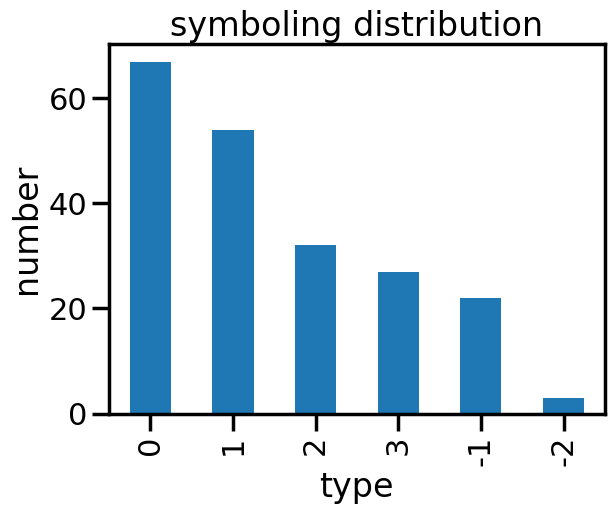

In [21]:
# 风险评估分布情况
print(pd.value_counts(ori_data['symboling'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['symboling']).plot(kind = 'bar')
plt.title("symboling distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show


gas       185
diesel     20
Name: fueltype, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

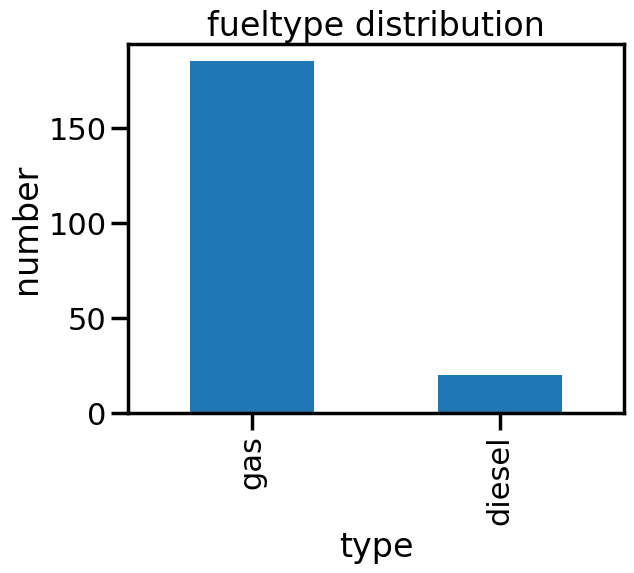

In [22]:
# 燃油类型分布情况
print(pd.value_counts(ori_data['fueltype'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['fueltype']).plot(kind = 'bar')
plt.title("fueltype distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

std      168
turbo     37
Name: aspiration, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

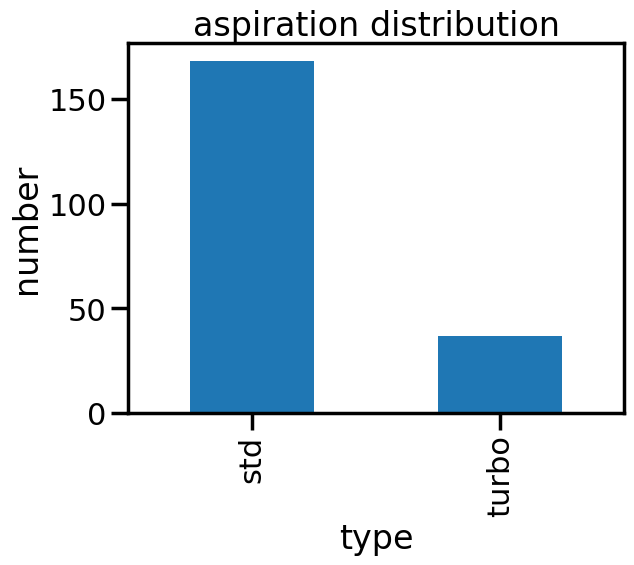

In [23]:
# 进气类型分布情况
print(pd.value_counts(ori_data['aspiration'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['aspiration']).plot(kind = 'bar')
plt.title("aspiration distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

four    115
two      90
Name: doornumber, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

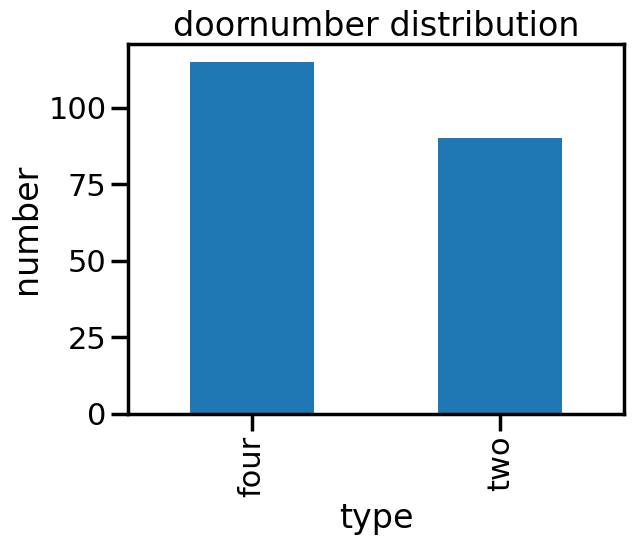

In [24]:
# 门数类型分布情况
print(pd.value_counts(ori_data['doornumber'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['doornumber']).plot(kind = 'bar')
plt.title("doornumber distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

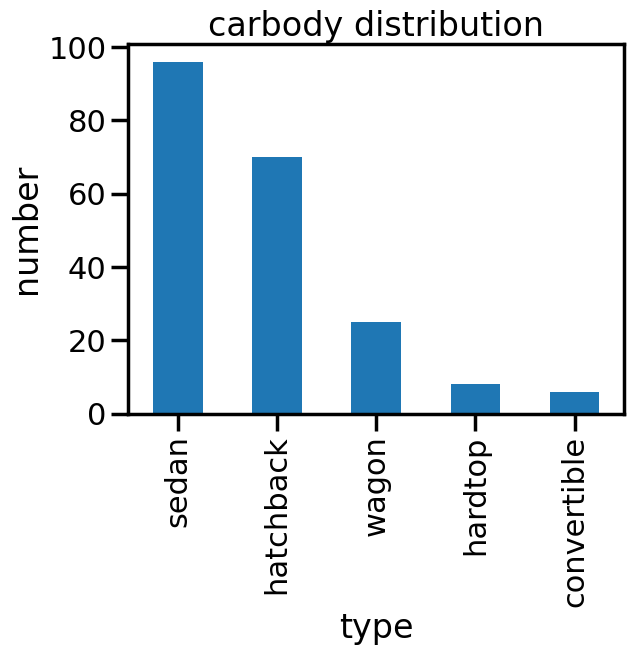

In [25]:
# 车型分布情况
print(pd.value_counts(ori_data['carbody'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['carbody']).plot(kind = 'bar')
plt.title("carbody distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

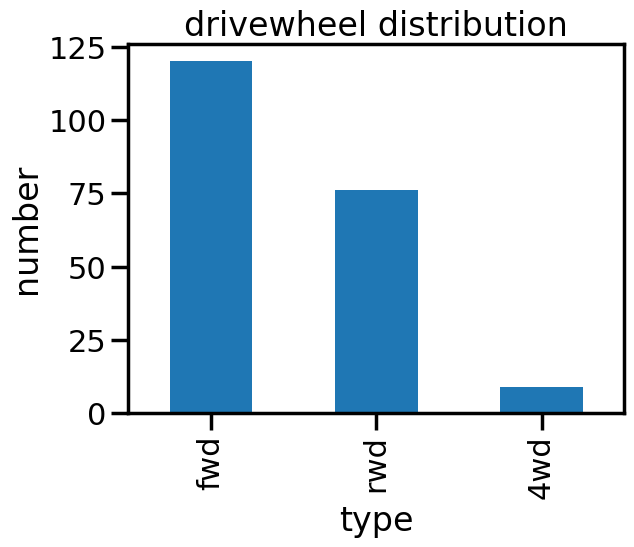

In [26]:
# 驱动车轮分布情况
print(pd.value_counts(ori_data['drivewheel'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['drivewheel']).plot(kind = 'bar')
plt.title("drivewheel distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

front    202
rear       3
Name: enginelocation, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

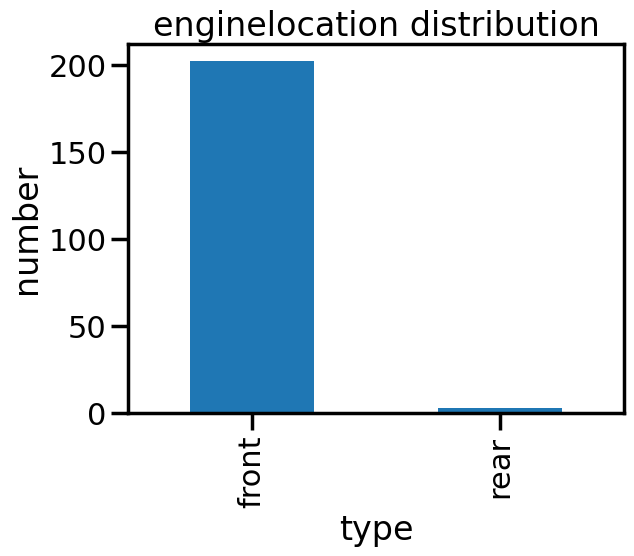

In [27]:
# 引擎位置分布情况
print(pd.value_counts(ori_data['enginelocation'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['enginelocation']).plot(kind = 'bar')
plt.title("enginelocation distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

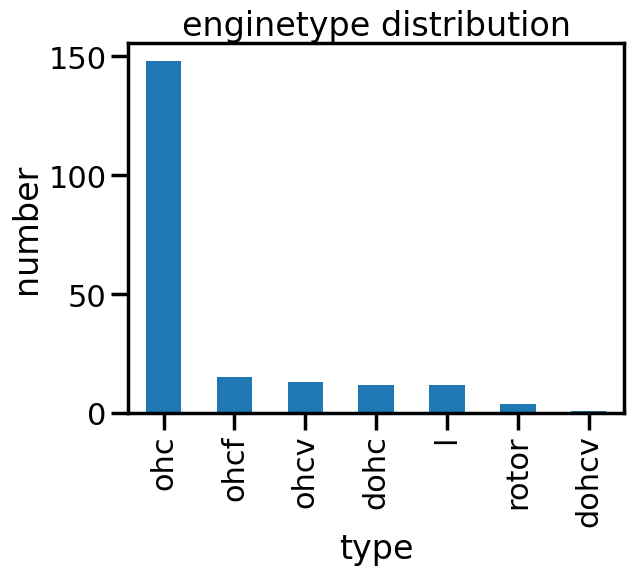

In [28]:
# 引擎类型分布情况
print(pd.value_counts(ori_data['enginetype'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['enginetype']).plot(kind = 'bar')
plt.title("enginetype distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

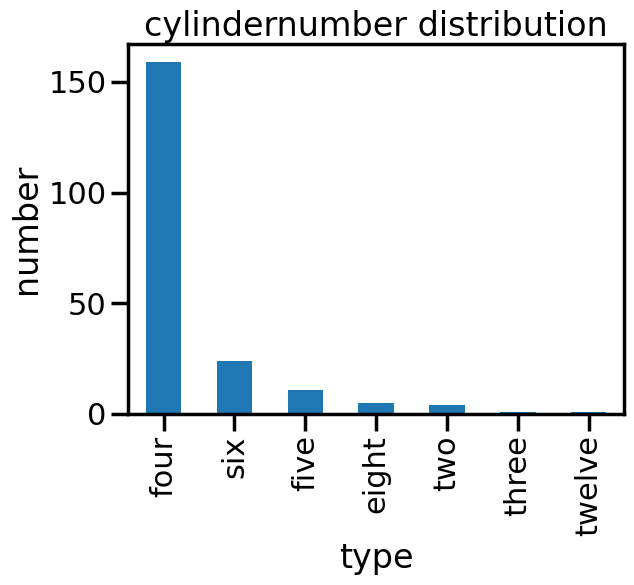

In [29]:
# 汽缸数分布情况
print(pd.value_counts(ori_data['cylindernumber'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['cylindernumber']).plot(kind = 'bar')
plt.title("cylindernumber distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

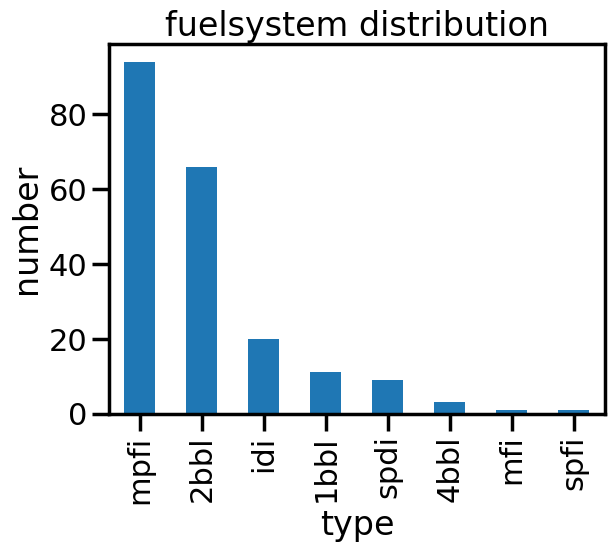

In [30]:
# 燃油系统分布情况
print(pd.value_counts(ori_data['fuelsystem'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['fuelsystem']).plot(kind = 'bar')
plt.title("fuelsystem distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

2.2 数值型变量分布及可视化

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


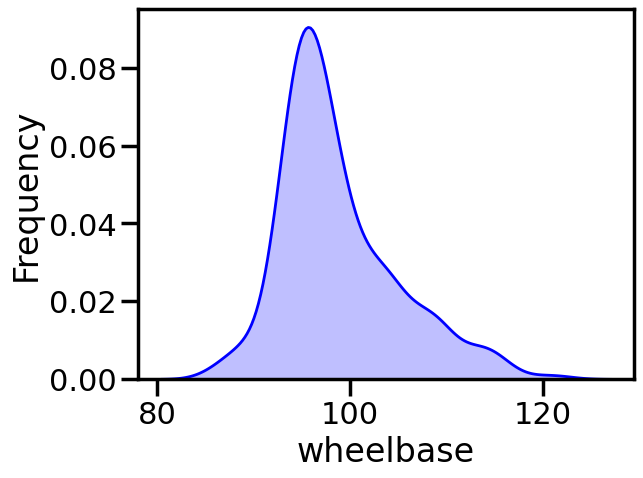

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


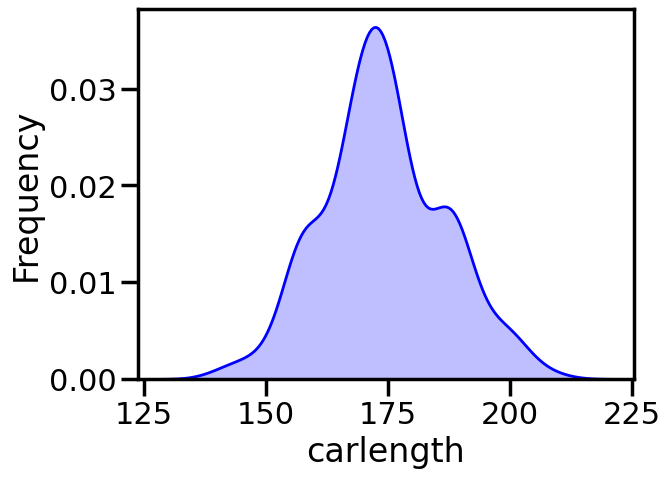

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


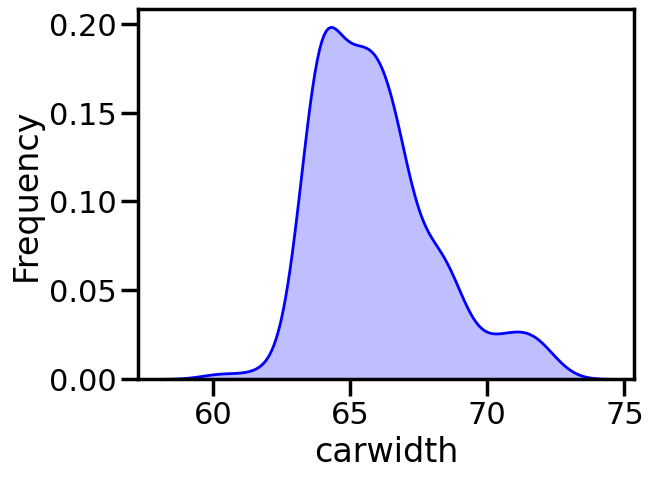

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


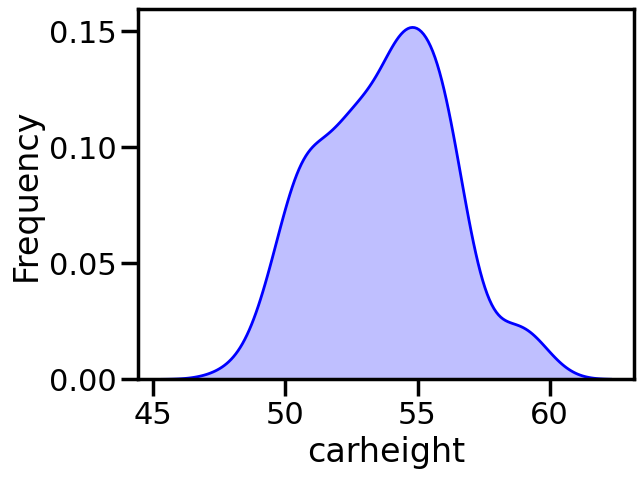

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


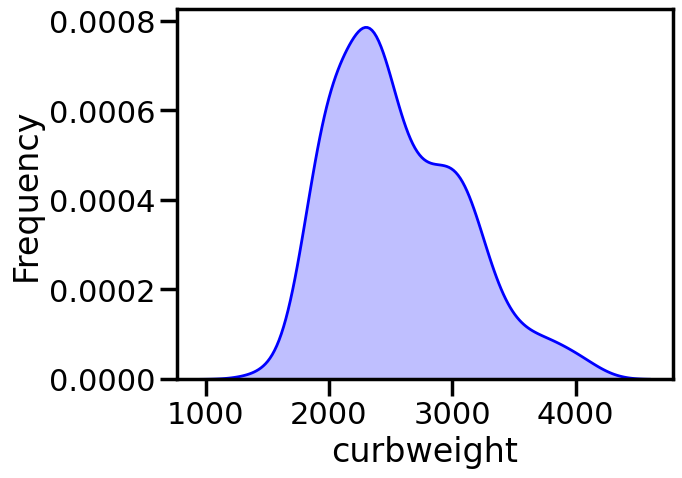

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


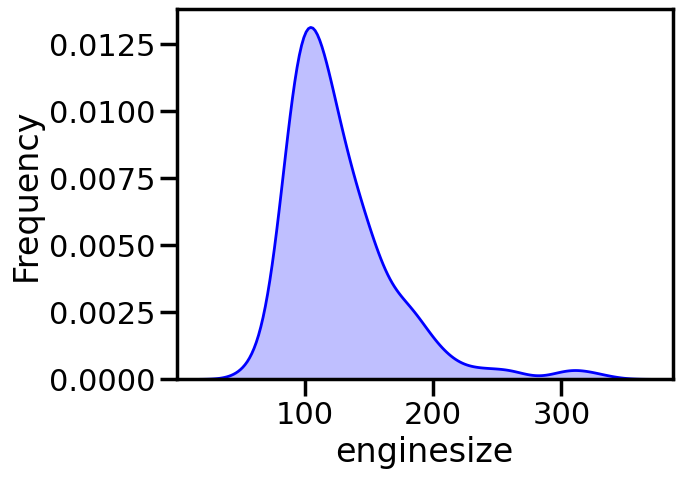

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


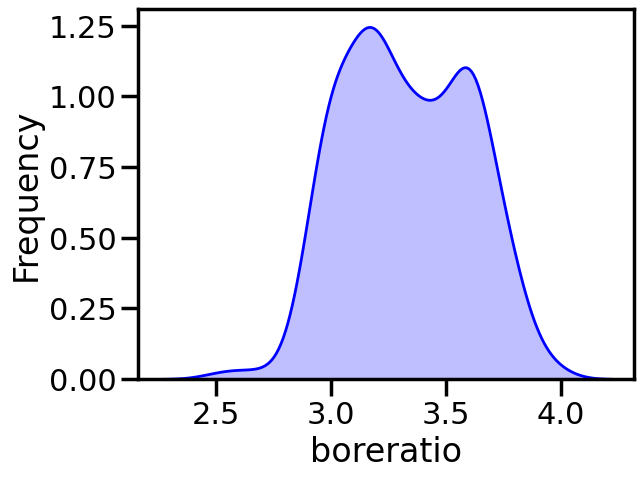

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


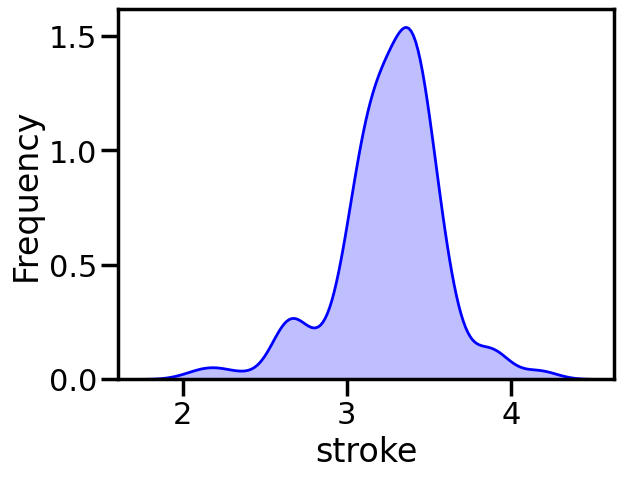

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


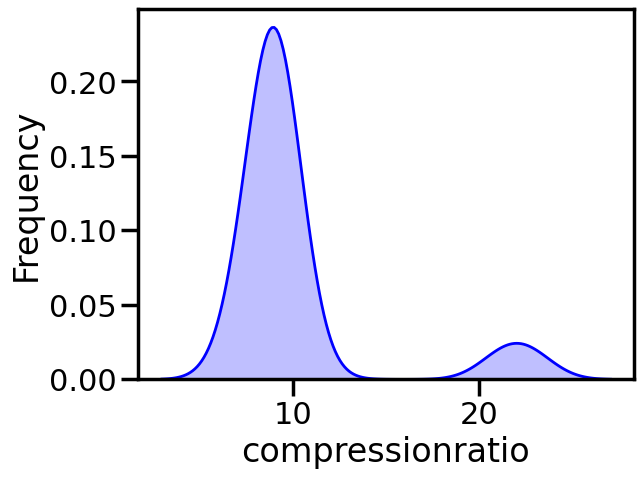

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


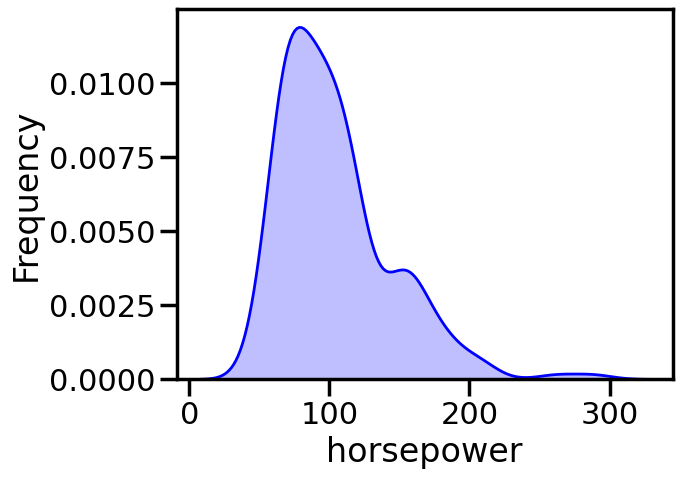

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


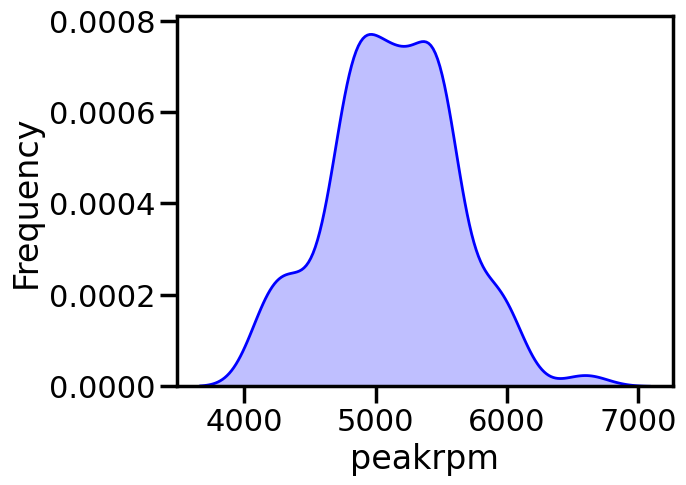

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


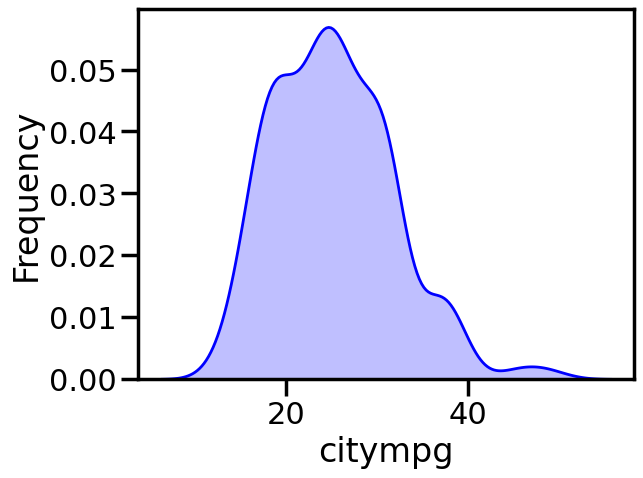

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


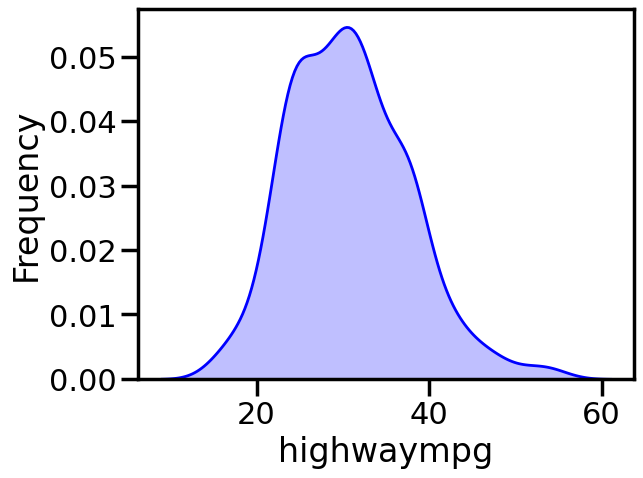

<ipython-input-31-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


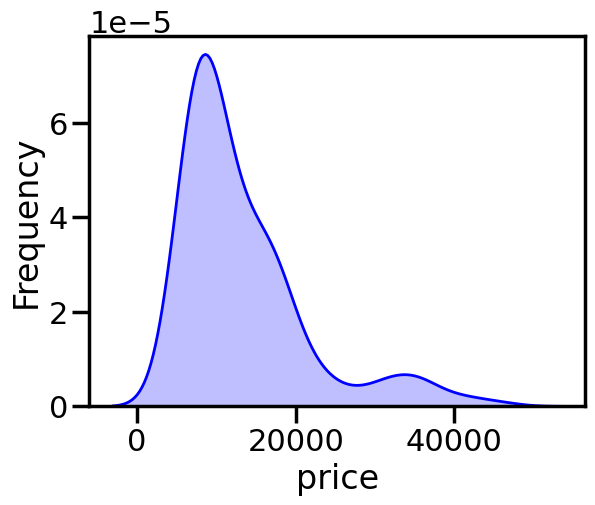

In [31]:
import seaborn as sns
ori_data_columns = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]
for column in ori_data_columns:
        g = sns.kdeplot(ori_data[column], color="Blue", shade = True)
        g.set_xlabel(column)
        g.set_ylabel("Frequency")
        plt.show()

3. 特征工程

3.1 根据车辆名称生成车辆品牌brand


In [32]:
# 对CarName列进行观察
ori_data['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [33]:
# 只取空格前面的品牌名称
ori_data['brand'] = [str(x).split()[0] for x in ori_data.loc[:, 'CarName']]

In [34]:
ori_data['brand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: brand, dtype: int64

In [35]:
# 对brand中的脏数据进行清洗
ori_data.loc[182, 'brand'] = 'toyota'
ori_data.loc[190, 'brand'] = 'volkswagen'
ori_data.loc[191, 'brand'] = 'volkswagen'
ori_data.loc[183, 'brand'] = 'volkswagen'
ori_data.loc[51, 'brand'] = 'mazda'
ori_data.loc[52, 'brand'] = 'mazda'
ori_data.loc[127, 'brand'] = 'porsche'
ori_data.loc[90, 'brand'] = 'nissan'

In [36]:
ori_data['brand'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: brand, dtype: int64

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: brand, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

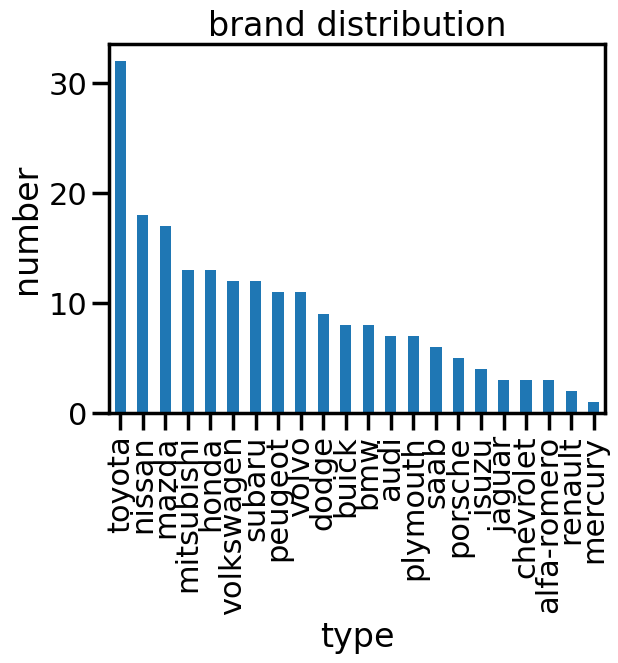

In [37]:
# 品牌分布情况
print(pd.value_counts(ori_data['brand'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['brand']).plot(kind = 'bar')
plt.title("brand distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

In [38]:
ori_data.to_csv('./car_price_data.csv')

In [39]:
import pandas as pd
data = pd.read_csv('car_price_data.csv')
data

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     fuelsystem  boreratio  stroke  compressionratio horsepower peakrpm  \
0          mpfi       3.47    2.68               9.0        111    5000   
1          mpfi       3.47    2.68               9.0        111    5000   
2          mpfi       2.68    3.47               9.0        154    5000   
3          mpfi       3.19    3.40              10.0        102    5500   
4          mpfi       3.19    3.40               8.0        115    5500   
..          ...        ...     ...               ...        ...     ...   
200        mpfi       3.78    3.15               9.5        114    5400   
201        mpfi       3.78    3.15               8.7        160    5300   
202        mpfi       3.58    2.87               8.8        134    5500   
203         idi       3.01    3.40              23.0        106    4800   
204        mpfi       3.78    3.15               9.5        114    5400   

     citympg highwaympg    price        brand  
0         21         27  13495.0  alfa-romero  
1         21         27  16500.0  alfa-romero  
2         19         26  16500.0  alfa-romero  
3         24         30  13950.0         audi  
4         18         22  17450.0         audi  
..       ...        ...      ...          ...  
200       23         28  16845.0        volvo  
201       19         25  19045.0        volvo  
202       18         23  21485.0        volvo  
203       26         27  22470.0        volvo  
204       19         25  22625.0        volvo  

[205 rows x 27 columns]

3.2 查看数值型变量间的相关性

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_num = data.drop(columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'car_ID', 'CarName', 'brand'])
data_num

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
1         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952         141   
201      109.1      188.8      68.8       55.5        3049         141   
202      109.1      188.8      68.9       55.5        3012         173   
203      109.1      188.8      68.9       55.5        3217         145   
204      109.1      188.8      68.9       55.5        3062         141   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68               9.0         111     5000       21   
1         3.47    2.68               9.0         111     5000       21   
2         2.68    3.47               9.0         154     5000       19   
3         3.19    3.40              10.0         102     5500       24   
4         3.19    3.40               8.0         115     5500       18   
..         ...     ...               ...         ...      ...      ...   
200       3.78    3.15               9.5         114     5400       23   
201       3.78    3.15               8.7         160     5300       19   
202       3.58    2.87               8.8         134     5500       18   
203       3.01    3.40              23.0         106     4800       26   
204       3.78    3.15               9.5         114     5400       19   

     highwaympg    price  
0            27  13495.0  
1            27  16500.0  
2            26  16500.0  
3            30  13950.0  
4            22  17450.0  
..          ...      ...  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[205 rows x 14 columns]

In [41]:
# 计算数值型变量间的相关性
corr = data_num.corr()

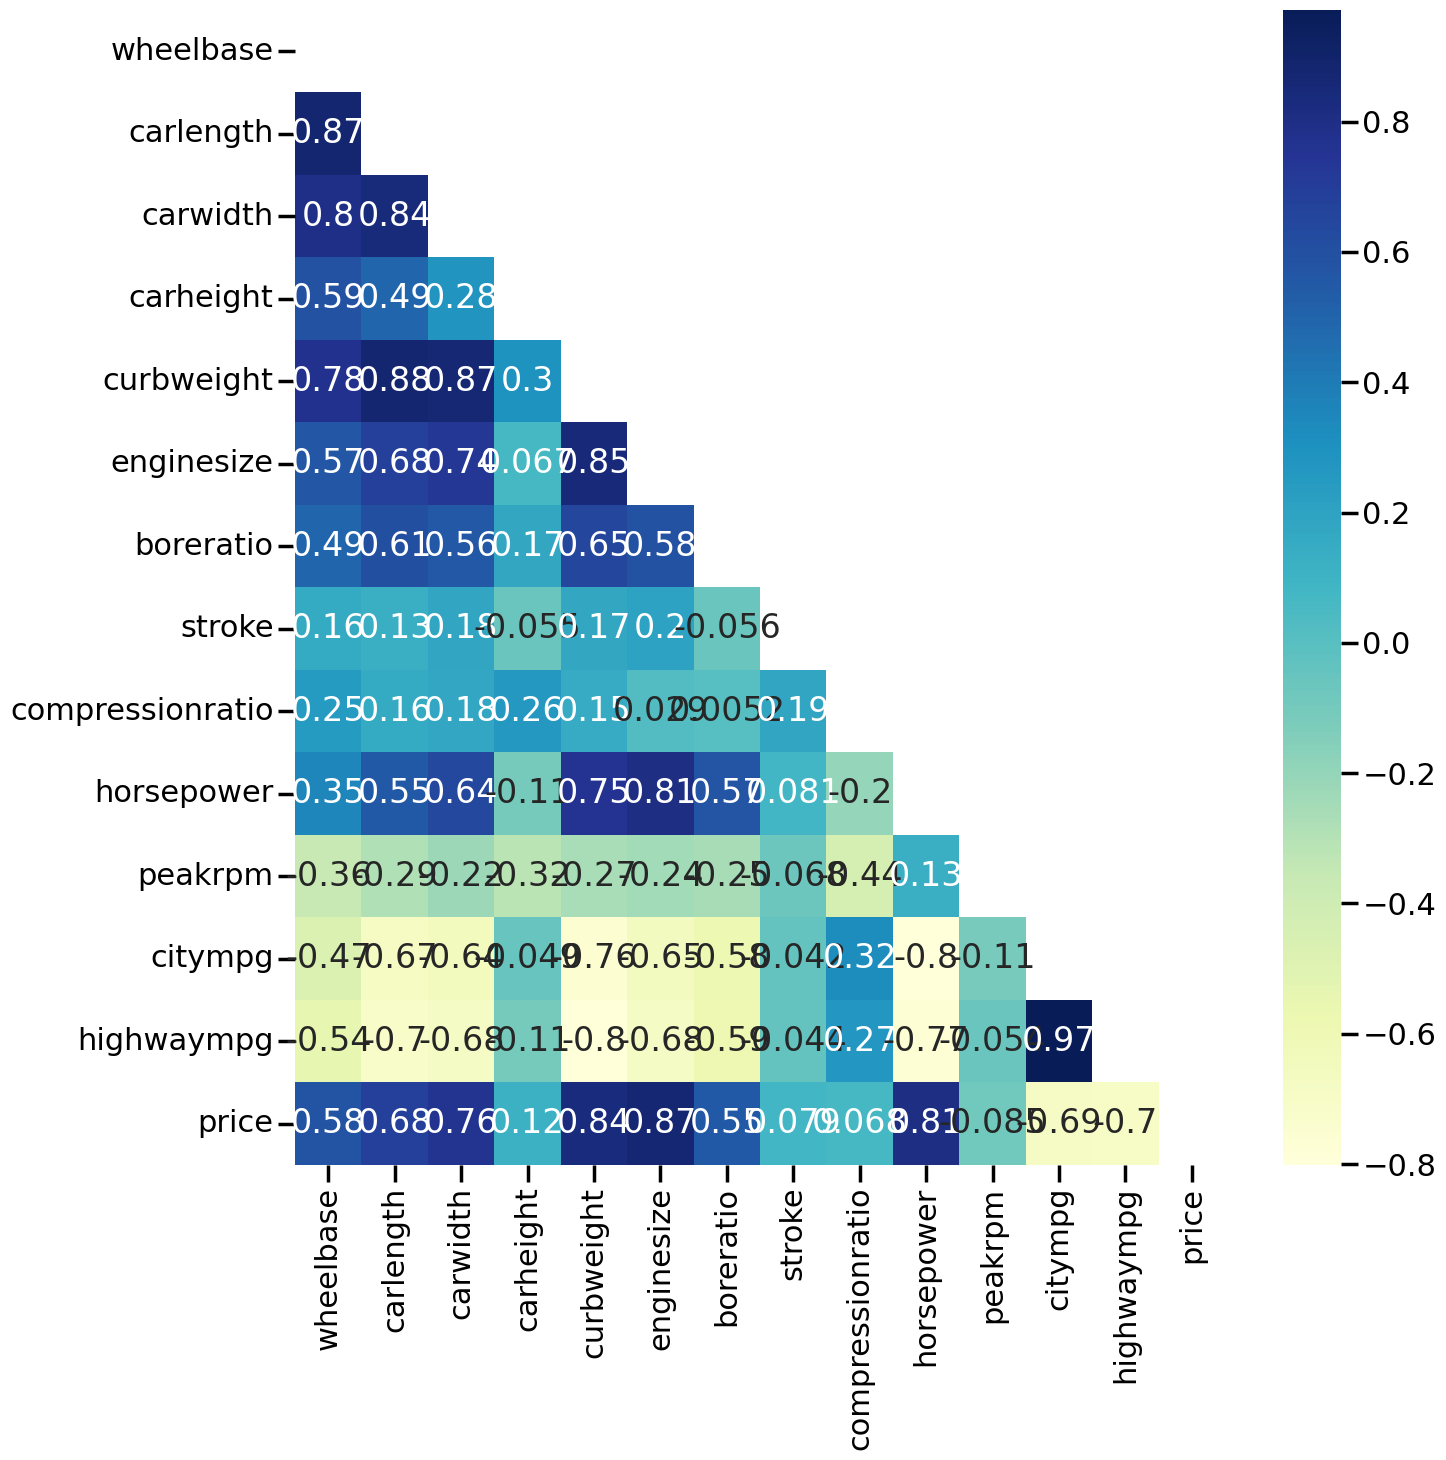

In [42]:
# 相关性可视化
plt.figure(figsize = (15,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True, mask=mask, cmap="YlGnBu")
plt.show()

1.多个数值型变量之间存在相关关系，如：城市mpg和高速mpg之间存在高度相关关系、引擎大小和马力之间存在高度相关关系等。

2.拟采用的二阶段聚类法要求数值型变量之间相互独立，因此需要对数值型变量进行进一步处理。

3.3 高相关性数值型变量的处理

1. highwaympg和citympg呈高度正相关。其实不管是高速mpg还是城市mpg，其本质都是mpg指标，而且通过观察数据，二者之间的差异较小（极值、均值），因此考虑将二者合并为一个指标'mpg'，计算方式为取二者均值：mpg=(highwaympg+citympg)/2

2. price变量与其余变量产生高相关性的频数最多，可能是因为车辆自身属性和配置的变动会直接影响着车辆的市场价格。此外，与其他变量相比，price属性属于车辆的市场销售属性（而非车辆自身属性），在聚类中更适合作为类别型变量，对车辆的价位进行划分，因此，考虑将price变量转换为类别型变量，按照其价格分布划分为low price、medium price、high price三类。

3. 对于其他车辆自身属性变量，考虑采用因子分析进行降维（主成分分析无法解释主成分的现实含义，不利于最终聚类结果的解读，因此选用因子分析），以使数值型变量之间相互独立。


In [43]:
# mpg特征生成
data['mpg'] = (data['highwaympg'] + data['citympg'])/2

In [44]:
data.drop(columns=['highwaympg', 'citympg'], inplace=True)

In [45]:
# price变量分组，转化为类别型变量
# 按照price变量的数据描述及分布，设置：10000以下为低价位车；10000-20000为中等价位车；20000以上为高价位车
data.to_csv('./car_price_data_process.csv')

In [46]:
import pandas as pd
data = pd.read_csv("./car_price_data_process.csv")
data.drop(columns='Unnamed: 0', inplace=True)
data.head(5)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
0        mpfi       3.47    2.68              9.0        111     5000   
1        mpfi       3.47    2.68              9.0        111     5000   
2        mpfi       2.68    3.47              9.0        154     5000   
3        mpfi       3.19    3.40             10.0        102     5500   
4        mpfi       3.19    3.40              8.0        115     5500   

     price        brand   mpg  
0  13495.0  alfa-romero  24.0  
1  16500.0  alfa-romero  24.0  
2  16500.0  alfa-romero  22.5  
3  13950.0         audi  27.0  
4  17450.0         audi  20.0  

[5 rows x 26 columns]

In [47]:
data['price_range'] = pd.cut(data['price'], [0, 10000, 20000, 50000], labels=['low_price', 'medium_price', 'high_price'])

In [48]:
data.drop(columns=['price'], inplace=True)
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
0        mpfi       3.47    2.68              9.0        111     5000   
1        mpfi       3.47    2.68              9.0        111     5000   
2        mpfi       2.68    3.47              9.0        154     5000   
3        mpfi       3.19    3.40             10.0        102     5500   
4        mpfi       3.19    3.40              8.0        115     5500   

         brand   mpg   price_range  
0  alfa-romero  24.0  medium_price  
1  alfa-romero  24.0  medium_price  
2  alfa-romero  22.5  medium_price  
3         audi  27.0  medium_price  
4         audi  20.0  medium_price  

[5 rows x 26 columns]

In [49]:
data.to_csv('./car_price_data_process.csv', index=False)

3.4 数值型变量因子分析（SPSS实现）

In [50]:
import pandas as pd
data = pd.read_csv('./car_price_data_process.csv')
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
0        mpfi       3.47    2.68              9.0        111     5000   
1        mpfi       3.47    2.68              9.0        111     5000   
2        mpfi       2.68    3.47              9.0        154     5000   
3        mpfi       3.19    3.40             10.0        102     5500   
4        mpfi       3.19    3.40              8.0        115     5500   

         brand   mpg   price_range  
0  alfa-romero  24.0  medium_price  
1  alfa-romero  24.0  medium_price  
2  alfa-romero  22.5  medium_price  
3         audi  27.0  medium_price  
4         audi  20.0  medium_price  

[5 rows x 26 columns]

结合之前所做的变量相关性分析与初步因子分析结果，stroke变量与其余变量相关性较低，因子分析对该变量的解释性较差，因此考虑删除该变量。

In [51]:
data.drop(columns=['stroke'], inplace=True)

In [52]:
data.to_csv('./car_price_data_process.csv', index=False)

利用SPSS对11个数值型变量进行因子分析，最终得到两个因子：
1. 第一个因子包括：车长、车宽、车净重、引擎尺寸、车轴距、mpg、马力、车内径比，简单将该因子归纳为车辆截面与马力因子
2. 第二个因子包括：车高、峰值转速、车压缩比，简单将该因子归纳为车辆垂面与转速因子



Python因子分析 模拟 SPSS因子分析

In [53]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3.4.1 数据预处理

In [54]:
# 删除无关列
data_num = data.drop(columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'car_ID', 'CarName', 'brand', 'price_range'])
data_num

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
1         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952         141   
201      109.1      188.8      68.8       55.5        3049         141   
202      109.1      188.8      68.9       55.5        3012         173   
203      109.1      188.8      68.9       55.5        3217         145   
204      109.1      188.8      68.9       55.5        3062         141   

     boreratio  compressionratio  horsepower  peakrpm   mpg  
0         3.47               9.0         111     5000  24.0  
1         3.47               9.0         111     5000  24.0  
2         2.68               9.0         154     5000  22.5  
3         3.19              10.0         102     5500  27.0  
4         3.19               8.0         115     5500  20.0  
..         ...               ...         ...      ...   ...  
200       3.78               9.5         114     5400  25.5  
201       3.78               8.7         160     5300  22.0  
202       3.58               8.8         134     5500  20.5  
203       3.01              23.0         106     4800  26.5  
204       3.78               9.5         114     5400  22.0  

[205 rows x 11 columns]

In [55]:
# 查看是否有缺失值
data_num.isnull().sum()


wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
compressionratio    0
horsepower          0
peakrpm             0
mpg                 0
dtype: int64

In [56]:
# 删除缺失值
data_num.dropna(inplace=True)
data_num.shape

(205, 11)

3.4.2 充分性检验

In [57]:
# 导入所需库
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


In [58]:
# 因子分析可靠性检验

kmo_all, kmo_model = calculate_kmo(data_num)
chi_square_value, p_value = calculate_bartlett_sphericity(data_num)
 
print("kmo_all:", kmo_all, end="\n\n")
print("kmo_model:", kmo_model, end="\n\n")
print("chi_square_value:", chi_square_value, end="\n\n")
print("p_value:", p_value)

kmo_all: [0.86359805 0.92053466 0.9291377  0.77825761 0.85871276 0.84523099
 0.93308077 0.48684476 0.79968043 0.61591586 0.82268846]

kmo_model: 0.8465802309129695

chi_square_value: 2303.4168619833313

p_value: 0.0


* KMO检验表明KMO统计量值为0.85，表明数据适合进行因子分析。
* 同时巴特莱特球形检验p值为0，拒绝原假设（相关系数矩阵为单位矩阵），变量之间存在相关关系，适合做因子分析。



3.4.3 提取公因子

进行探索性因子分析，确定提取公因子个数。计算相关系数矩阵特征根和特征向量。



In [59]:
# 探索性因子分析
fa = FactorAnalyzer(25, rotation=None)
fa.fit(data_num)
 
# 相关系数矩阵的特征根和特征向量
ev, v = fa.get_eigenvalues()
ev, v
 
# 根据特征根>1发现，可提取2个公因子
# 5.98606435, 2.12172533

(array([5.98606435, 2.12172533, 0.92991709, 0.65557281, 0.44406903,
        0.30651496, 0.20898023, 0.13380667, 0.08750202, 0.07732623,
        0.04852128]),
 array([ 5.91154654e+00,  1.88261964e+00,  6.80828178e-01,  3.44700128e-01,
         1.74161692e-01,  1.34744013e-01,  9.92348500e-02,  4.89143501e-02,
         1.48063229e-02,  2.98731765e-03, -6.37132276e-06]))

绘制碎石图进一步确定因子个数

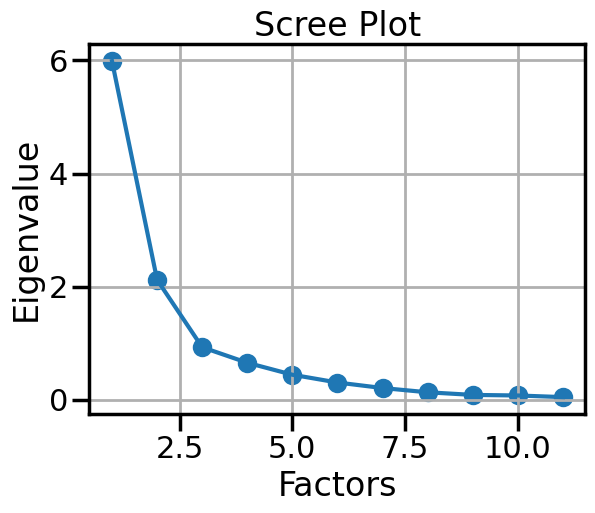

In [60]:
# 绘制碎石图，选择因子数
plt.scatter(range(1,data_num.shape[1]+1),ev)
plt.plot(range(1,data_num.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

3.4.4 因子旋转

建立明确的因子分析模型，并对因子进行方差最大化的正交旋转。

In [61]:
# 建立因子分析模型
fa_six = FactorAnalyzer(6, rotation="varimax")
fa_six.fit(data_num)
 
# 输出因子的载荷
fa_six.loadings_
 
# pd.DataFrame(fa_six.loadings_, index=data_num.columns)


array([[ 0.4272697 ,  0.72818592,  0.40404767,  0.17560841,  0.12381297,
         0.01914224],
       [ 0.63844943,  0.59868656,  0.3409904 ,  0.12509087,  0.07749046,
        -0.11483556],
       [ 0.6821179 ,  0.57554366,  0.12798156,  0.06432519,  0.14396138,
         0.02908081],
       [ 0.00725587,  0.22335929,  0.95661481,  0.13647651,  0.10631451,
        -0.00975776],
       [ 0.83942918,  0.43433313,  0.16876428,  0.12181978,  0.11979096,
        -0.02162576],
       [ 0.86368374,  0.2309448 , -0.01403709,  0.17056838,  0.02890952,
         0.25135519],
       [ 0.63732995,  0.19262281,  0.1044666 ,  0.19447481, -0.02465856,
        -0.14933704],
       [-0.0686017 ,  0.10775821,  0.11206661,  0.20900147,  0.96068523,
         0.00818368],
       [ 0.942896  ,  0.03984713, -0.09659294, -0.15870079, -0.10389879,
         0.06361094],
       [-0.05764679, -0.11356521, -0.14683186, -0.95339796, -0.22078946,
        -0.00710399],
       [-0.80620219, -0.28278347, -0.05365149,  0.

In [62]:
pd.DataFrame(fa_six.loadings_, index=data_num.columns)

0         1         2         3         4         5
wheelbase         0.427270  0.728186  0.404048  0.175608  0.123813  0.019142
carlength         0.638449  0.598687  0.340990  0.125091  0.077490 -0.114836
carwidth          0.682118  0.575544  0.127982  0.064325  0.143961  0.029081
carheight         0.007256  0.223359  0.956615  0.136477  0.106315 -0.009758
curbweight        0.839429  0.434333  0.168764  0.121820  0.119791 -0.021626
enginesize        0.863684  0.230945 -0.014037  0.170568  0.028910  0.251355
boreratio         0.637330  0.192623  0.104467  0.194475 -0.024659 -0.149337
compressionratio -0.068602  0.107758  0.112067  0.209001  0.960685  0.008184
horsepower        0.942896  0.039847 -0.096593 -0.158701 -0.103899  0.063611
peakrpm          -0.057647 -0.113565 -0.146832 -0.953398 -0.220789 -0.007104
mpg              -0.806202 -0.282783 -0.053651  0.116221  0.259936  0.246469

结果看起来并不直观，无法看出哪些因子对变量的解释程度较高，对数据进行可视化展示结果。

Text(118.91666666666666, 0.5, 'Items')

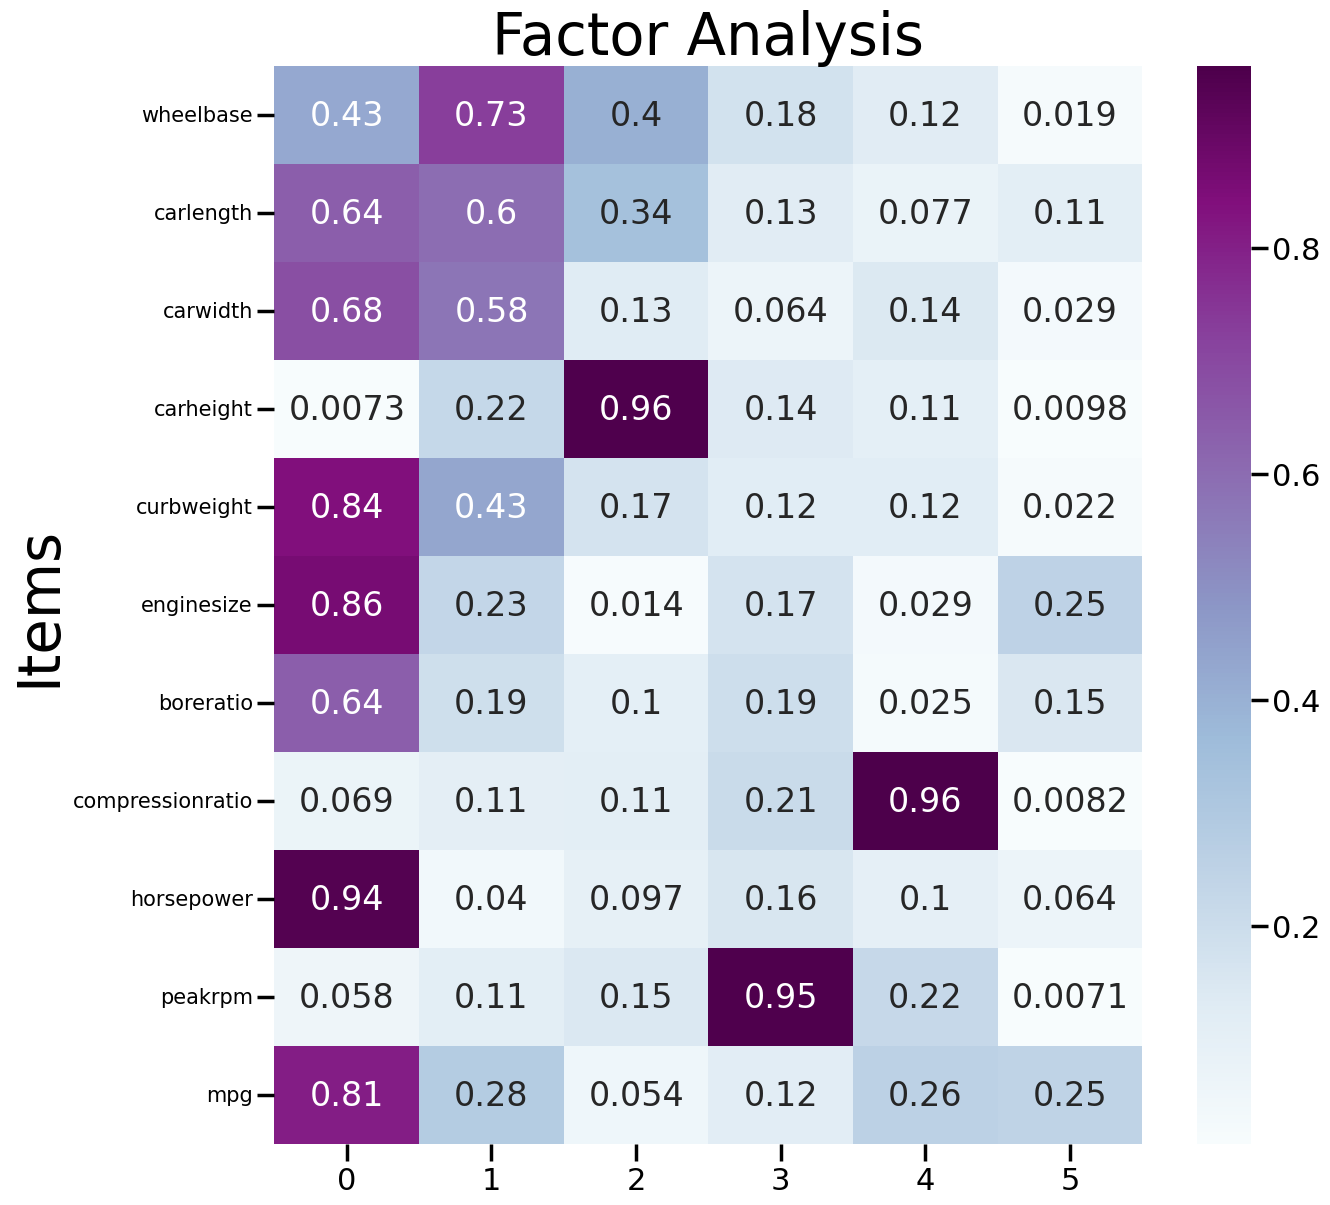

In [63]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa_six.loadings_), index=data_num.columns)
 
plt.figure(figsize = (14,14))
ax = sns.heatmap(df_cm, annot=True, cmap="BuPu")
 
# 设置y轴的字体的大小
ax.yaxis.set_tick_params(labelsize=15)
 
plt.title('Factor Analysis', fontsize='xx-large')
# 设置y轴标签
plt.ylabel('Items', fontsize='xx-large')
 
# 保存图片
# plt.savefig(r'FactorAnalysis.png', dpi=500)


由上图可以得知：
* 因子5对所有变量都没有高负荷，也不容易解释，需要调整因子
* 因子4、3仅对一个变量有高负荷，其他没有，需要调整
* 因子2仅对一个变量有高负荷，其他较弱，可以调整

因此选择2个公因子，重复上面的步骤：

Text(118.91666666666666, 0.5, 'Items')

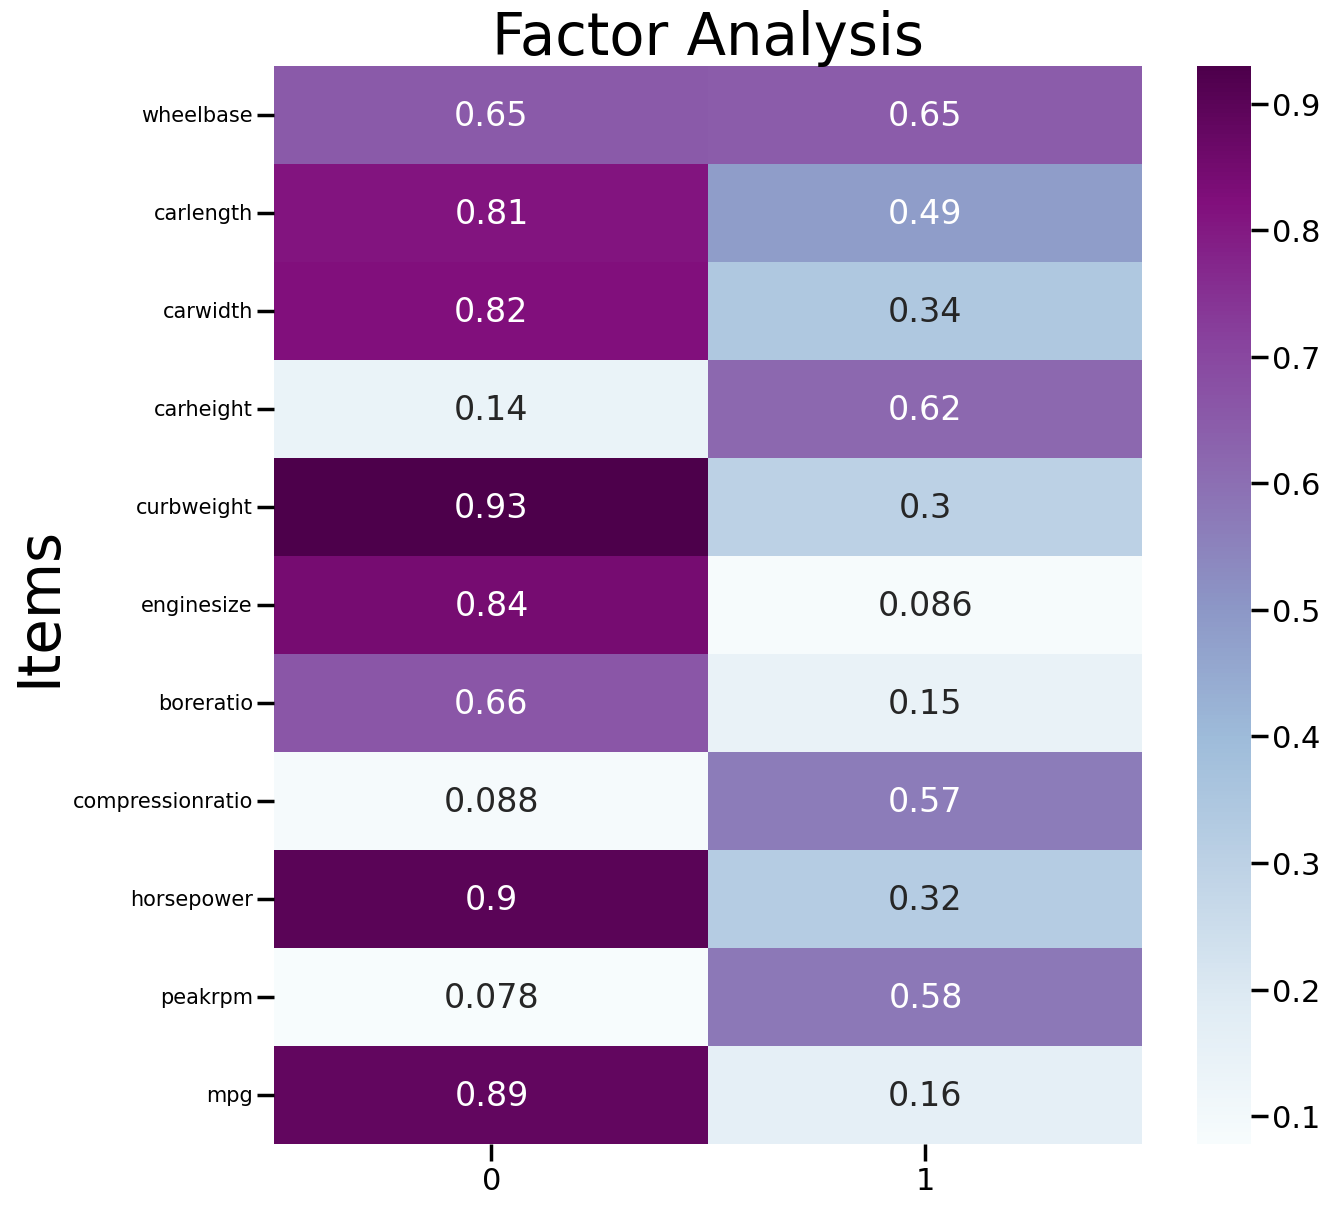

In [64]:
# 建立因子分析模型，设置公因子个数为2
fa_two = FactorAnalyzer(2, rotation="varimax")
fa_two.fit(data_num)
 
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa_two.loadings_), index=data_num.columns)
 
plt.figure(figsize = (14,14))
ax = sns.heatmap(df_cm, annot=True, cmap="BuPu")
 
# 设置y轴的字体的大小
ax.yaxis.set_tick_params(labelsize=15)
 
plt.title('Factor Analysis', fontsize='xx-large')
# 设置y轴标签
plt.ylabel('Items', fontsize='xx-large')


根据上图结果：

因子1在变量（carlength, carwidth, curbweight, enginesize, wheelbase, mpg, horsepower, boreratio）上具有较高载荷，可定义因子1为车辆截面与马力因子。

因子2在变量（carheight, peakrpm, compressionratio）上具有较高载荷，可定义因子2为车辆垂面与转速因子。

第一个因子包括：车长、车宽、车净重、引擎尺寸、车轴距、mpg、马力、车内径比，简单将该因子归纳为车辆截面与马力因子。

第二个因子包括：车高、峰值转速、车压缩比，简单将该因子归纳为车辆垂面与转速因子。


In [65]:
# 方差累计贡献
fa_v = fa_two.get_factor_variance()
fa_dt = pd.DataFrame({
    "特征根": fa_v[0],
    "方差贡献率": fa_v[1],
    "方差累计贡献率": fa_v[2]
})
 
fa_dt

特征根     方差贡献率   方差累计贡献率
0  5.404453  0.491314  0.491314
1  2.062848  0.187532  0.678846

2个因子的特征值之和占特征值总和的67.88%，也可以说2个因子解释了全部变量的67.88%的信息。

3.4.5 计算因子得分

In [66]:
# 计算因子得分
score = fa_two.transform(data_num)
score

array([[ 0.04721229, -1.09205295],
       [ 0.04721229, -1.09205295],
       [ 0.82265607, -1.59535283],
       [-0.10734152, -0.28661963],
       [ 0.48551838, -0.47000907],
       [ 0.18930739, -0.60313238],
       [ 0.70703606,  0.61401075],
       [ 0.78201274,  0.76720914],
       [ 1.32237928,  0.01797273],
       [ 1.31734693, -1.11813693],
       [-0.08452483, -0.09543162],
       [-0.08452483, -0.09543162],
       [ 0.43091017, -0.21631958],
       [ 0.46839851, -0.13972038],
       [ 0.88588273,  0.55772057],
       [ 1.60223557, -0.55795336],
       [ 1.80480261, -0.21577715],
       [ 2.03743833,  0.24080838],
       [-2.24475164, -0.09200887],
       [-1.32205201, -0.03931041],
       [-1.26441373,  0.09240094],
       [-1.29331231, -0.14854912],
       [-1.20431096, -0.54310974],
       [-0.4623941 , -1.49932327],
       [-1.139437  , -0.41715463],
       [-1.12444166, -0.38651495],
       [-1.12444166, -0.38651495],
       [-0.41660511, -1.41236411],
       [-0.19580298,

In [67]:
# 计算综合得分
x = score @ (fa_v[1])
result = pd.DataFrame(x, columns=["综合得分"], index=data_num.index)
result.sort_values(by="综合得分", ascending=False, inplace=True)
result

综合得分
73  1.503682
48  1.427755
47  1.427755
71  1.263588
70  1.231471
..       ...
33 -0.772249
32 -0.785805
30 -0.910797
31 -0.976076
18 -1.120132

[205 rows x 1 columns]

In [68]:
# 将因子分析所得的两个因子加入原数据，删除原数据中参与因子分析的数值型数据，以完成二阶段聚类所要求的变量间相互独立的要求
import pandas as pd
data = pd.read_csv('./car_price_data_process.csv')
#data.head()



In [69]:
data['FAC1'] = score[:,0]
data['FAC2'] = score[:,1]
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   

   boreratio  compressionratio  horsepower peakrpm        brand   mpg  \
0       3.47               9.0         111    5000  alfa-romero  24.0   
1       3.47               9.0         111    5000  alfa-romero  24.0   
2       2.68               9.0         154    5000  alfa-romero  22.5   
3       3.19              10.0         102    5500         audi  27.0   
4       3.19               8.0         115    5500         audi  20.0   

    price_range      FAC1      FAC2  
0  medium_price  0.047212 -1.092053  
1  medium_price  0.047212 -1.092053  
2  medium_price  0.822656 -1.595353  
3  medium_price -0.107342 -0.286620  
4  medium_price  0.485518 -0.470009  

[5 rows x 27 columns]

In [70]:
data_new = data.drop(columns=["carlength", "carwidth", "curbweight", "enginesize", "wheelbase", "mpg", "horsepower", "boreratio", "carheight", "peakrpm", "compressionratio"])

In [71]:
data_new.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation enginetype cylindernumber fuelsystem  \
0  convertible        rwd          front       dohc           four       mpfi   
1  convertible        rwd          front       dohc           four       mpfi   
2    hatchback        rwd          front       ohcv            six       mpfi   
3        sedan        fwd          front        ohc           four       mpfi   
4        sedan        4wd          front        ohc           five       mpfi   

         brand   price_range      FAC1      FAC2  
0  alfa-romero  medium_price  0.047212 -1.092053  
1  alfa-romero  medium_price  0.047212 -1.092053  
2  alfa-romero  medium_price  0.822656 -1.595353  
3         audi  medium_price -0.107342 -0.286620  
4         audi  medium_price  0.485518 -0.470009

In [72]:
data_new = data_new.rename(columns = {'FAC1':'section_horsepower', "FAC2":'vertical_rpm'})
data_new.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation enginetype cylindernumber fuelsystem  \
0  convertible        rwd          front       dohc           four       mpfi   
1  convertible        rwd          front       dohc           four       mpfi   
2    hatchback        rwd          front       ohcv            six       mpfi   
3        sedan        fwd          front        ohc           four       mpfi   
4        sedan        4wd          front        ohc           five       mpfi   

         brand   price_range  section_horsepower  vertical_rpm  
0  alfa-romero  medium_price            0.047212     -1.092053  
1  alfa-romero  medium_price            0.047212     -1.092053  
2  alfa-romero  medium_price            0.822656     -1.595353  
3         audi  medium_price           -0.107342     -0.286620  
4         audi  medium_price            0.485518     -0.470009

In [73]:
# 再次检查两数值型变量的相关性
data_num = data_new[['section_horsepower', 'vertical_rpm']]

In [74]:
corr = data_num.corr()
corr

section_horsepower  vertical_rpm
section_horsepower            1.000000      0.018797
vertical_rpm                  0.018797      1.000000

In [75]:
# 由下表可以看到两个因子之间的相关性非常小，两个因子之间相互独立
data_new.to_csv('./car_price_data_processed.csv', index=False)

<ipython-input-76-88b895ef3112>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data_new[column], color="Blue", shade = True)


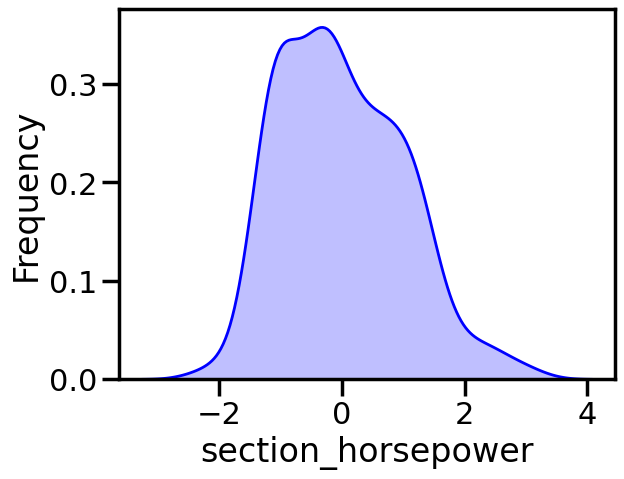

<ipython-input-76-88b895ef3112>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data_new[column], color="Blue", shade = True)


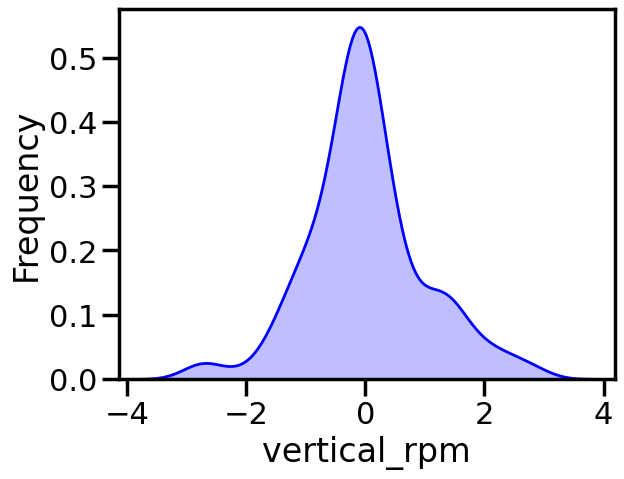

In [76]:
# 两个因子的分布情况
import seaborn as sns
ori_data_columns = ["section_horsepower", "vertical_rpm"]
for column in ori_data_columns:
        g = sns.kdeplot(data_new[column], color="Blue", shade = True)
        g.set_xlabel(column)
        g.set_ylabel("Frequency")
        plt.show()

4. 两阶段聚类（SPSS实现）

两阶段聚类适用于数据中即包含分类变量又包含数值型变量的情况。

两阶段聚类要求数值型变量间相互独立（之前的因子分析已经实现了两个因子间的相互独立）且服从正态分布。

利用SPSS对处理后的数据进行二阶段分类，最终将数据中的车辆分为两类，两种类别之间在驱动类型、燃油系统、车辆截面数据与马力、车辆价位四个特征上具有明显的区分。



TwoStep节点使用二阶聚类方法。第一步完成简单数据处理，以便将原始输入数据压缩为可管理的子聚类集合。第二步使用层级聚类方法将子聚类一步一步合并为更大的聚类。TwoStep 具有一个优点，就是能够为训练数据自动估计最佳聚类数。它可以高效处理混合的字段类型和大型的数据集。



K均值聚类、分层聚类、二阶聚类是SPSS聚类分析中常用的三种聚类方法。K均值聚类使用的是欧式距离的测量方法；分层聚类是根据度量的距离远近，构建谱系分析；二阶聚类是利用距离测量得到分类树，然后再利用BIC或AIC准则判别最佳聚类。


K均值聚类简单快速，但无法分析分类变量、容易受异常值影响；系统聚类，可对个案与变量聚类，可对连续与分类变量聚类，但依靠谱系图分析，当数据量大时，分析速度慢；二阶聚类，自动程度高，可同时分析分类与连续变量，但容易受到分类变量的影响。




k-means聚类算法是一种简单易行，时间复杂度低的聚类算法，特别是针对大规模的数据集，也是采取最多的聚类方法。但其只能处理数值属性限制了它的应用范围，如果处理其他类型的数据，则会造成一定的偏差。



k-modes算法是在数据挖掘中对分类属性型数据的采用的聚类算法。k-modes算法是对k-means算法的扩展。k-means算法是在数据挖掘领域中普遍应用的聚类算法，它只能处理数值型数据，而不能处理分类属性型数据。例如表示人的属性有：姓名、性别、年龄、家庭住址等属性。而k-modes算法就能够处理分类属性型数据。

k-modes算法采用差异度来代替k-means算法中的距离。k-modes算法中差异度越小，则表示距离越小。一个样本和一个聚类中心的差异度就是它们各个属性不相同的个数，不相同则记为一，最后计算一的总和。这个和就是某个样本到某个聚类中心的差异度。该样本属于差异度最小的聚类中心。



k-prototype算法是结合k-means与k-modes算法，针对混合属性的，解决2个核心问题如下：
1. 度量具有混合属性的方法是，数值属性采用k-means方法得到P1，分类属性采用k-modes方法P2，那么D=P1+a*P2，a是权重，如果觉得分类属性重要，则增加a，否则减少a，a=0时即只有数值属性；
2. 更新一个簇的中心的方法，方法是结合k-means与k-modes的更新方法。




In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_new_num = pd.read_csv('./car_price_data_processed.csv')
type_dims = ["symboling","CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","brand","price_range"]
for type_dim in type_dims:
  data_new_num[type_dim] = le.fit_transform(data_new_num[type_dim] )

data_new_num.to_csv('./car_price_data_processed_num.csv', index=False)

https://github.com/MaxHalford/prince

In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data_processed = pd.read_csv('./car_price_data_processed.csv')
#type_dims = ["symboling","CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","brand","price_range"]
type_dims = ["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","brand","price_range"]
data_processed[type_dims]

CarName fueltype aspiration doornumber      carbody  \
0          alfa-romero giulia      gas        std        two  convertible   
1         alfa-romero stelvio      gas        std        two  convertible   
2    alfa-romero Quadrifoglio      gas        std        two    hatchback   
3                 audi 100 ls      gas        std       four        sedan   
4                  audi 100ls      gas        std       four        sedan   
..                        ...      ...        ...        ...          ...   
200           volvo 145e (sw)      gas        std       four        sedan   
201               volvo 144ea      gas      turbo       four        sedan   
202               volvo 244dl      gas        std       four        sedan   
203                 volvo 246   diesel      turbo       four        sedan   
204               volvo 264gl      gas      turbo       four        sedan   

    drivewheel enginelocation enginetype cylindernumber fuelsystem  \
0          rwd          front       dohc           four       mpfi   
1          rwd          front       dohc           four       mpfi   
2          rwd          front       ohcv            six       mpfi   
3          fwd          front        ohc           four       mpfi   
4          4wd          front        ohc           five       mpfi   
..         ...            ...        ...            ...        ...   
200        rwd          front        ohc           four       mpfi   
201        rwd          front        ohc           four       mpfi   
202        rwd          front       ohcv            six       mpfi   
203        rwd          front        ohc            six        idi   
204        rwd          front        ohc           four       mpfi   

           brand   price_range  
0    alfa-romero  medium_price  
1    alfa-romero  medium_price  
2    alfa-romero  medium_price  
3           audi  medium_price  
4           audi  medium_price  
..           ...           ...  
200        volvo  medium_price  
201        volvo  medium_price  
202        volvo    high_price  
203        volvo    high_price  
204        volvo    high_price  

[205 rows x 12 columns]

5. 混合特征处理（Python实现）

对于连续型特征，上述方法可以

对于类别型特征，需要进行以下方式：
1. 采用可以兼容类别型特征的聚类方法
2. 将类别型特征进行one-hot编码（容易维度爆炸！）
3. 使用因子分析方法将类别型特征转化成连续型特征（CA、MCA、FAMD）

In [79]:
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import prince

mca = prince.MCA(
    n_components=100,
    n_iter=100,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(data_processed[type_dims])

In [81]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.425         2.58%                      2.58%
1              0.360         2.18%                      4.76%
2              0.335         2.03%                      6.79%
3              0.288         1.75%                      8.53%
4              0.276         1.67%                     10.21%
...              ...           ...                        ...
95             0.083         0.51%                     73.32%
96             0.083         0.51%                     73.83%
97             0.083         0.51%                     74.33%
98             0.083         0.51%                     74.84%
99             0.083         0.51%                     75.34%

[100 rows x 3 columns]

In [82]:
famd = prince.FAMD(
    n_components=105,
    n_iter=105,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)
famd = famd.fit(data_processed)

In [83]:
famd.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0             31.347         2.63%                      2.63%
1             26.772         2.25%                      4.88%
2             24.157         2.03%                      6.90%
3             20.815         1.75%                      8.65%
4             19.930         1.67%                     10.32%
...              ...           ...                        ...
100            6.000         0.50%                     75.91%
101            6.000         0.50%                     76.41%
102            6.000         0.50%                     76.92%
103            6.000         0.50%                     77.42%
104            6.000         0.50%                     77.92%

[105 rows x 3 columns]

In [84]:
famd.row_coordinates(data_processed).head()

component       0         1         2         3          4          5    \
0          5.957373 -6.911121  1.705120 -1.641857 -10.741923   9.254620   
1          5.957586 -6.910340  1.704471 -1.640327 -10.742551   9.255344   
2          7.026982 -7.311770  1.472999 -3.412826  -8.366095   4.145605   
3          0.068411  1.816494 -0.381637 -0.349991  -1.913435  -4.908935   
4          2.384977  3.426295 -1.360653  2.919664   0.964124 -10.557486   

component        6         7         8          9    ...       95        96   \
0          -6.483245 -4.682767  8.071040 -15.802150  ...  0.574822 -2.498127   
1          -6.483495 -4.682032  8.068743 -15.803339  ... -2.599157  5.650430   
2          -3.325807 -0.001067  7.825965  -5.898962  ...  2.024335 -3.152304   
3          -5.707775 -4.457903  1.943732  -1.851375  ...  0.982831  2.203794   
4         -11.366120 -7.123622  6.315095  -2.764427  ... -1.285724 -0.261960   

component       97        98        99        100       101       102  \
0          0.112315 -0.248961  0.773174  0.278283  5.295697  1.657994   
1          1.061704 -0.067788 -1.599708  2.452161 -5.600642 -2.025864   
2         -1.174019  0.316749  0.826534 -2.730444  0.304945  0.367870   
3          0.243492 -0.371872  1.601178 -1.583694 -0.767081  1.953493   
4          2.231516  3.993171 -1.129423 -2.729984 -0.107923  0.611512   

component       103       104  
0         -1.991966 -2.915296  
1         -1.296443  2.861113  
2          3.288409  0.054184  
3         -0.071136  2.625508  
4          1.975447  2.180517  

[5 rows x 105 columns]

6. 寻找最优聚类

In [85]:
data_processed_famd = famd.row_coordinates(data_processed)
from sklearn import preprocessing as pp
data_processed_famd_std = pp.minmax_scale(data_processed_famd)


In [86]:
from sklearn.cluster import KMeans
number_of_clusters = range(1,6,1)
kmeans = [KMeans(n_clusters=i,max_iter=20,init='k-means++') for i in number_of_clusters]
score = [kmeans[i].fit(data_processed_famd_std).inertia_ for i in range(len(kmeans))]
tmp =0
best_k = 0
value_all = 0
diff1 = []
for i in range(len(score)-1):
    scores = (score[i] - score[i+1])
    diff1.append(scores)
    
diff2=[]
for i in range(len(diff1)-1):
    difference = diff1[i] - diff1[i+1]
    diff2.append(difference)
diff2.insert(0, 0) 
diff3 = [i-j for i,j in zip(diff2,diff1)]

m = max(i for i in diff3)
best_k = number_of_clusters[diff3.index(m)]
print(best_k)

kmeans = KMeans(n_clusters=best_k,init='k-means++',max_iter=5).fit(data_processed_famd_std)
labels = kmeans.labels_
data_processed['labels'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


最佳分类方式：分成两类

7. 聚类结果解读

第一类：豪华款

类别特征

驱动：车辆的驱动主要为rwd（后轮驱动），后轮传递动力，车辆加速时中心向后偏移，实现更加平稳的驾驶；

燃油系统：车辆的燃油系统主要为mpfi（多点燃油系统）；

车长/宽/净重/马力：车长/宽/净重/马力数值均大于类2，可以理解为车辆舒适度及马力优于类2；

价格区间：价格集中在20000及以上的的中高价位




In [87]:
orig_data = pd.read_csv('./car_price_data.csv')
orig_data['labels'] = labels

In [88]:
orig_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  boreratio  stroke  \
0  convertible        rwd          front       88.6  ...       3.47    2.68   
1  convertible        rwd          front       88.6  ...       3.47    2.68   
2    hatchback        rwd          front       94.5  ...       2.68    3.47   
3        sedan        fwd          front       99.8  ...       3.19    3.40   
4        sedan        4wd          front       99.4  ...       3.19    3.40   

   compressionratio  horsepower peakrpm citympg  highwaympg    price  \
0               9.0         111    5000      21          27  13495.0   
1               9.0         111    5000      21          27  16500.0   
2               9.0         154    5000      19          26  16500.0   
3              10.0         102    5500      24          30  13950.0   
4               8.0         115    5500      18          22  17450.0   

         brand  labels  
0  alfa-romero       1  
1  alfa-romero       1  
2  alfa-romero       1  
3         audi       1  
4         audi       0  

[5 rows x 28 columns]

In [89]:
orig_data[orig_data['labels'] == 0].describe()

car_ID  symboling   wheelbase   carlength   carwidth  carheight  \
count   28.000000  28.000000   28.000000   28.000000  28.000000  28.000000   
mean    73.964286   0.535714  105.010714  187.942857  68.971429  54.225000   
std     54.920469   1.373887    8.550692   11.339555   2.335690   2.723101   
min      5.000000  -1.000000   89.500000  168.900000  64.800000  47.800000   
25%     17.750000   0.000000   99.475000  177.850000  67.650000  51.900000   
50%     70.500000   0.000000  106.250000  189.000000  69.250000  55.150000   
75%    110.500000   1.000000  110.500000  197.475000  70.675000  56.300000   
max    204.000000   3.000000  120.900000  208.100000  72.300000  58.700000   

       curbweight  enginesize  boreratio     stroke  compressionratio  \
count    28.00000   28.000000  28.000000  28.000000         28.000000   
mean   3356.00000  200.000000   3.543214   3.346429         11.896429   
std     422.44158   52.061218   0.222295   0.343168          5.757410   
min    2756.00000  131.000000   3.010000   2.760000          7.000000   
25%    3042.75000  164.000000   3.452500   3.107500          8.075000   
50%    3373.00000  188.500000   3.580000   3.390000          9.000000   
75%    3721.25000  215.250000   3.700000   3.520000         13.875000   
max    4066.00000  326.000000   3.940000   4.170000         23.000000   

       horsepower      peakrpm    citympg  highwaympg         price  labels  
count   28.000000    28.000000  28.000000   28.000000     28.000000    28.0  
mean   159.142857  4958.928571  18.428571   23.035714  28822.630964     0.0  
std     47.782466   593.647478   3.824178    4.032113   8647.474991     0.0  
min     95.000000  4150.000000  13.000000   16.000000  13200.000000     0.0  
25%    122.500000  4350.000000  16.000000   19.750000  21390.000000     0.0  
50%    157.500000  4775.000000  17.000000   25.000000  31080.250000     0.0  
75%    182.500000  5500.000000  21.250000   25.000000  35179.500000     0.0  
max    288.000000  5900.000000  28.000000   33.000000  45400.000000     0.0

In [90]:
data1 = orig_data[orig_data['labels'] == 0]
data1.head()

car_ID  symboling              CarName fueltype aspiration doornumber  \
4        5          2           audi 100ls      gas        std       four   
6        7          1           audi 100ls      gas        std       four   
9       10          0  audi 5000s (diesel)      gas      turbo        two   
13      14          0               bmw x3      gas        std       four   
14      15          1               bmw z4      gas        std       four   

      carbody drivewheel enginelocation  wheelbase  ...  boreratio  stroke  \
4       sedan        4wd          front       99.4  ...       3.19    3.40   
6       sedan        fwd          front      105.8  ...       3.19    3.40   
9   hatchback        4wd          front       99.5  ...       3.13    3.40   
13      sedan        rwd          front      101.2  ...       3.31    3.19   
14      sedan        rwd          front      103.5  ...       3.31    3.19   

    compressionratio  horsepower peakrpm citympg  highwaympg      price  \
4                8.0         115    5500      18          22  17450.000   
6                8.5         110    5500      19          25  17710.000   
9                7.0         160    5500      16          22  17859.167   
13               9.0         121    4250      21          28  21105.000   
14               9.0         121    4250      20          25  24565.000   

    brand  labels  
4    audi       0  
6    audi       0  
9    audi       0  
13    bmw       0  
14    bmw       0  

[5 rows x 28 columns]

品牌分布

buick      8
bmw        5
porsche    4
audi       3
jaguar     3
peugeot    2
volvo      2
nissan     1
Name: brand, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

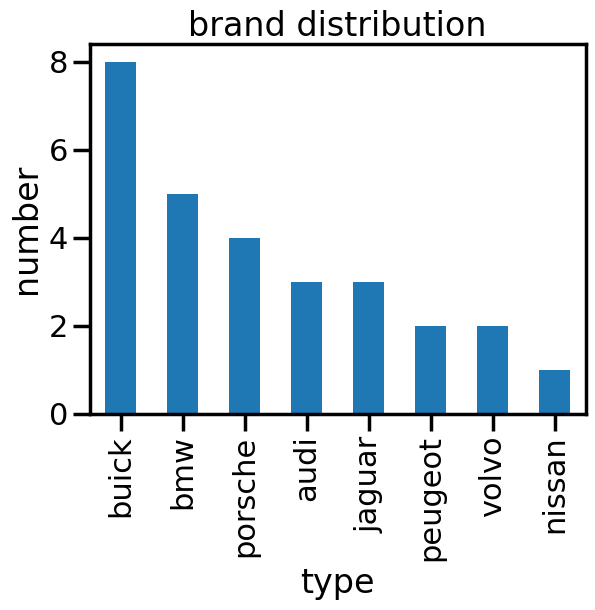

In [91]:
print(pd.value_counts(data1['brand'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(data1['brand']).plot(kind = 'bar')
plt.title("brand distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

根据品牌分布可知，豪华款类别中主要包括的品牌有：标致、沃尔沃、别克、宝马、保时捷、阿尔法等，高端车（宝马、保时捷）品牌和跑车品牌（阿尔法）居多。



In [92]:
data2 = orig_data[orig_data['labels'] == 1]
data2.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  boreratio  stroke  \
0  convertible        rwd          front       88.6  ...       3.47    2.68   
1  convertible        rwd          front       88.6  ...       3.47    2.68   
2    hatchback        rwd          front       94.5  ...       2.68    3.47   
3        sedan        fwd          front       99.8  ...       3.19    3.40   
5        sedan        fwd          front       99.8  ...       3.19    3.40   

   compressionratio  horsepower peakrpm citympg  highwaympg    price  \
0               9.0         111    5000      21          27  13495.0   
1               9.0         111    5000      21          27  16500.0   
2               9.0         154    5000      19          26  16500.0   
3              10.0         102    5500      24          30  13950.0   
5               8.5         110    5500      19          25  15250.0   

         brand  labels  
0  alfa-romero       1  
1  alfa-romero       1  
2  alfa-romero       1  
3         audi       1  
5         audi       1  

[5 rows x 28 columns]

第二类：经济款

类别特征

驱动：车辆的驱动主要为fwd（前轮驱动），前轮传递动力，经济型车辆大多数为fwd；

燃油系统：车辆的燃油系统主要为2bbl（双腔燃油系统）；

车长/宽/净重/马力：车长/宽/净重/马力数值均小于类2，可以理解为车辆舒适度及马力次于类2；

价格区间：价格集中在10000以下及10000-20000的中低价位


品牌分布

In [93]:
orig_data[orig_data['labels'] == 1].describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000   
mean   107.593220    0.881356   97.767232  171.851412   65.423164   53.645763   
std     58.830009    1.221280    4.858726   11.005903    1.663640    2.395212   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   48.800000   
25%     56.000000    0.000000   94.500000  165.700000   64.000000   52.000000   
50%    110.000000    1.000000   96.500000  172.000000   65.400000   53.900000   
75%    159.000000    2.000000   99.800000  177.800000   66.500000   55.500000   
max    205.000000    3.000000  114.200000  198.900000   71.400000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   177.000000  177.000000  177.000000  177.000000        177.000000   
mean   2428.943503  115.344633    3.295989    3.241017          9.865085   
std     410.863389   24.694034    0.262774    0.307240          3.554592   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2109.000000   97.000000    3.050000    3.110000          8.700000   
50%    2380.000000  110.000000    3.270000    3.270000          9.000000   
75%    2710.000000  130.000000    3.500000    3.410000          9.400000   
max    3430.000000  181.000000    3.940000    3.900000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  labels  
count  177.000000   177.000000  177.000000  177.000000    177.000000   177.0  
mean    95.412429  5151.412429   26.293785   31.971751  10817.468927     1.0  
std     30.072535   452.280502    6.234400    6.442428   4239.438938     0.0  
min     48.000000  4150.000000   16.000000   20.000000   5118.000000     1.0  
25%     70.000000  4800.000000   21.000000   28.000000   7603.000000     1.0  
50%     90.000000  5200.000000   26.000000   32.000000   9298.000000     1.0  
75%    111.000000  5500.000000   31.000000   37.000000  13499.000000     1.0  
max    200.000000  6600.000000   49.000000   54.000000  23875.000000     1.0

toyota         32
nissan         17
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot         9
volvo           9
dodge           9
plymouth        7
saab            6
audi            4
isuzu           4
chevrolet       3
bmw             3
alfa-romero     3
renault         2
mercury         1
porsche         1
Name: brand, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

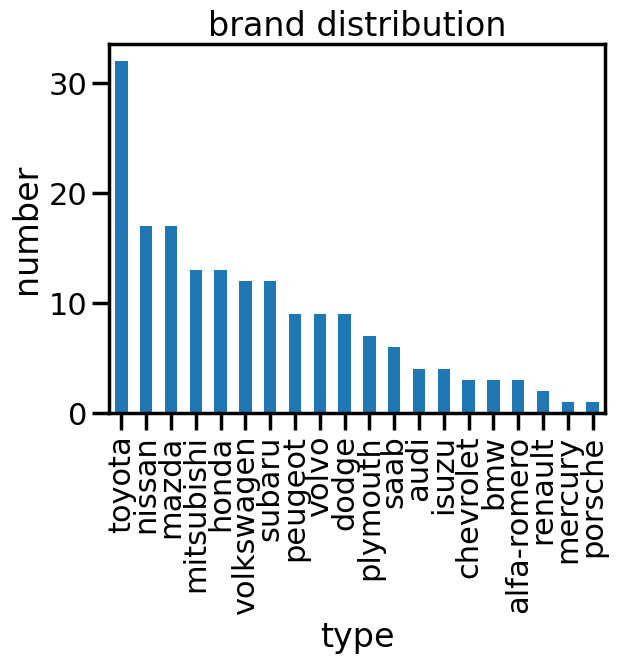

In [94]:
print(pd.value_counts(data2['brand'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(data2['brand']).plot(kind = 'bar')
plt.title("brand distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

根据品牌分布可知，经济款类别中主要包括的品牌有：丰田、本田、斯巴鲁、尼桑、马自达、道奇等。

In [95]:
famd.column_coordinates_

component                0         1         2         3         4    \
variable                                                               
car_ID              0.003241  0.034424  0.020141  0.086386  0.013468   
symboling           0.015799  0.226308  0.039726  0.004482  0.029184   
section_horsepower  0.697713  0.003714  0.000939  0.002690  0.016032   
vertical_rpm        0.027243  0.613817  0.000246  0.000042  0.001780   
CarName             0.969219  0.917199  0.803165  0.970334  0.956118   
aspiration          0.039591  0.211277  0.008571  0.005014  0.079829   
brand               0.827320  0.648100  0.530305  0.855161  0.759354   
carbody             0.221089  0.326137  0.077033  0.127136  0.149718   
cylindernumber      0.569521  0.301610  0.743818  0.097791  0.316472   
doornumber          0.007978  0.302262  0.023015  0.044800  0.044400   
drivewheel          0.603032  0.004480  0.085365  0.273225  0.025159   
enginelocation      0.099064  0.153488  0.044794  0.086123  0.089664   
enginetype          0.338384  0.510884  0.860779  0.787947  0.310991   
fuelsystem          0.578938  0.467549  0.636247  0.172561  0.294806   
fueltype            0.065848  0.412034  0.018430  0.002330  0.137934   
price_range         0.780498  0.060683  0.184535  0.031217  0.147203   

component                5         6             7         8         9    ...  \
variable                                                                  ...   
car_ID              0.016349  0.001800  1.412969e-02  0.125628  0.032352  ...   
symboling           0.107594  0.057624  4.985024e-04  0.006795  0.035531  ...   
section_horsepower  0.000120  0.075608  2.262524e-04  0.005951  0.056959  ...   
vertical_rpm        0.030885  0.066981  9.747703e-03  0.000408  0.009501  ...   
CarName             0.973260  0.969855  9.906800e-01  0.978052  0.986598  ...   
aspiration          0.064151  0.203253  1.383560e-04  0.001108  0.053225  ...   
brand               0.792075  0.754949  8.928123e-01  0.730459  0.820564  ...   
carbody             0.175056  0.036519  1.731936e-02  0.104962  0.211246  ...   
cylindernumber      0.290712  0.232850  1.821101e-01  0.394800  0.230757  ...   
doornumber          0.112454  0.015338  4.453135e-04  0.027211  0.005184  ...   
drivewheel          0.080777  0.076570  5.065366e-03  0.065440  0.005864  ...   
enginelocation      0.097076  0.007303  2.831339e-02  0.075367  0.000018  ...   
enginetype          0.341731  0.131253  8.388848e-02  0.241894  0.084788  ...   
fuelsystem          0.165913  0.448576  6.494314e-01  0.077054  0.248572  ...   
fueltype            0.001657  0.023177  1.354437e-07  0.032182  0.016061  ...   
price_range         0.047282  0.110933  4.679566e-02  0.021072  0.036525  ...   

component                    95            96            97            98   \
variable                                                                     
car_ID              1.664856e-27  6.113771e-29  1.098160e-27  2.560248e-27   
symboling           8.260449e-31  5.882441e-31  3.747809e-30  4.219016e-30   
section_horsepower  3.136199e-29  6.857459e-30  2.123599e-28  1.923979e-29   
vertical_rpm        5.790143e-34  2.207846e-29  6.438963e-30  2.616905e-29   
CarName             1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
aspiration          1.353050e-31  4.562700e-32  2.802700e-31  1.874146e-32   
brand               4.385280e-29  2.250548e-30  2.538749e-29  6.939530e-29   
carbody             1.941952e-31  2.729966e-31  1.375580e-31  1.558507e-31   
cylindernumber      2.239542e-31  5.679185e-31  1.265558e-30  2.558306e-31   
doornumber          2.995091e-32  1.200580e-31  1.105770e-31  1.408716e-32   
drivewheel          2.401943e-32  6.268985e-31  5.395462e-32  8.177477e-32   
enginelocation      1.713562e-31  7.067367e-34  2.554973e-31  1.006483e-32   
enginetype          5.840355e-31  1.965997e-32  2.703489e-31  7.667575e-31   
fuelsystem          6.301806e-31  9.149767e-31  8.290722e-31  1.052141e-31

In [96]:
#famd.plot(
#    data_processed,
#    x_component=0,
#    y_component=1
#)

In [97]:
(
    famd.row_contributions_
    .sort_values(0, ascending=False)
    .head(5)
    .style.format('{:.3%}')
)

In [98]:
famd.column_contributions_.style.format('{:.0%}')

In [99]:
##!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip
##!unzip balloon_dataset.zip > /dev/null
#!wget https://nrvis.com/data/mldata/balloons.csv

In [100]:
import base64

encodedMdl=r'JUNvbG9yLHNpemUsYWN0LGFnZSxpbmZsYXRlZApZRUxMT1csU01BTEwsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxTTUFMTCxTVFJFVENILENISUxELFQKWUVMTE9XLFNNQUxMLERJUCxBRFVMVCxUCllFTExPVyxTTUFMTCxESVAsQ0hJTEQsRgpZRUxMT1csU01BTEwsRElQLENISUxELEYKWUVMTE9XLExBUkdFLFNUUkVUQ0gsQURVTFQsVApZRUxMT1csTEFSR0UsU1RSRVRDSCxDSElMRCxUCllFTExPVyxMQVJHRSxESVAsQURVTFQsVApZRUxMT1csTEFSR0UsRElQLENISUxELEYKWUVMTE9XLExBUkdFLERJUCxDSElMRCxGClBVUlBMRSxTTUFMTCxTVFJFVENILEFEVUxULFQKUFVSUExFLFNNQUxMLFNUUkVUQ0gsQ0hJTEQsVApQVVJQTEUsU01BTEwsRElQLEFEVUxULFQKUFVSUExFLFNNQUxMLERJUCxDSElMRCxGClBVUlBMRSxTTUFMTCxESVAsQ0hJTEQsRgpQVVJQTEUsTEFSR0UsU1RSRVRDSCxBRFVMVCxUClBVUlBMRSxMQVJHRSxTVFJFVENILENISUxELFQKUFVSUExFLExBUkdFLERJUCxBRFVMVCxUClBVUlBMRSxMQVJHRSxESVAsQ0hJTEQsRgpQVVJQTEUsTEFSR0UsRElQLENISUxELEYKWUVMTE9XLFNNQUxMLFNUUkVUQ0gsQURVTFQsVApZRUxMT1csU01BTEwsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxTTUFMTCxTVFJFVENILENISUxELEYKWUVMTE9XLFNNQUxMLERJUCxBRFVMVCxGCllFTExPVyxTTUFMTCxESVAsQ0hJTEQsRgpZRUxMT1csTEFSR0UsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxMQVJHRSxTVFJFVENILEFEVUxULFQKWUVMTE9XLExBUkdFLFNUUkVUQ0gsQ0hJTEQsRgpZRUxMT1csTEFSR0UsRElQLEFEVUxULEYKWUVMTE9XLExBUkdFLERJUCxDSElMRCxGClBVUlBMRSxTTUFMTCxTVFJFVENILEFEVUxULFQKUFVSUExFLFNNQUxMLFNUUkVUQ0gsQURVTFQsVApQVVJQTEUsU01BTEwsU1RSRVRDSCxDSElMRCxGClBVUlBMRSxTTUFMTCxESVAsQURVTFQsRgpQVVJQTEUsU01BTEwsRElQLENISUxELEYKUFVSUExFLExBUkdFLFNUUkVUQ0gsQURVTFQsVApQVVJQTEUsTEFSR0UsU1RSRVRDSCxBRFVMVCxUClBVUlBMRSxMQVJHRSxTVFJFVENILENISUxELEYKUFVSUExFLExBUkdFLERJUCxBRFVMVCxGClBVUlBMRSxMQVJHRSxESVAsQ0hJTEQsRgpZRUxMT1csU01BTEwsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxTTUFMTCxTVFJFVENILENISUxELFQKWUVMTE9XLFNNQUxMLERJUCxBRFVMVCxUCllFTExPVyxTTUFMTCxESVAsQ0hJTEQsVApZRUxMT1csU01BTEwsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxTTUFMTCxTVFJFVENILENISUxELFQKWUVMTE9XLFNNQUxMLERJUCxBRFVMVCxUCllFTExPVyxTTUFMTCxESVAsQ0hJTEQsVApZRUxMT1csTEFSR0UsU1RSRVRDSCxBRFVMVCxGCllFTExPVyxMQVJHRSxTVFJFVENILENISUxELEYKWUVMTE9XLExBUkdFLERJUCxBRFVMVCxGCllFTExPVyxMQVJHRSxESVAsQ0hJTEQsRgpQVVJQTEUsU01BTEwsU1RSRVRDSCxBRFVMVCxGClBVUlBMRSxTTUFMTCxTVFJFVENILENISUxELEYKUFVSUExFLFNNQUxMLERJUCxBRFVMVCxGClBVUlBMRSxTTUFMTCxESVAsQ0hJTEQsRgpQVVJQTEUsTEFSR0UsU1RSRVRDSCxBRFVMVCxGClBVUlBMRSxMQVJHRSxTVFJFVENILENISUxELEYKUFVSUExFLExBUkdFLERJUCxBRFVMVCxGClBVUlBMRSxMQVJHRSxESVAsQ0hJTEQsRgpZRUxMT1csU01BTEwsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxTTUFMTCxTVFJFVENILENISUxELFQKWUVMTE9XLFNNQUxMLERJUCxBRFVMVCxUCllFTExPVyxTTUFMTCxESVAsQ0hJTEQsVApZRUxMT1csTEFSR0UsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxMQVJHRSxTVFJFVENILENISUxELEYKWUVMTE9XLExBUkdFLERJUCxBRFVMVCxGCllFTExPVyxMQVJHRSxESVAsQ0hJTEQsRgpQVVJQTEUsU01BTEwsU1RSRVRDSCxBRFVMVCxUClBVUlBMRSxTTUFMTCxTVFJFVENILENISUxELEYKUFVSUExFLFNNQUxMLERJUCxBRFVMVCxGClBVUlBMRSxTTUFMTCxESVAsQ0hJTEQsRgpQVVJQTEUsTEFSR0UsU1RSRVRDSCxBRFVMVCxUClBVUlBMRSxMQVJHRSxTVFJFVENILENISUxELEYKUFVSUExFLExBUkdFLERJUCxBRFVMVCxGClBVUlBMRSxMQVJHRSxESVAsQ0hJTEQsRgo='

encodedMdl_bytes = encodedMdl.encode('utf-8')
car_price_data_path_bk = 'balloons.csv'
with open(car_price_data_path_bk, 'wb') as file_to_save:
    encodedMdl_data = base64.decodebytes(encodedMdl_bytes)
    file_to_save.write(encodedMdl_data)

     

In [101]:
import pandas as pd

dataset = pd.read_csv('balloons.csv')
dataset.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']
dataset.head()

Color   Size   Action    Age Inflated
0  YELLOW  SMALL  STRETCH  ADULT        T
1  YELLOW  SMALL  STRETCH  CHILD        T
2  YELLOW  SMALL      DIP  ADULT        T
3  YELLOW  SMALL      DIP  CHILD        F
4  YELLOW  SMALL      DIP  CHILD        F

In [102]:
import prince

mca = prince.MCA(
    n_components=3,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(dataset)

In [103]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.341        34.07%                     34.07%
1              0.213        21.30%                     55.37%
2              0.190        19.00%                     74.37%

In [104]:
mca.row_coordinates(dataset).head()

0         1             2
0  0.948081 -0.203086 -4.591800e-16
1  0.544398 -0.530760 -1.547538e-15
2  0.544398 -0.530760 -3.028268e-15
3 -0.471105 -0.824965 -4.148237e-15
4 -0.471105 -0.824965 -4.148237e-15

In [105]:
mca.column_coordinates(dataset).head()

0         1             2
Color_PURPLE -0.347524  0.657269 -7.264832e-01
Color_YELLOW  0.312771 -0.591542  6.538348e-01
Size_LARGE   -0.347524  0.657269  7.264832e-01
Size_SMALL    0.312771 -0.591542 -6.538348e-01
Action_DIP   -0.589074 -0.378059 -2.463371e-15

In [106]:
#mca.plot(
#    dataset,
#    x_component=0,
#    y_component=1
#)

In [107]:
mca.row_contributions_.head().style.format('{:.0%}')

In [108]:
mca.column_contributions_.head().style.format('{:.0%}')

In [109]:
mca.row_cosine_similarities(dataset).head()

0         1             2
0  0.904023  0.041481  2.120580e-31
1  0.298072  0.283325  2.408639e-30
2  0.298072  0.283325  9.223112e-30
3  0.238457  0.731218  1.848854e-29
4  0.238457  0.731218  1.848854e-29

In [110]:
mca.column_cosine_similarities(dataset).head()

0         1             2
Color_PURPLE  0.108695  0.388803  4.750000e-01
Color_YELLOW  0.108695  0.388803  4.750000e-01
Size_LARGE    0.108695  0.388803  4.750000e-01
Size_SMALL    0.108695  0.388803  4.750000e-01
Action_DIP    0.347008  0.142929  6.068196e-30

In [111]:
#import base64
#car_price_data_path = 'car_price.csv'
#with open(car_price_data_path, "rb") as binary_file:
#    binary_file_data = binary_file.read()
#    base64_encoded_data = base64.b64encode(binary_file_data)
#    base64_message = base64_encoded_data.decode('utf-8')
#
#    encodedMdl_bytes = base64_message
#    print(encodedMdl_bytes)